# Problem Statement

You are working for a new-age insurance company and employ mutiple outreach plans to sell term insurance to your customers. Telephonic marketing campaigns still remain one of the most effective way to reach out to people however they incur a lot of cost. Hence, it is important to identify the customers that are most likely to convert beforehand so that they can be specifically targeted via call. We are given the historical marketing data of the insurance company and are required to build a ML model that will predict if a client will subscribe to the insurance. 


**Data**

The historical sales data is available as a compressed file here.
https://drive.google.com/file/d/1BJ_Q8Q-kDRisAQyLltBQggeb0QmdWGZy/view?usp=sharing

**Features:** 

●	age (numeric)

●	job : type of job

●	marital : marital status

●	educational_qual : education status

●	call_type : contact communication type

●	day: last contact day of the month (numeric)

●	mon: last contact month of year

●	dur: last contact duration, in seconds (numeric)

●	num_calls: number of contacts performed during this campaign and for this 
client 

●	prev_outcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

**Output variable (desired target):**

●	y - has the client subscribed to the insurance?



# Index:



1.   Importing important packages
2.   Reading the dataset
3. Data Preprocessing- Handling Missing values
4. Encoding data
5. EDA for logistic regression
6. Sampling and Splitting the dataset into the Training set and Test set
7. Feature Scaling
8. Fitting Logistic Regression to the Training set
9. Prediction using Logistic Regression
10. Evaluation of logistic regression
11. Fitting KNN to the Training set
12. Prediction using KNN
13. Evaluation of KNN
14. Fitting SVM to the Training set
15. Prediction using SVM
16. Evaluation of SVM
17. Fitting Decision Tree Classification to the Training set
18. Prediction using Decision Tree classifier
19. Evaluation of Decision Tree classifier
20. Fitting Random Forest to the Training set
21. Prediction using Random Forest
22. Evaluation of Random Forest
23. Fitting XGBoosting to the Training set
24. Prediction using XGBoost
25. Evaluation of XGBoost
26. Best Classification Algorithm for predicting the given dataset

# Importing important packages

In [128]:
#importing important packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Reading the dataset

In [129]:
#reading the dataset
df=pd.read_csv("train.csv")
df

age           job   marital education_qual  call_type  day  mon   dur  \
0       58    management   married       tertiary    unknown    5  may   261   
1       44    technician    single      secondary    unknown    5  may   151   
2       33  entrepreneur   married      secondary    unknown    5  may    76   
3       47   blue-collar   married        unknown    unknown    5  may    92   
4       33       unknown    single        unknown    unknown    5  may   198   
...    ...           ...       ...            ...        ...  ...  ...   ...   
45206   51    technician   married       tertiary   cellular   17  nov   977   
45207   71       retired  divorced        primary   cellular   17  nov   456   
45208   72       retired   married      secondary   cellular   17  nov  1127   
45209   57   blue-collar   married      secondary  telephone   17  nov   508   
45210   37  entrepreneur   married      secondary   cellular   17  nov   361   

       num_calls prev_outcome    y  
0              1      unknown   no  
1              1      unknown   no  
2              1      unknown   no  
3              1      unknown   no  
4              1      unknown   no  
...          ...          ...  ...  
45206          3      unknown  yes  
45207          2      unknown  yes  
45208          5      success  yes  
45209          4      unknown   no  
45210          2        other   no  

[45211 rows x 11 columns]

In [130]:
df.shape

(45211, 11)

# Data Preprocessing- Handling Missing values

In [131]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [132]:
df=df.replace('unknown', np.nan)

In [133]:
df

age           job   marital education_qual  call_type  day  mon   dur  \
0       58    management   married       tertiary        NaN    5  may   261   
1       44    technician    single      secondary        NaN    5  may   151   
2       33  entrepreneur   married      secondary        NaN    5  may    76   
3       47   blue-collar   married            NaN        NaN    5  may    92   
4       33           NaN    single            NaN        NaN    5  may   198   
...    ...           ...       ...            ...        ...  ...  ...   ...   
45206   51    technician   married       tertiary   cellular   17  nov   977   
45207   71       retired  divorced        primary   cellular   17  nov   456   
45208   72       retired   married      secondary   cellular   17  nov  1127   
45209   57   blue-collar   married      secondary  telephone   17  nov   508   
45210   37  entrepreneur   married      secondary   cellular   17  nov   361   

       num_calls prev_outcome    y  
0              1          NaN   no  
1              1          NaN   no  
2              1          NaN   no  
3              1          NaN   no  
4              1          NaN   no  
...          ...          ...  ...  
45206          3          NaN  yes  
45207          2          NaN  yes  
45208          5      success  yes  
45209          4          NaN   no  
45210          2        other   no  

[45211 rows x 11 columns]

In [134]:
df.isnull().sum()

age                   0
job                 288
marital               0
education_qual     1857
call_type         13020
day                   0
mon                   0
dur                   0
num_calls             0
prev_outcome      36959
y                     0
dtype: int64

call_type and prev_outcome have 30 percentage greater or equal Null value. Therefore, we consider both call_type and prev_outcome is not reliable for prediction. We remove both columns from our data frame.

In [135]:
df=df.drop(['call_type'], axis=1)
df=df.drop(['prev_outcome'], axis=1)
df

age           job   marital education_qual  day  mon   dur  num_calls  \
0       58    management   married       tertiary    5  may   261          1   
1       44    technician    single      secondary    5  may   151          1   
2       33  entrepreneur   married      secondary    5  may    76          1   
3       47   blue-collar   married            NaN    5  may    92          1   
4       33           NaN    single            NaN    5  may   198          1   
...    ...           ...       ...            ...  ...  ...   ...        ...   
45206   51    technician   married       tertiary   17  nov   977          3   
45207   71       retired  divorced        primary   17  nov   456          2   
45208   72       retired   married      secondary   17  nov  1127          5   
45209   57   blue-collar   married      secondary   17  nov   508          4   
45210   37  entrepreneur   married      secondary   17  nov   361          2   

         y  
0       no  
1       no  
2       no  
3       no  
4       no  
...    ...  
45206  yes  
45207  yes  
45208  yes  
45209   no  
45210   no  

[45211 rows x 9 columns]

In [136]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
day                int64
mon               object
dur                int64
num_calls          int64
y                 object
dtype: object

In [137]:
df['job'].fillna('blue-collar', inplace=True)#df.job.mode()='blue-collar'  i.e. most frequent data
df['education_qual'].fillna('secondary', inplace=True)#df.education_qual.mode()='secondary' i.e. most frequent data
df

age           job   marital education_qual  day  mon   dur  num_calls  \
0       58    management   married       tertiary    5  may   261          1   
1       44    technician    single      secondary    5  may   151          1   
2       33  entrepreneur   married      secondary    5  may    76          1   
3       47   blue-collar   married      secondary    5  may    92          1   
4       33   blue-collar    single      secondary    5  may   198          1   
...    ...           ...       ...            ...  ...  ...   ...        ...   
45206   51    technician   married       tertiary   17  nov   977          3   
45207   71       retired  divorced        primary   17  nov   456          2   
45208   72       retired   married      secondary   17  nov  1127          5   
45209   57   blue-collar   married      secondary   17  nov   508          4   
45210   37  entrepreneur   married      secondary   17  nov   361          2   

         y  
0       no  
1       no  
2       no  
3       no  
4       no  
...    ...  
45206  yes  
45207  yes  
45208  yes  
45209   no  
45210   no  

[45211 rows x 9 columns]

# Encoding data

In [138]:
#one hot encoding or dummy encode
df.job.value_counts()
dfT = df
dfT = pd.get_dummies(dfT,columns = ["job"]) 

In [139]:
df.marital.value_counts()
dfT = pd.get_dummies(dfT,columns = ["marital"]) 

In [140]:
df.education_qual.value_counts()
dfT["education_qual"] = dfT["education_qual"].map({"primary" : 0, "secondary" : 1,"tertiary" : 2})

In [141]:
df.mon.value_counts()
dfT["mon"] = dfT["mon"].map({"jan" : 0, "feb" : 1,"mar" : 2,"apr" : 3, "may" : 4,"jun" : 5,"jul" : 6, "aug" : 7,"sep" : 8,"oct" : 9, "nov" : 10,"dec" : 11})

In [142]:
df.y.value_counts()
dfT["y"] = dfT["y"].map({"yes" : 1, "no" : 0})

In [143]:
dfT

age  education_qual  day  mon   dur  num_calls  y  job_admin.  \
0       58               2    5    4   261          1  0           0   
1       44               1    5    4   151          1  0           0   
2       33               1    5    4    76          1  0           0   
3       47               1    5    4    92          1  0           0   
4       33               1    5    4   198          1  0           0   
...    ...             ...  ...  ...   ...        ... ..         ...   
45206   51               2   17   10   977          3  1           0   
45207   71               0   17   10   456          2  1           0   
45208   72               1   17   10  1127          5  1           0   
45209   57               1   17   10   508          4  0           0   
45210   37               1   17   10   361          2  0           0   

       job_blue-collar  job_entrepreneur  ...  job_management  job_retired  \
0                    0                 0  ...               1            0   
1                    0                 0  ...               0            0   
2                    0                 1  ...               0            0   
3                    1                 0  ...               0            0   
4                    1                 0  ...               0            0   
...                ...               ...  ...             ...          ...   
45206                0                 0  ...               0            0   
45207                0                 0  ...               0            1   
45208                0                 0  ...               0            1   
45209                1                 0  ...               0            0   
45210                0                 1  ...               0            0   

       job_self-employed  job_services  job_student  job_technician  \
0                      0             0            0               0   
1                      0             0            0               1   
2                      0             0            0               0   
3                      0             0            0               0   
4                      0             0            0               0   
...                  ...           ...          ...             ...   
45206                  0             0            0               1   
45207                  0             0            0               0   
45208                  0             0            0               0   
45209                  0             0            0               0   
45210                  0             0            0               0   

       job_unemployed  marital_divorced  marital_married  marital_single  
0                   0                 0                1               0  
1                   0                 0                0               1  
2                   0                 0                1               0  
3                   0                 0                1               0  
4                   0                 0                0               1  
...               ...               ...              ...             ...  
45206               0                 0                1               0  
45207               0                 1                0               0  
45208               0                 0                1               0  
45209               0                 0                1               0  
45210               0                 0                1               0  

[45211 rows x 21 columns]

# EDA for logistic regression

[('age', 'education_qual'), ('age', 'day'), ('age', 'mon'), ('age', 'dur'), ('age', 'num_calls'), ('age', 'job_admin.'), ('age', 'job_blue-collar'), ('age', 'job_entrepreneur'), ('age', 'job_housemaid'), ('age', 'job_management'), ('age', 'job_retired'), ('age', 'job_self-employed'), ('age', 'job_services'), ('age', 'job_student'), ('age', 'job_technician'), ('age', 'job_unemployed'), ('age', 'marital_divorced'), ('age', 'marital_married'), ('age', 'marital_single'), ('education_qual', 'day'), ('education_qual', 'mon'), ('education_qual', 'dur'), ('education_qual', 'num_calls'), ('education_qual', 'job_admin.'), ('education_qual', 'job_blue-collar'), ('education_qual', 'job_entrepreneur'), ('education_qual', 'job_housemaid'), ('education_qual', 'job_management'), ('education_qual', 'job_retired'), ('education_qual', 'job_self-employed'), ('education_qual', 'job_services'), ('education_qual', 'job_student'), ('education_qual', 'job_technician'), ('education_qual', 'job_unemployed'), ('e

<ipython-input-144-a9587e861930>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10, 8))


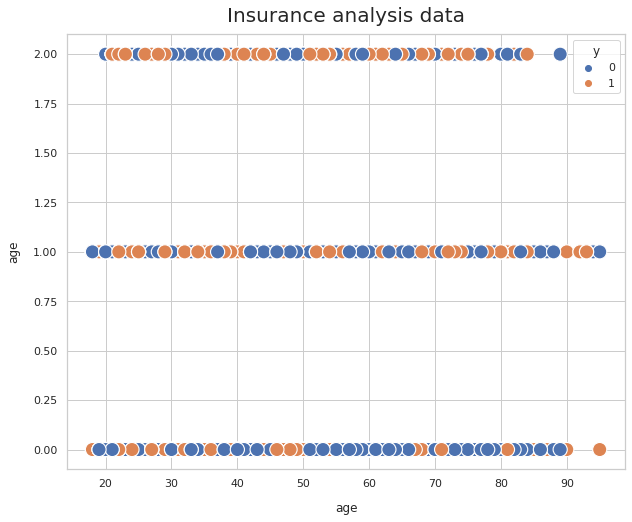

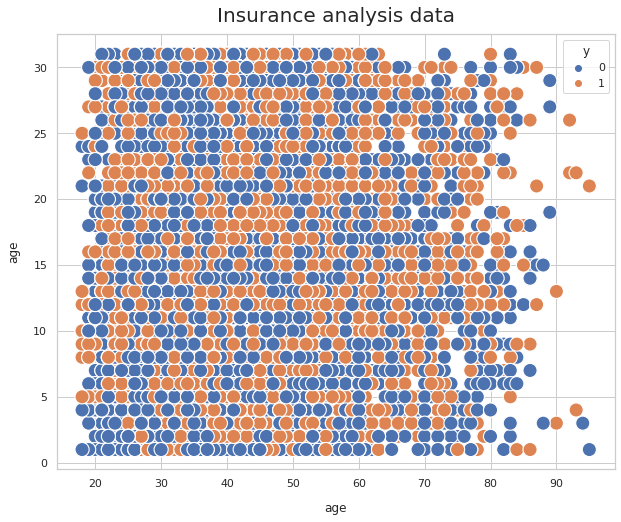

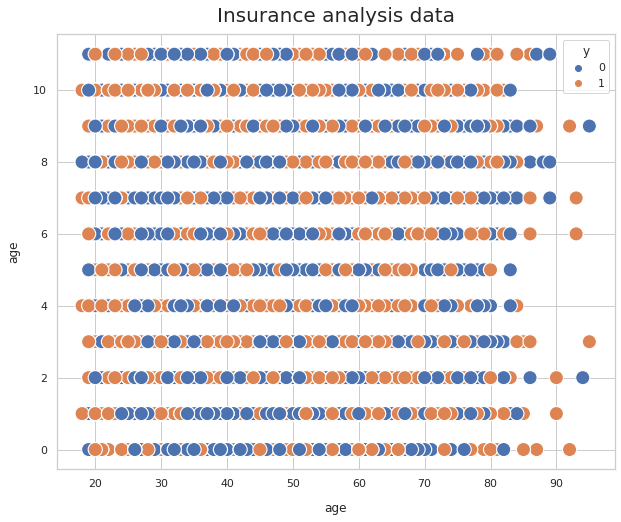

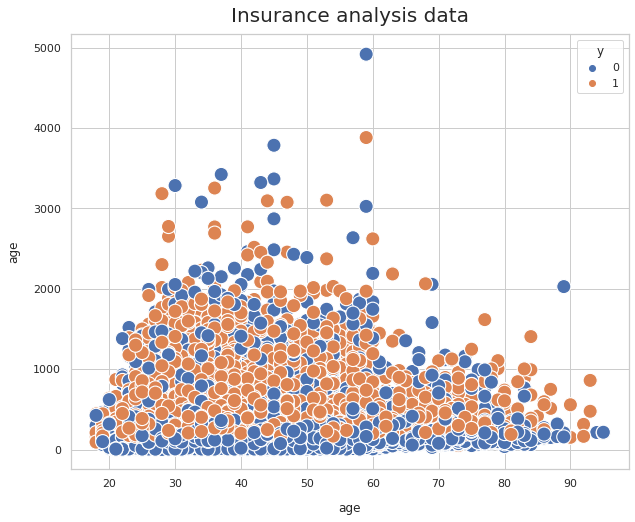

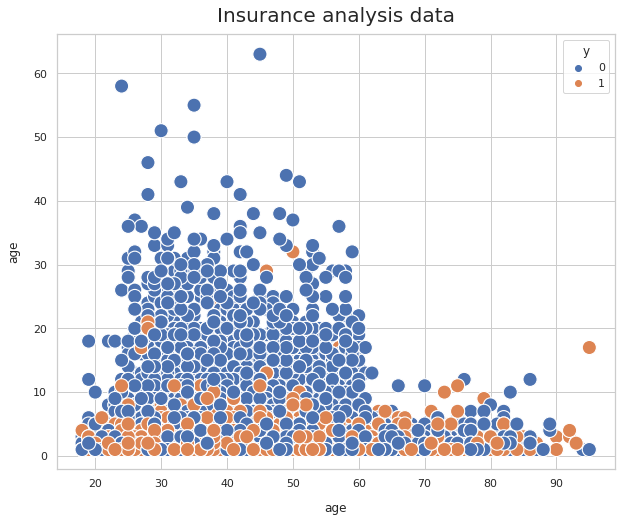

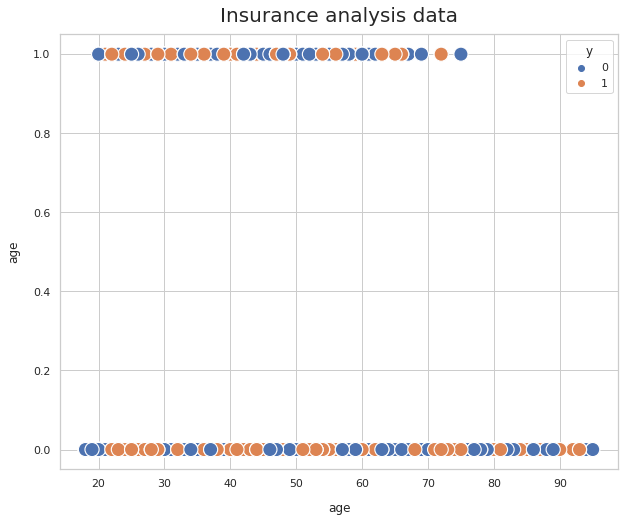

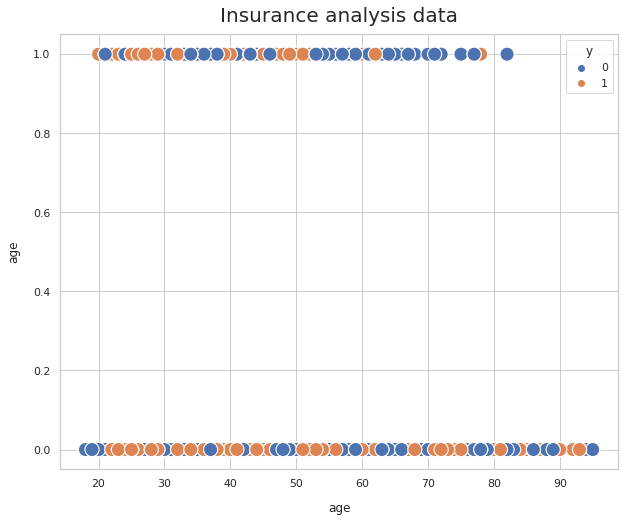

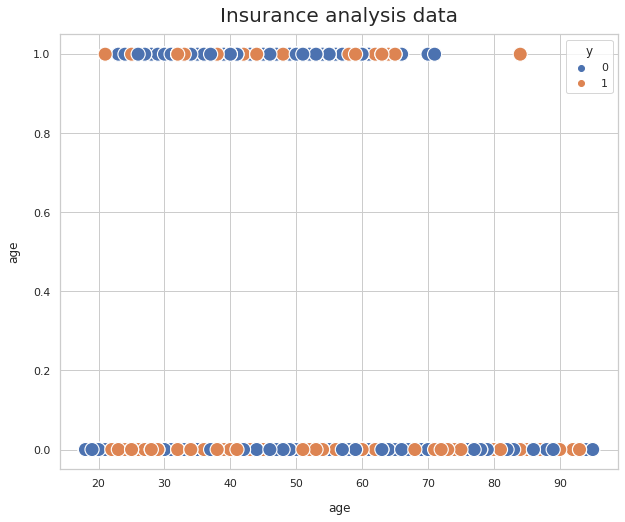

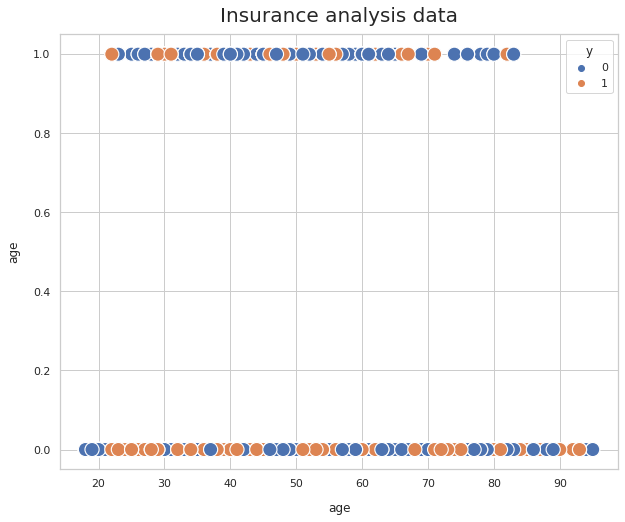

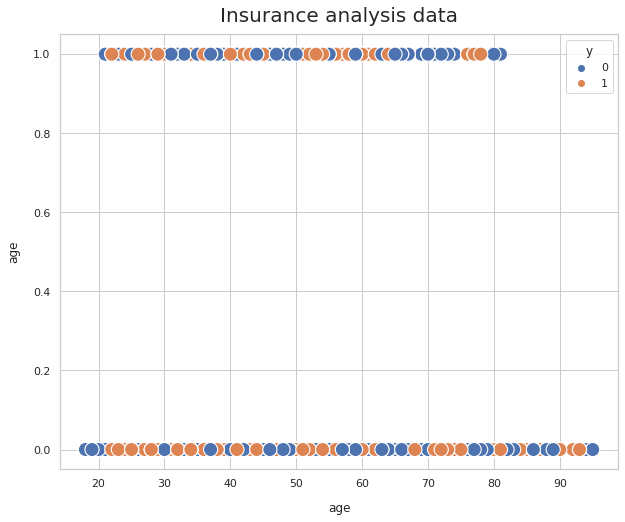

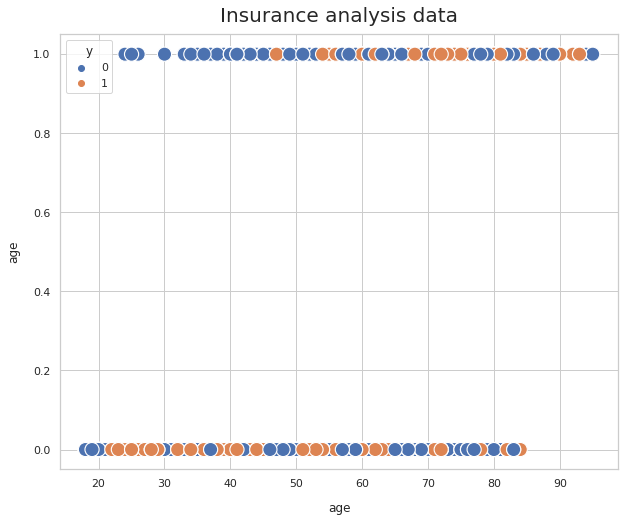

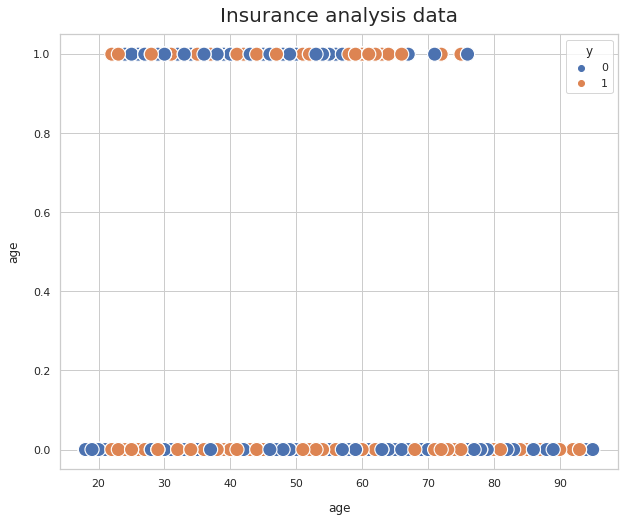

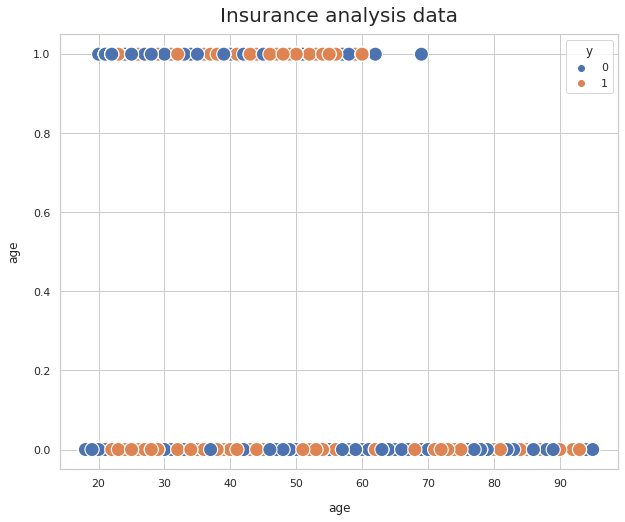

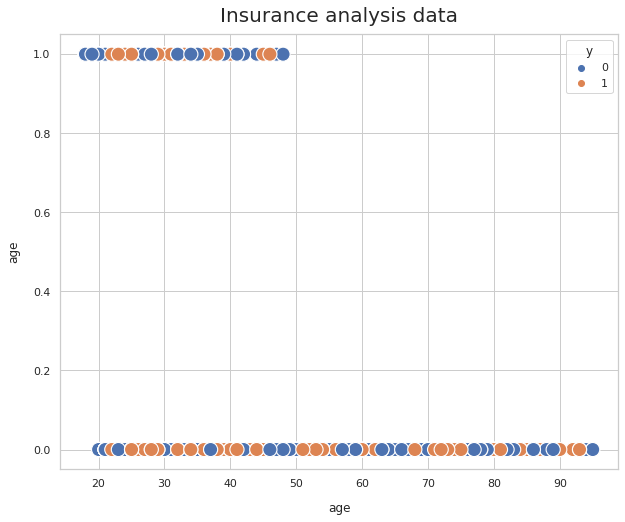

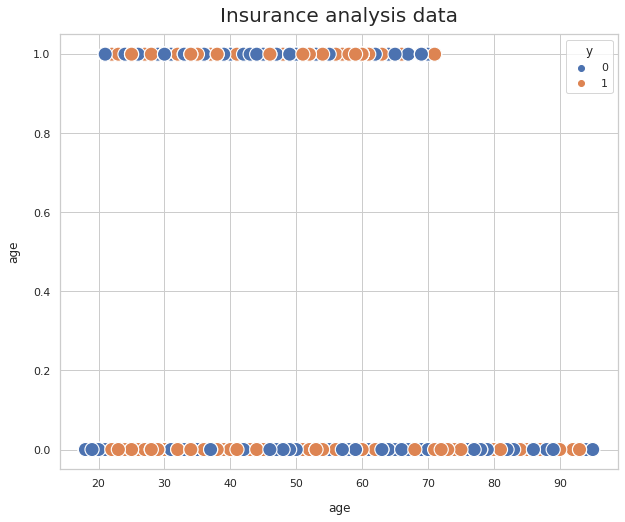

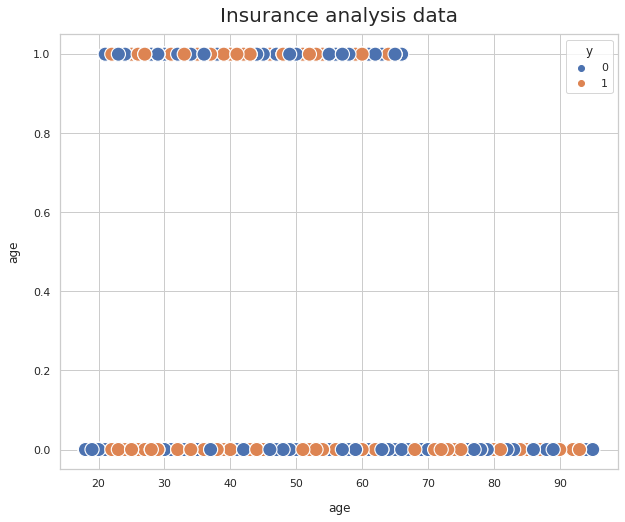

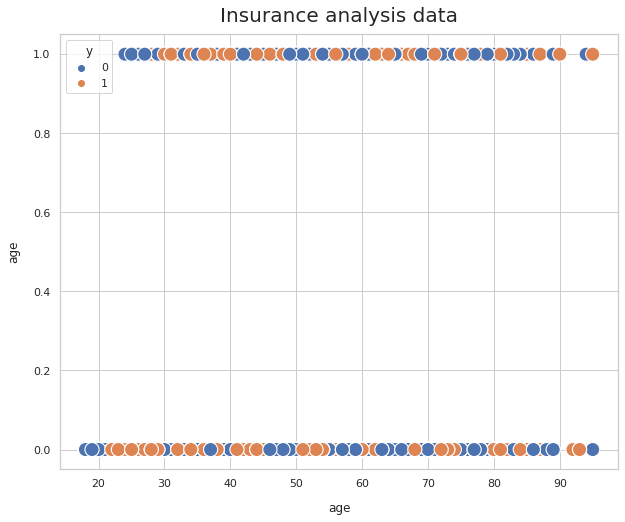

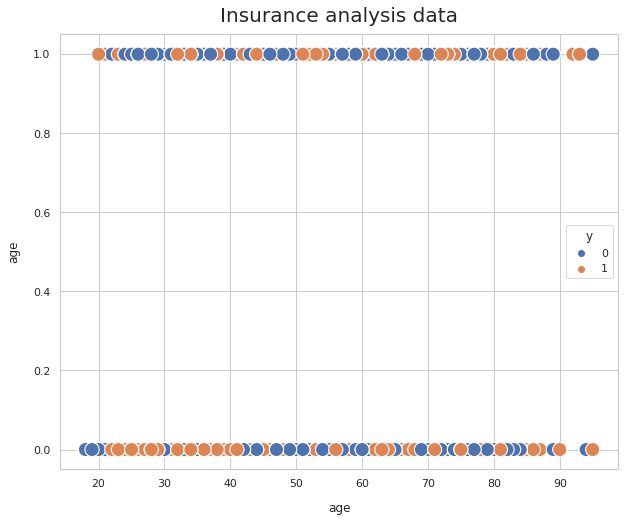

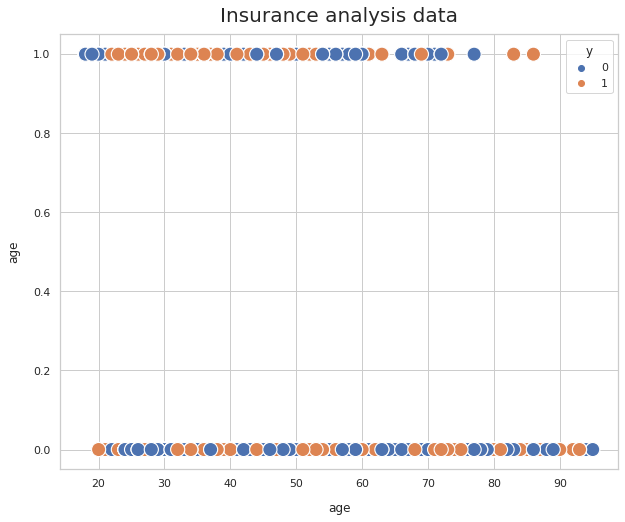

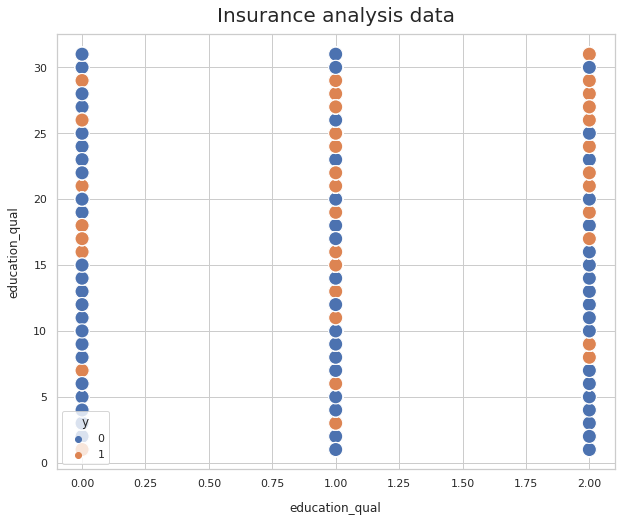

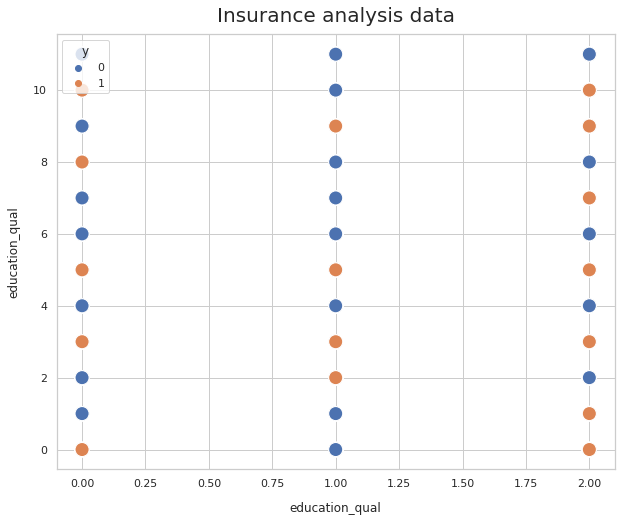

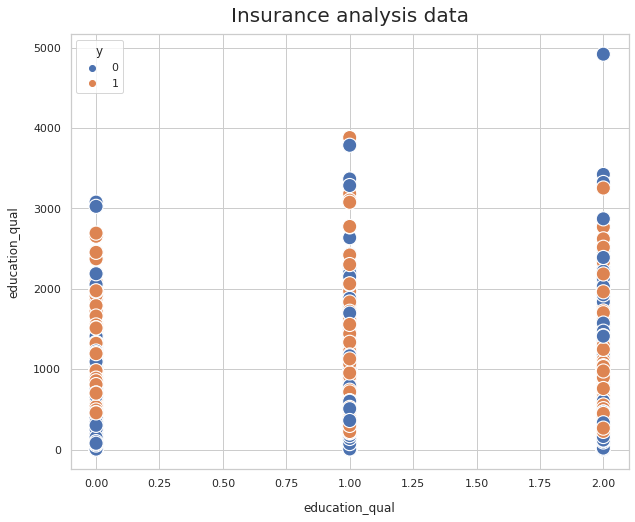

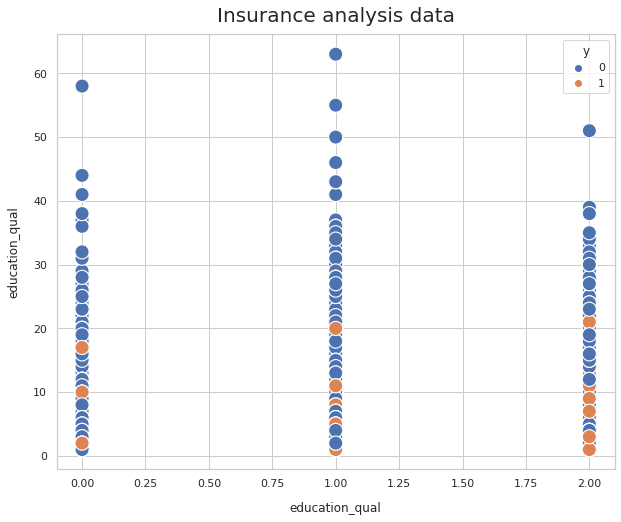

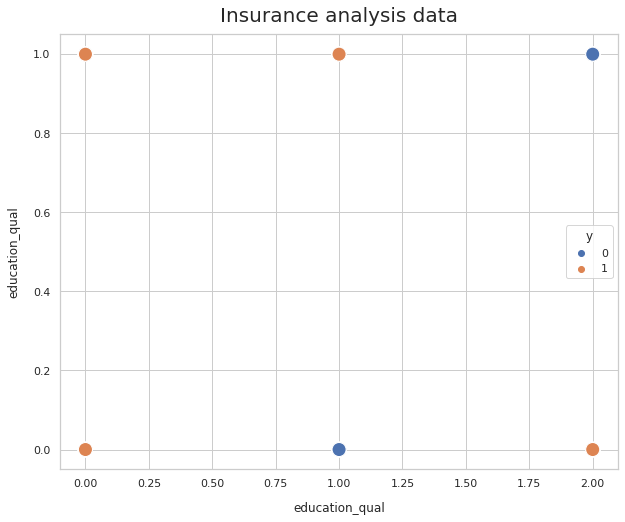

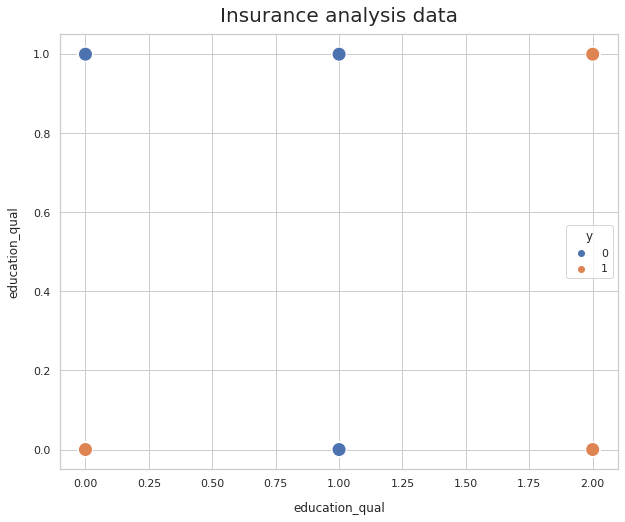

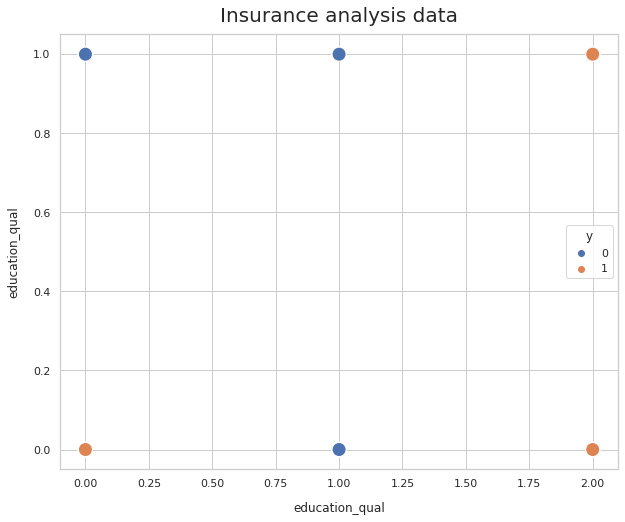

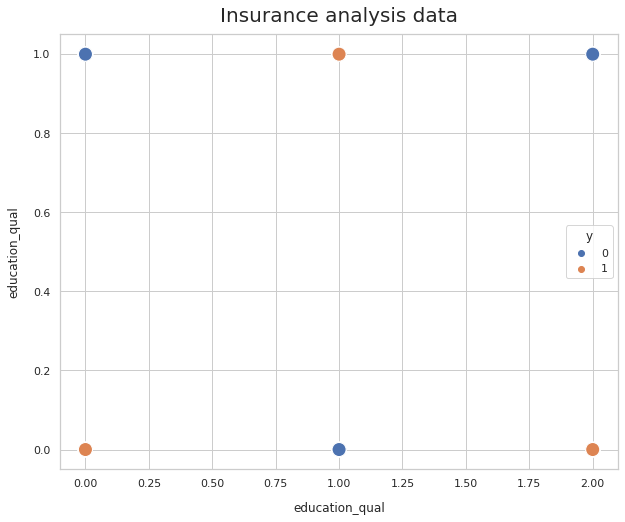

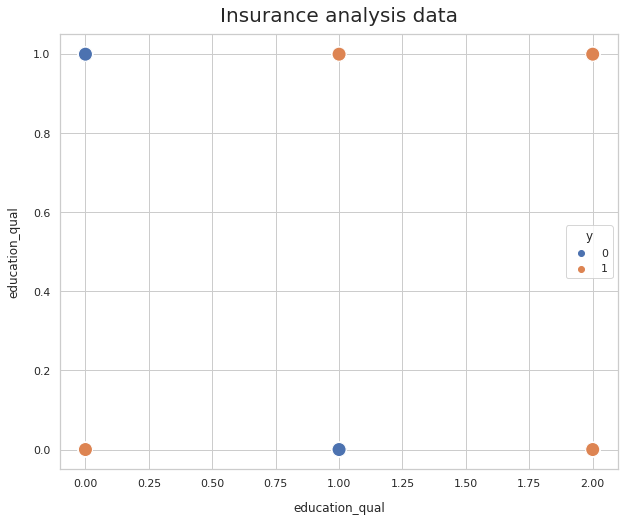

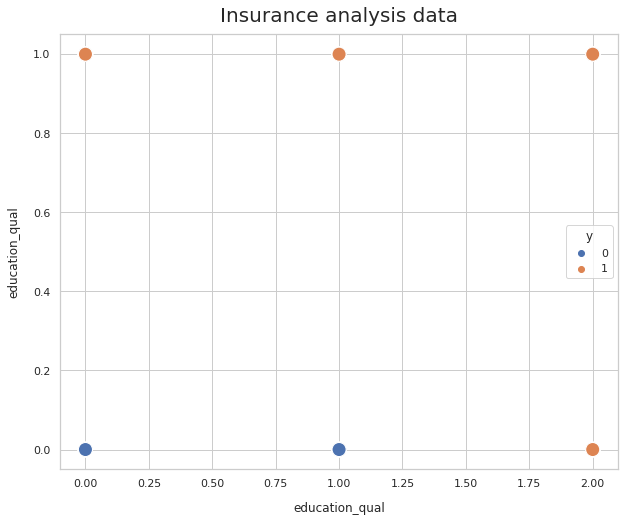

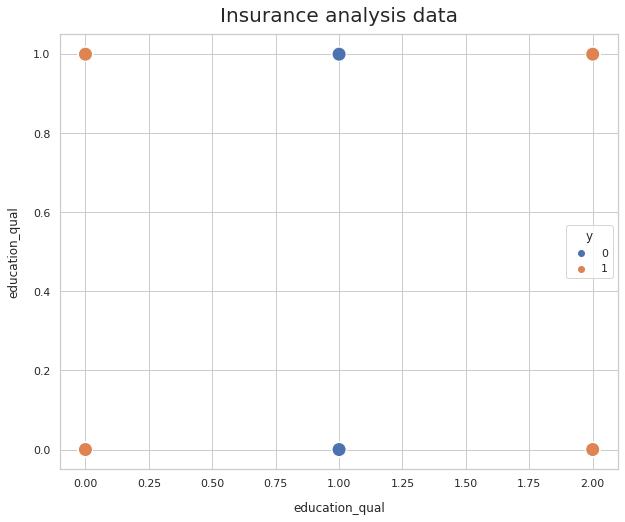

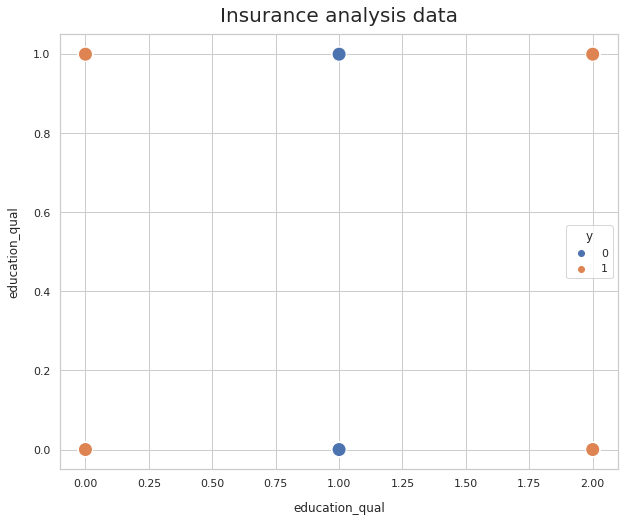

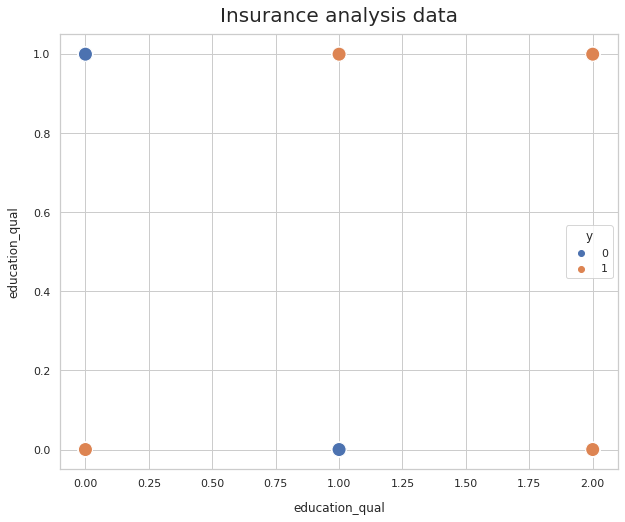

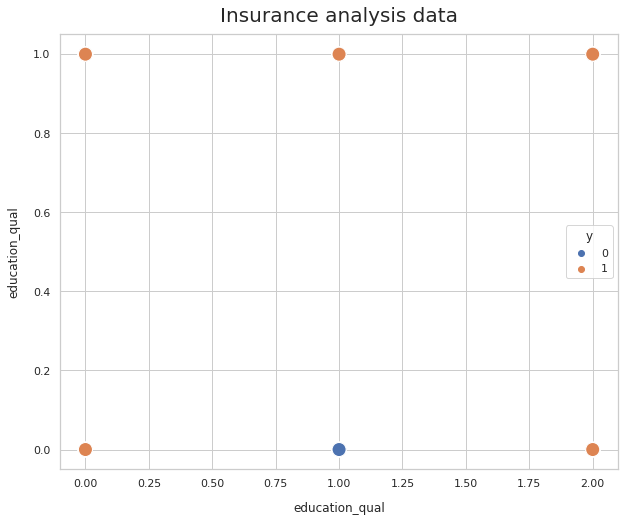

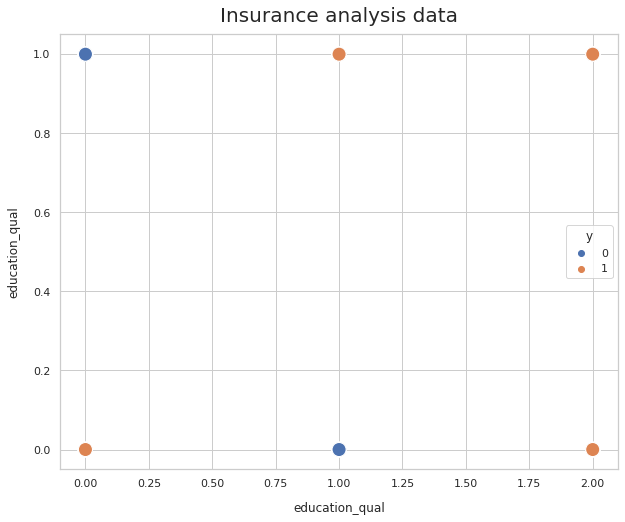

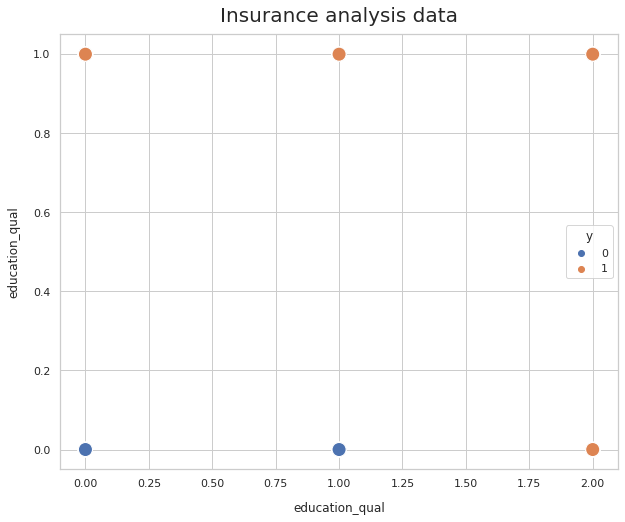

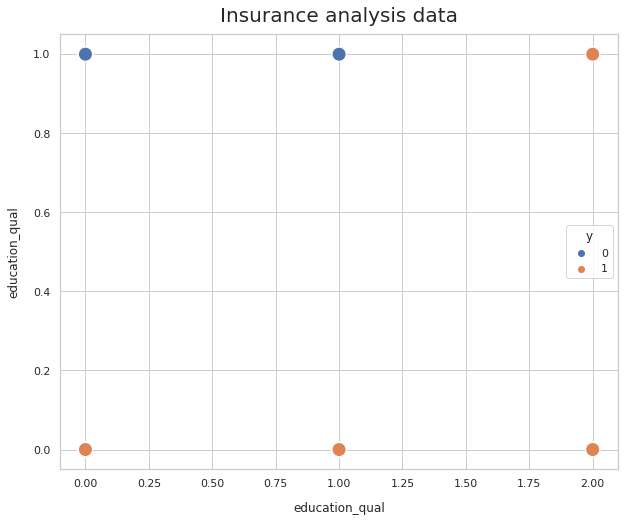

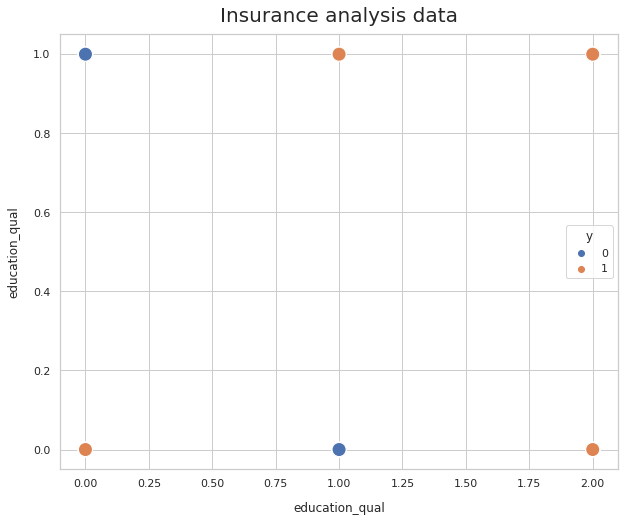

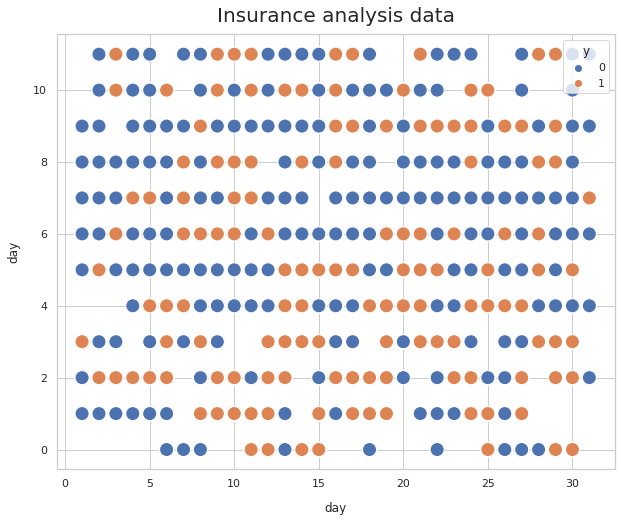

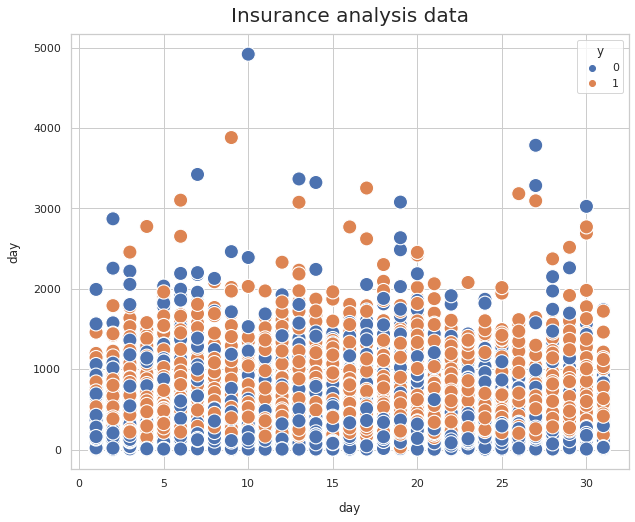

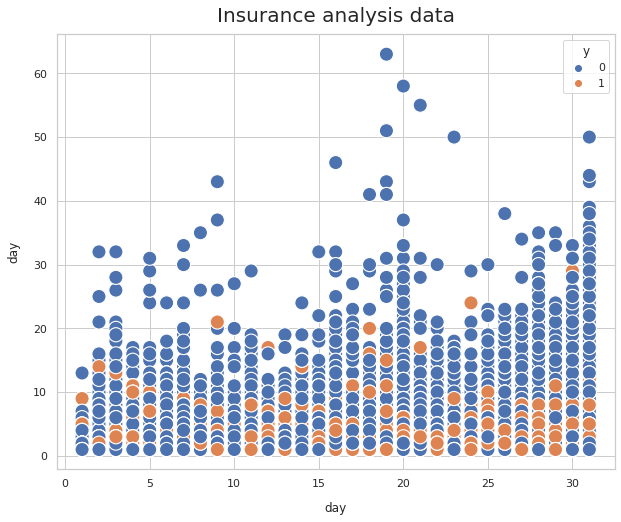

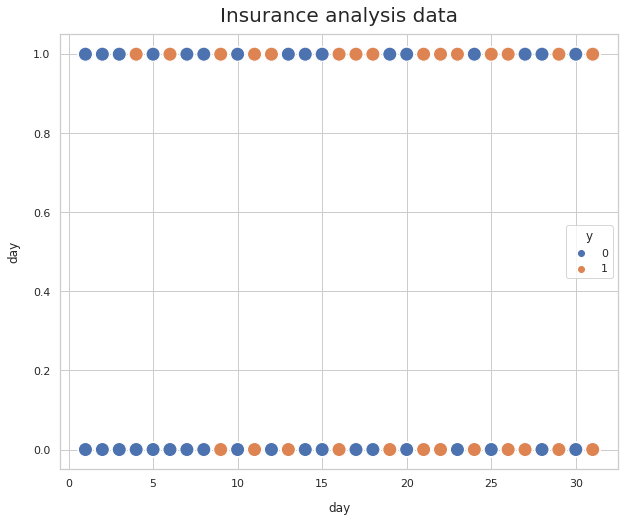

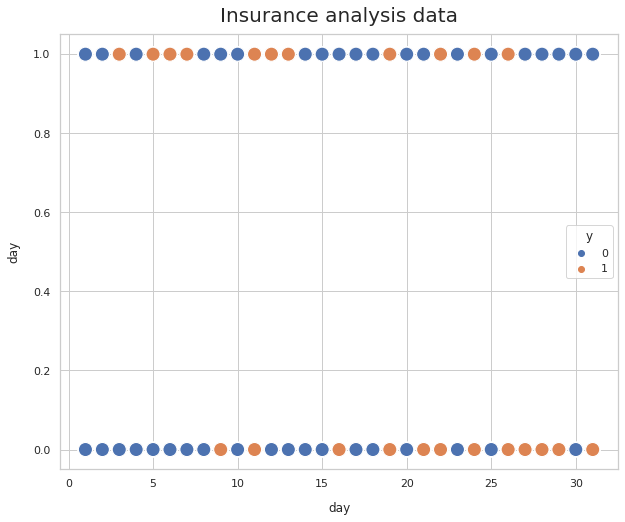

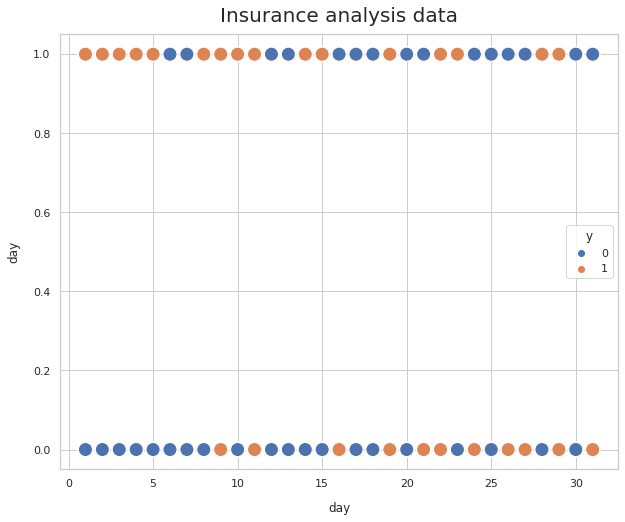

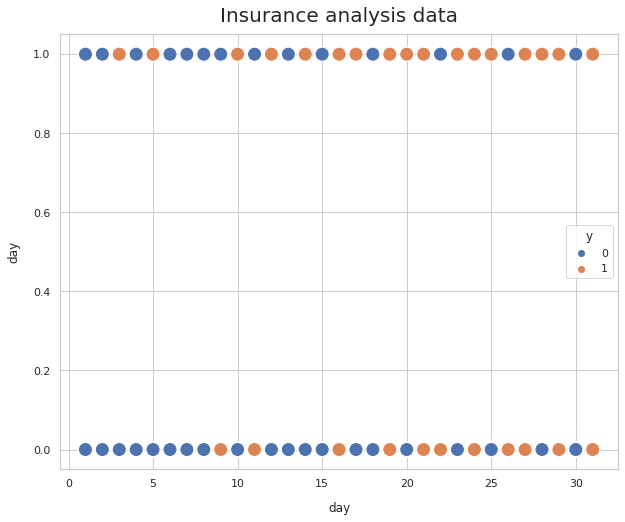

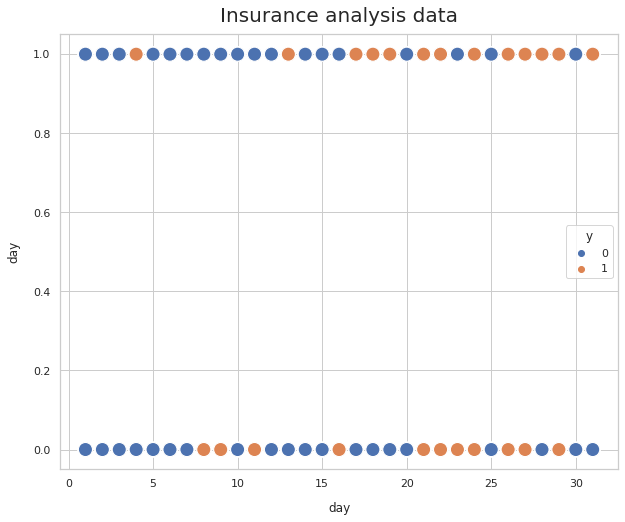

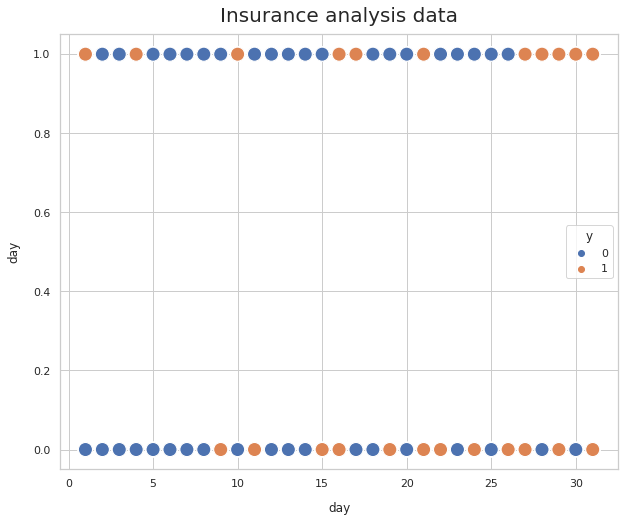

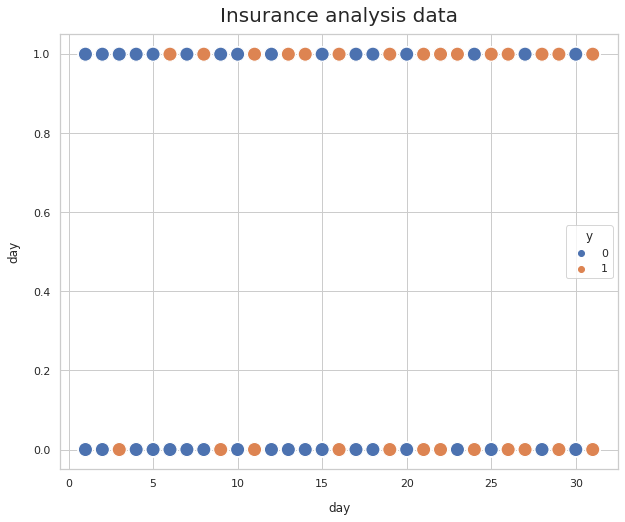

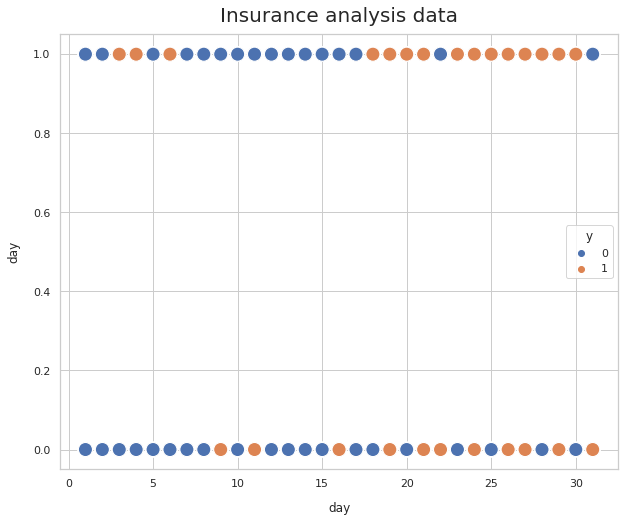

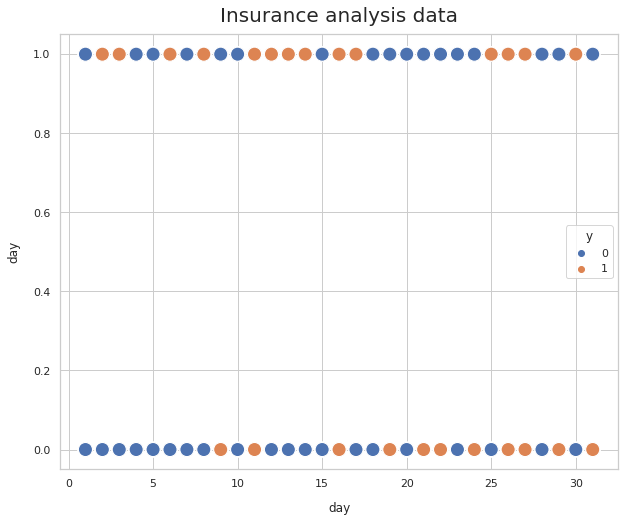

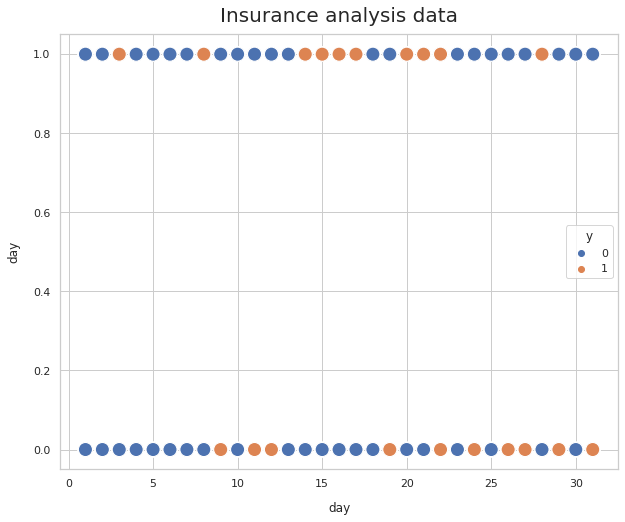

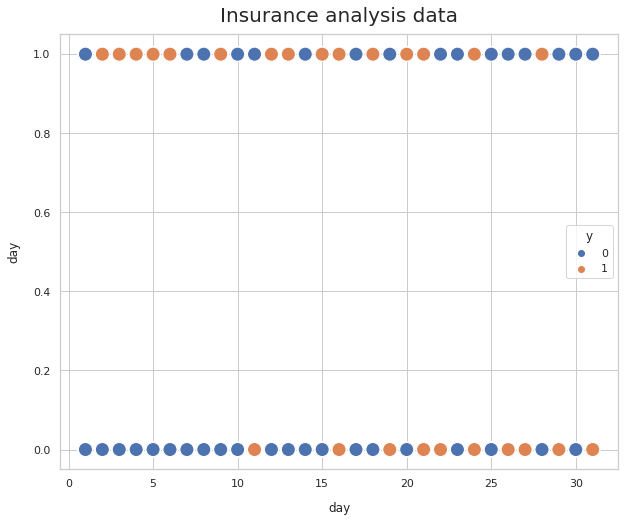

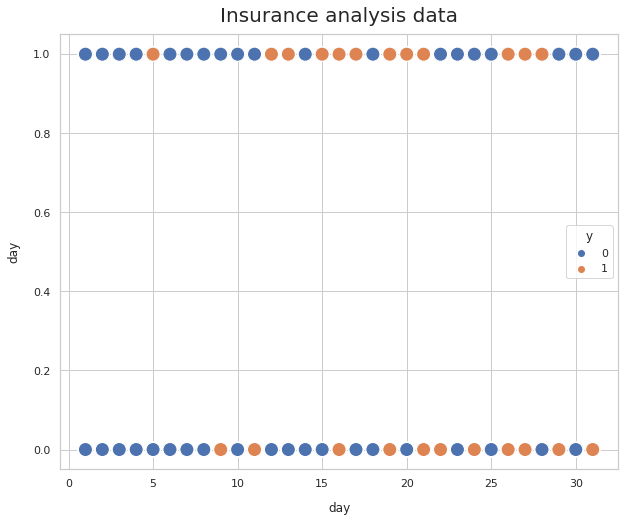

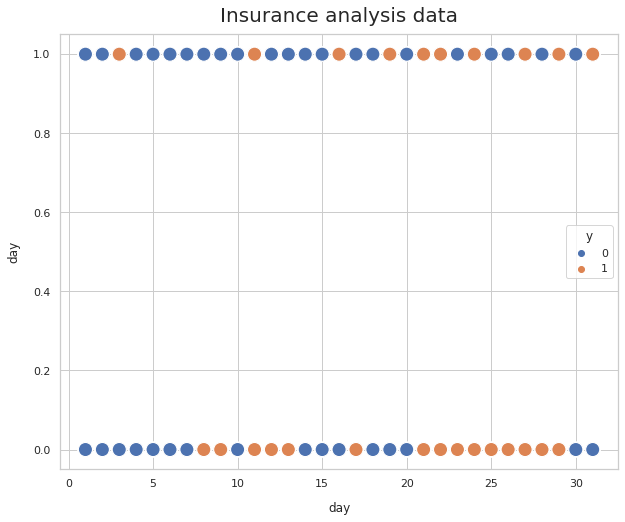

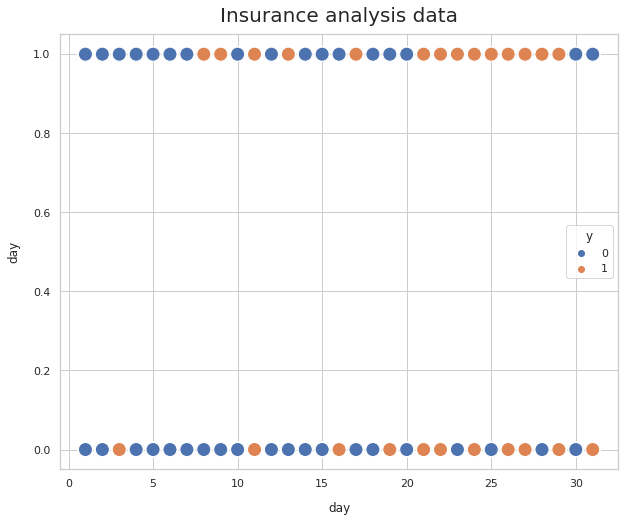

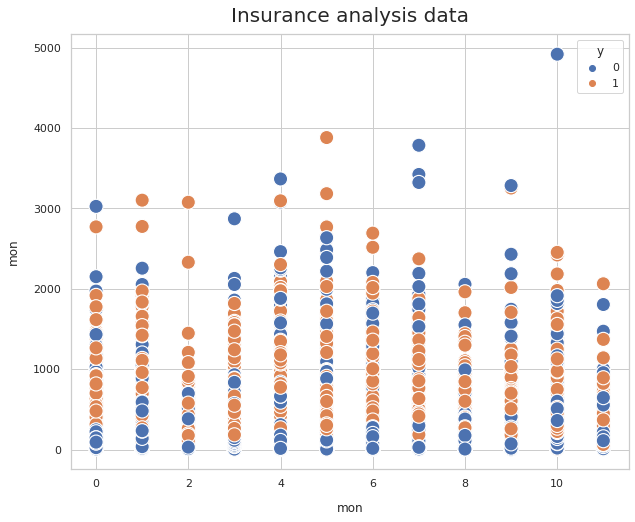

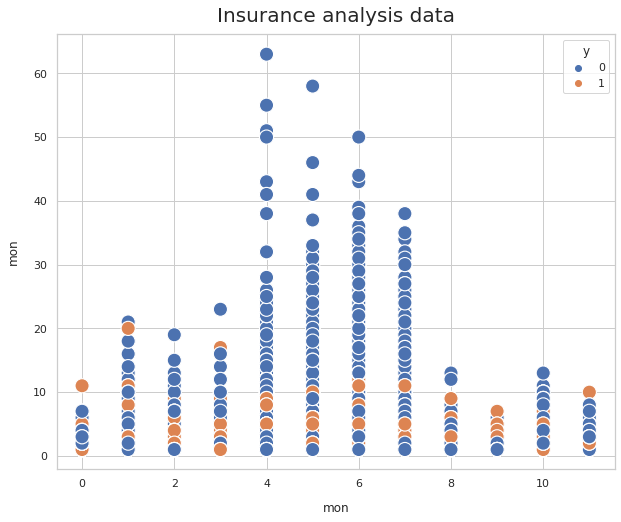

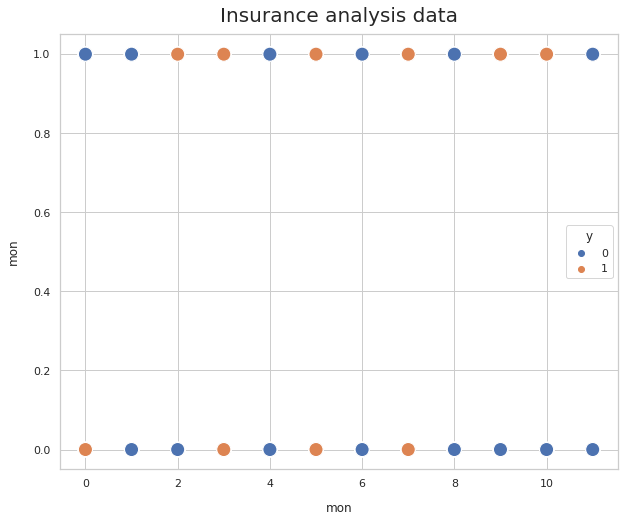

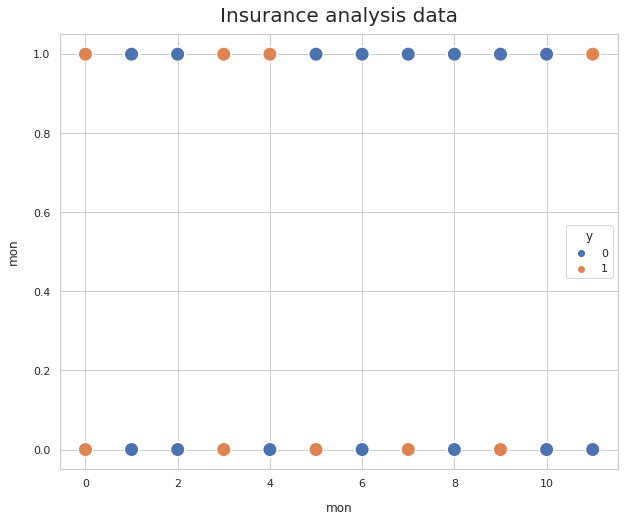

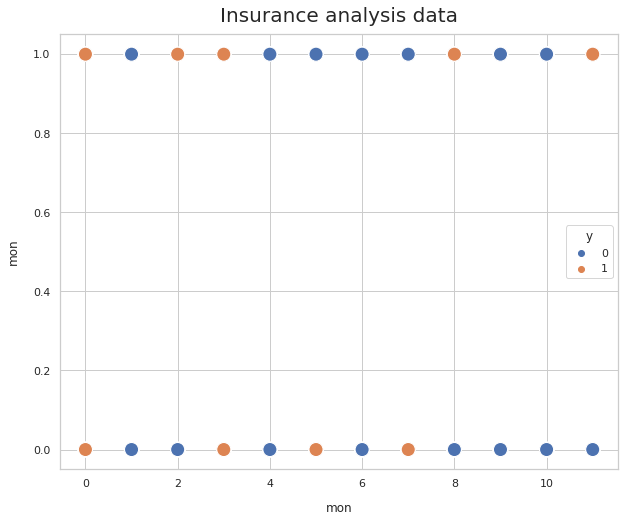

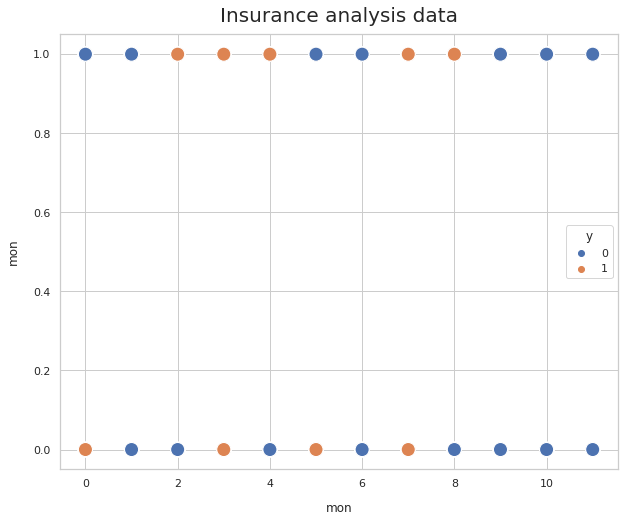

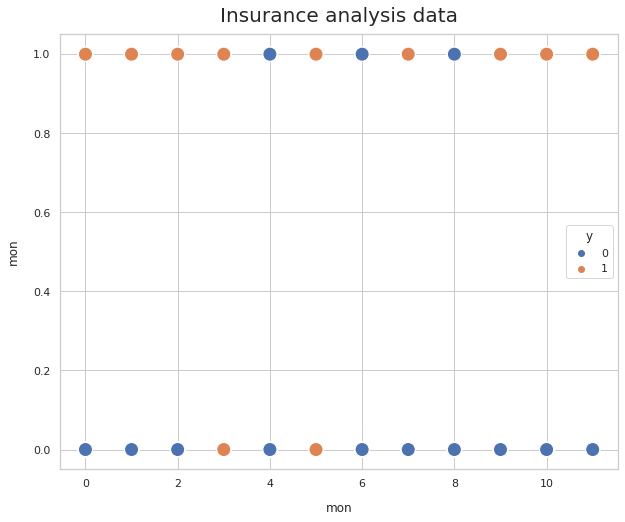

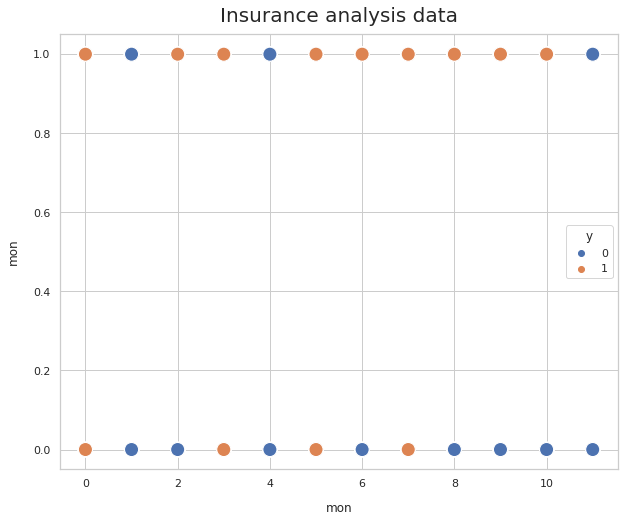

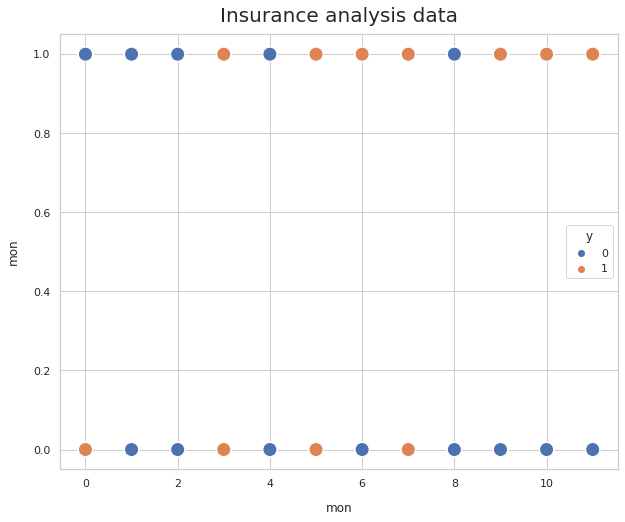

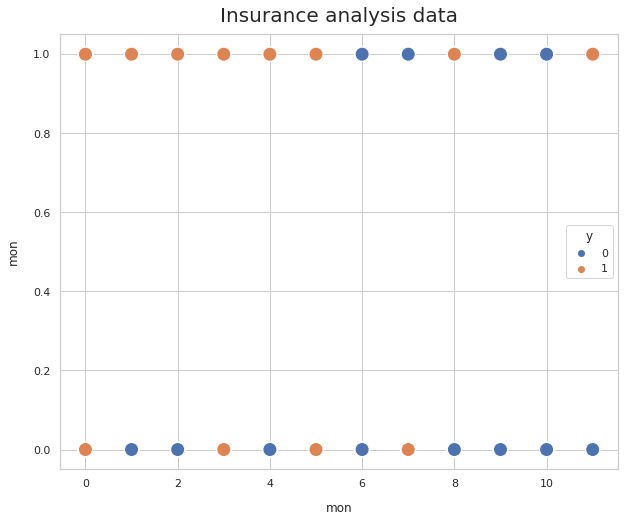

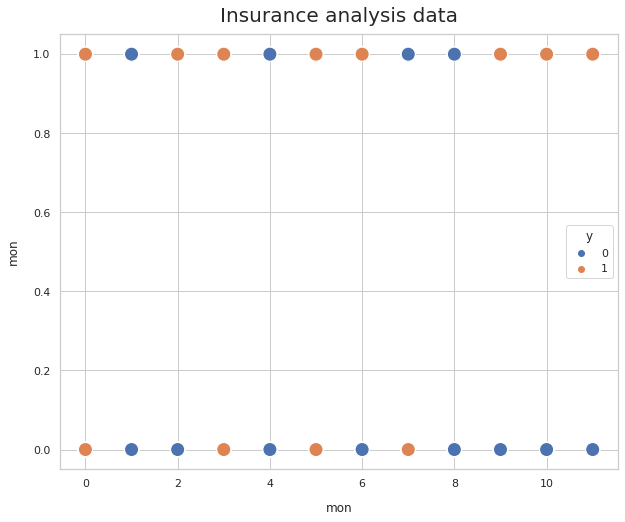

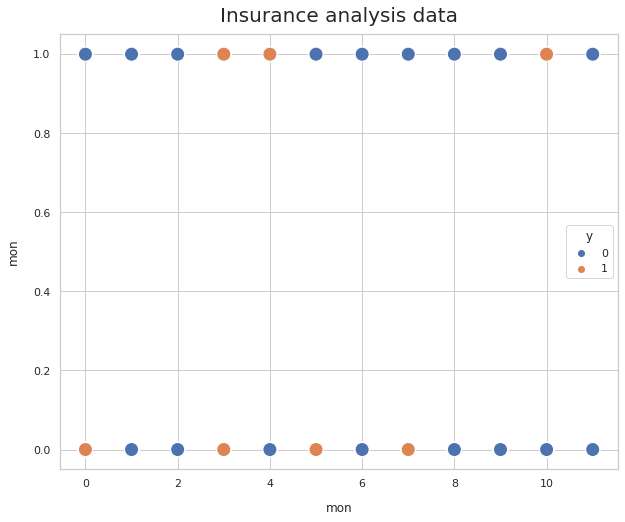

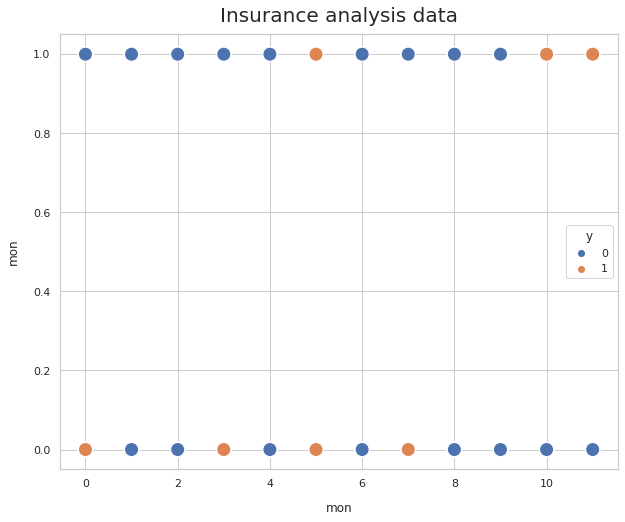

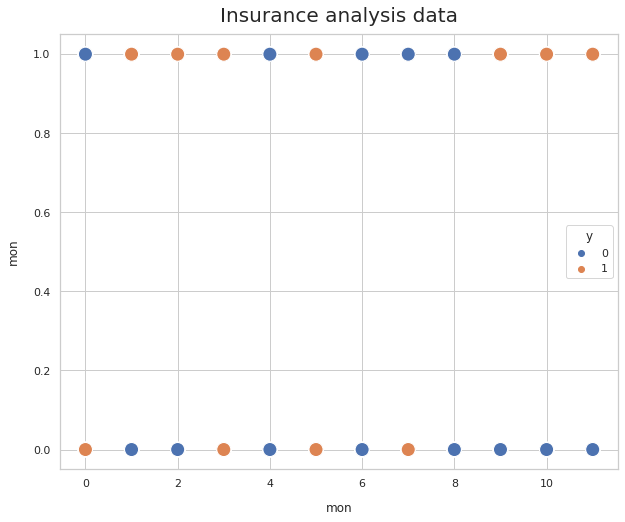

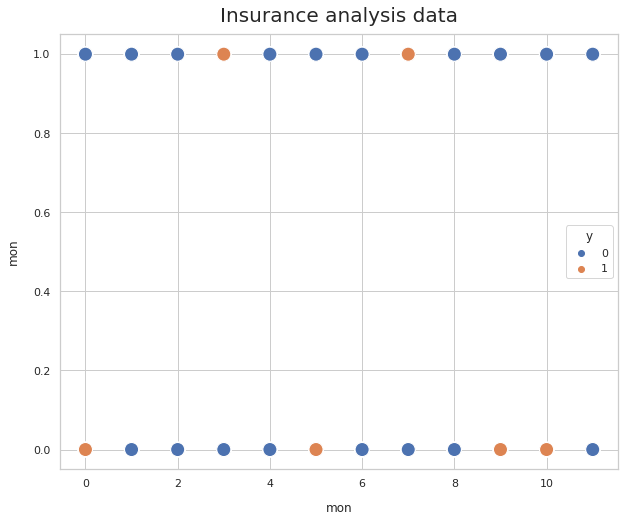

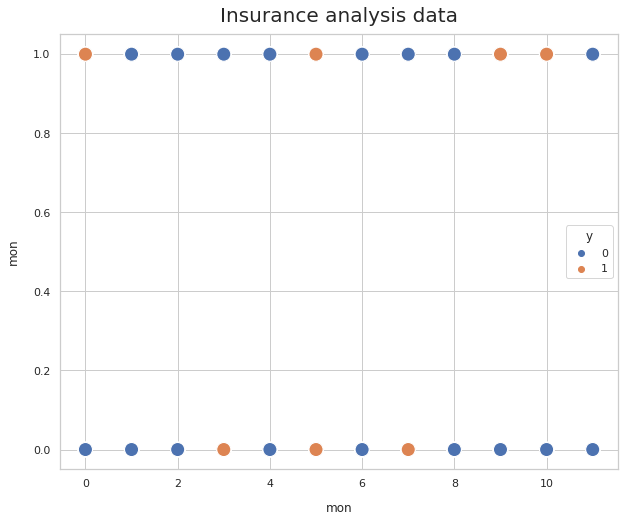

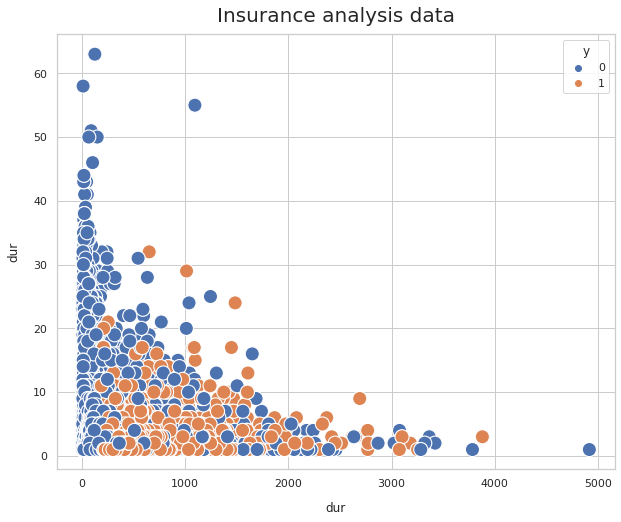

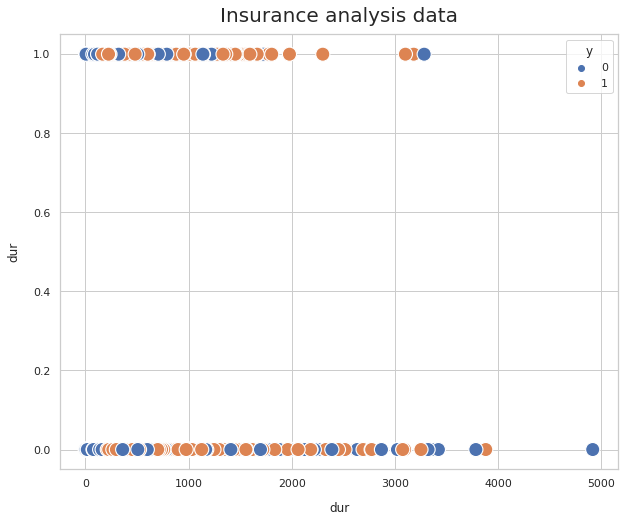

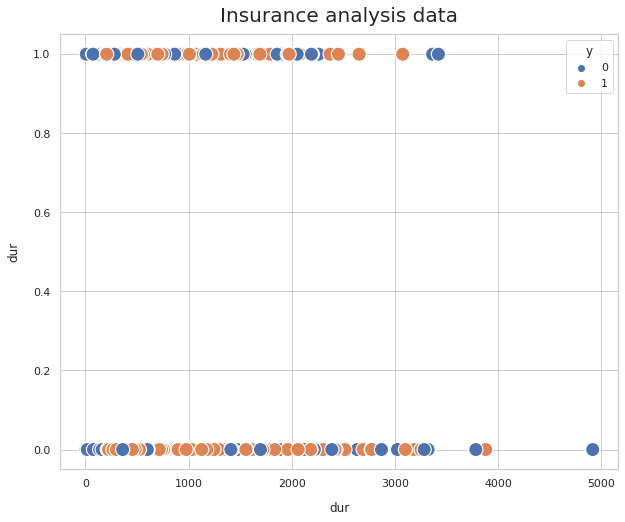

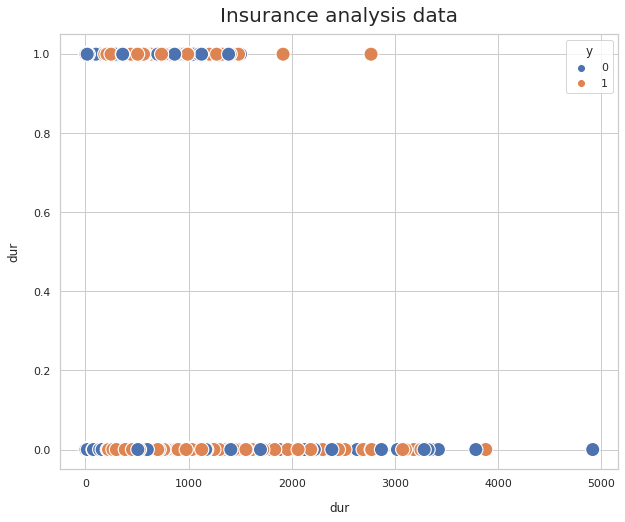

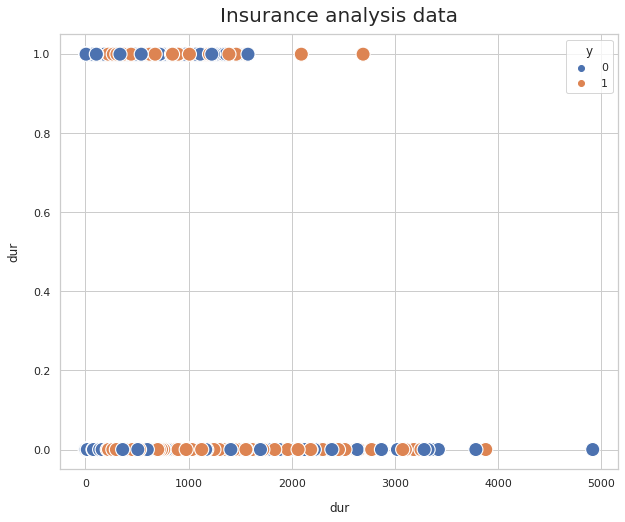

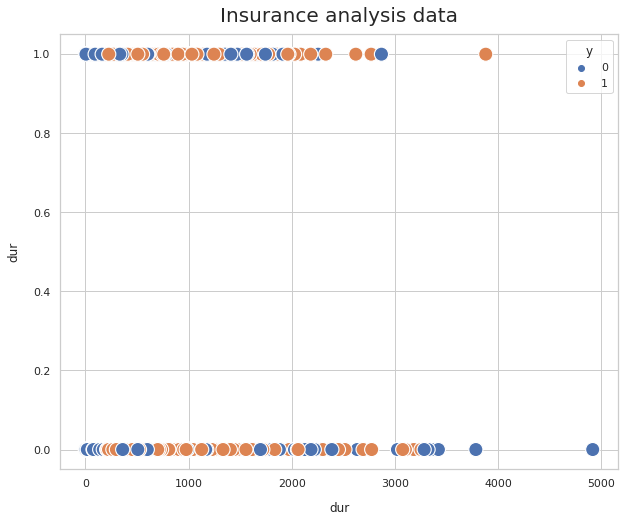

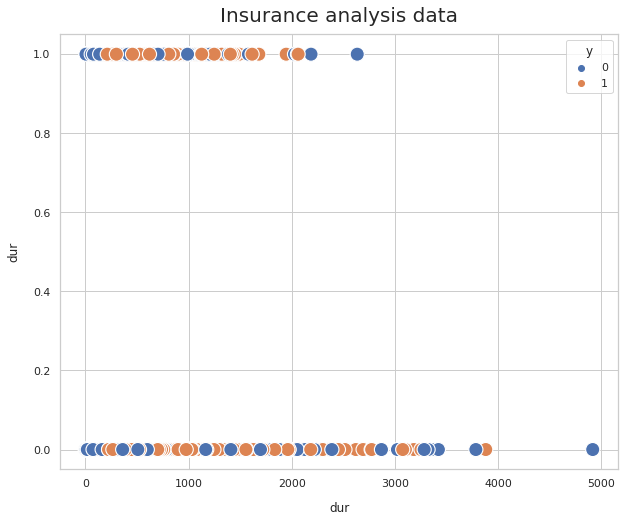

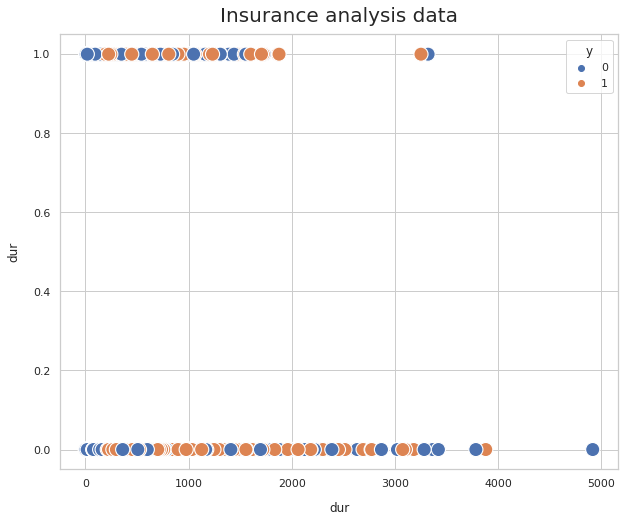

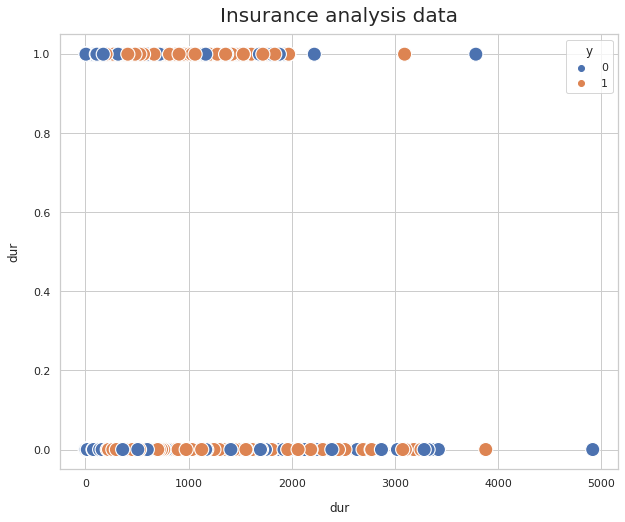

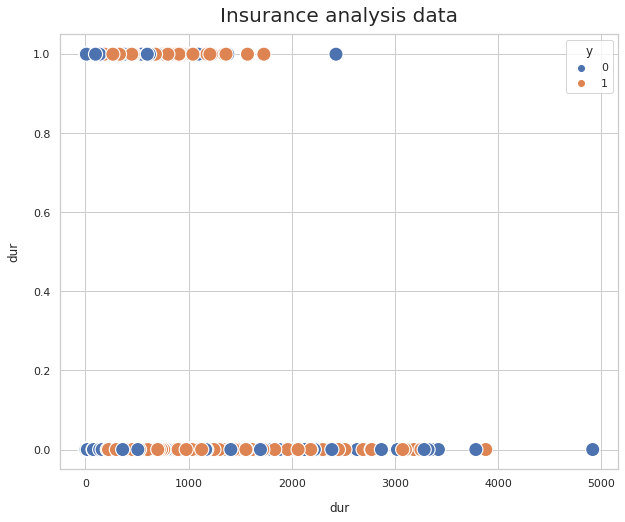

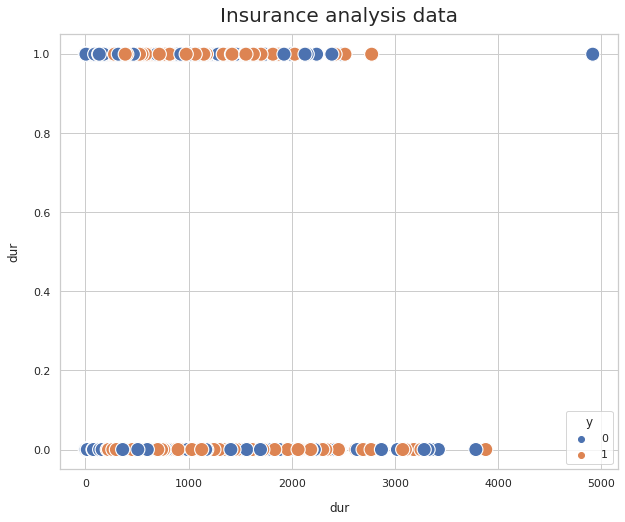

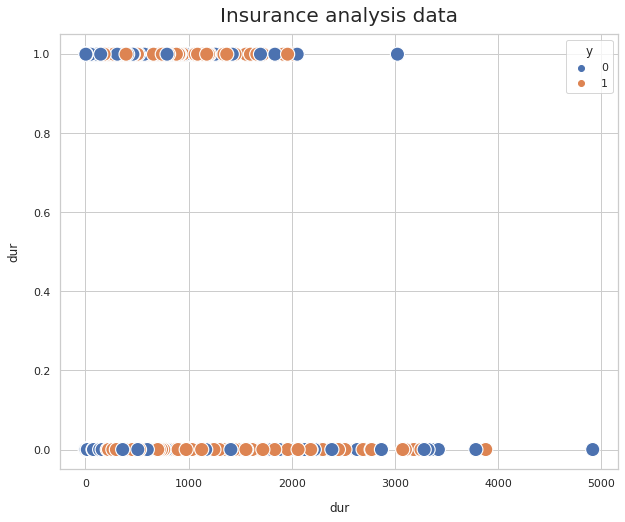

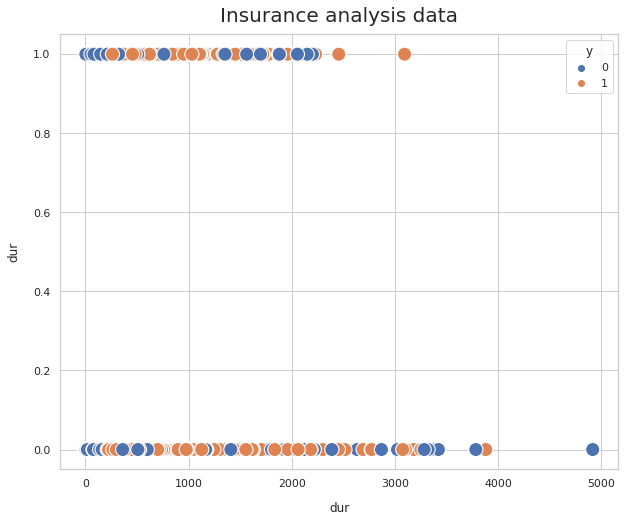

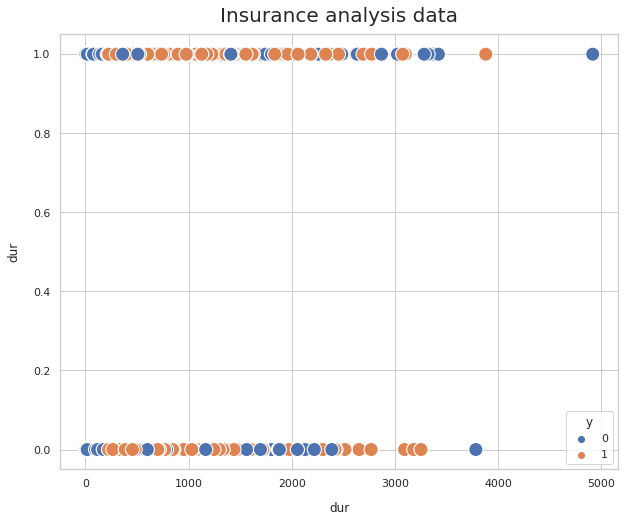

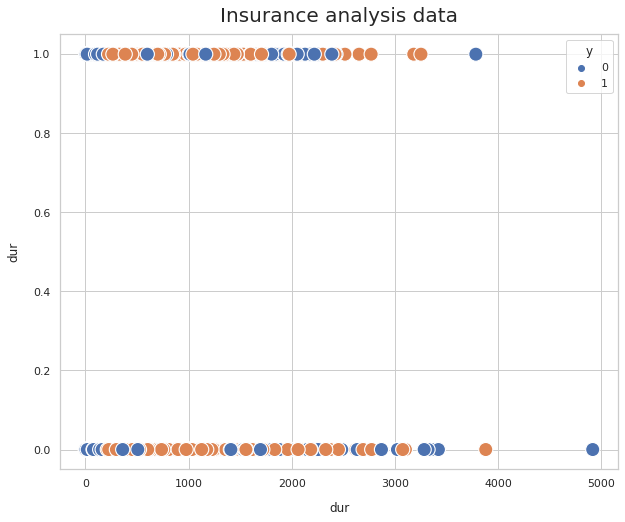

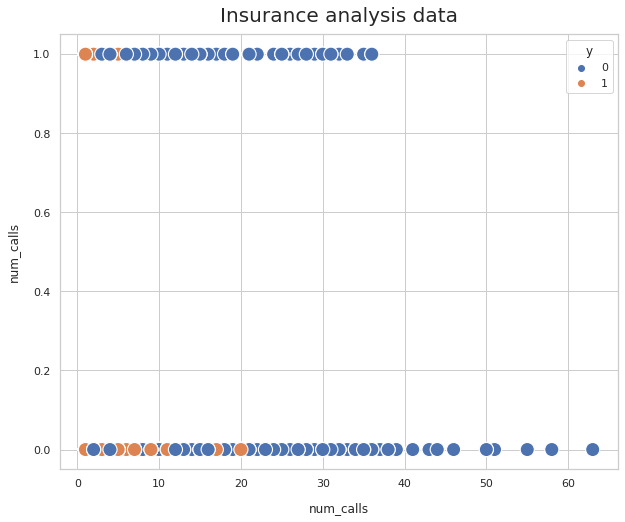

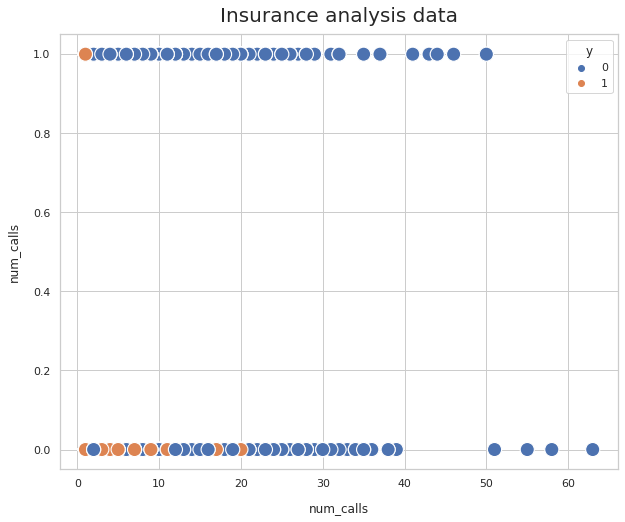

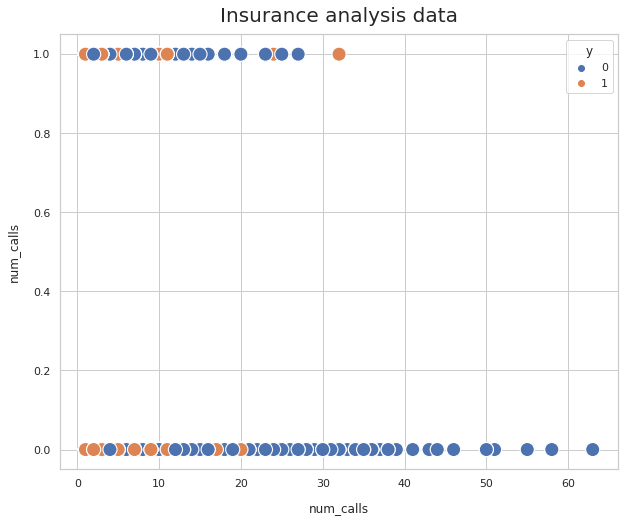

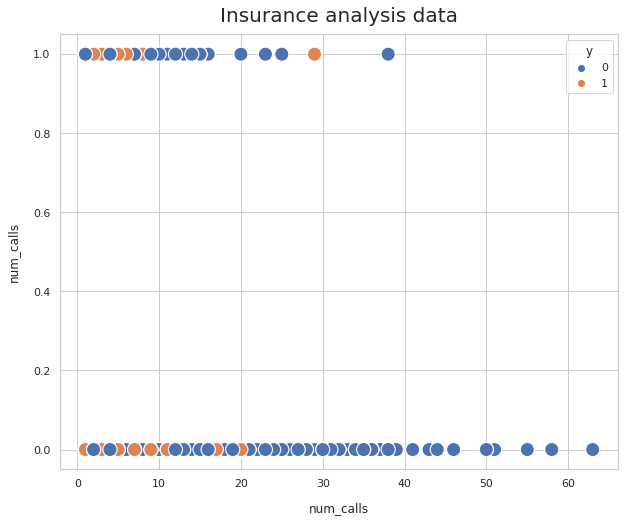

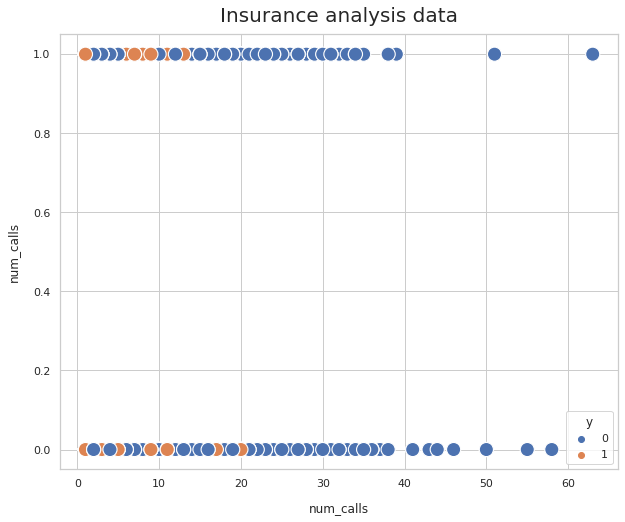

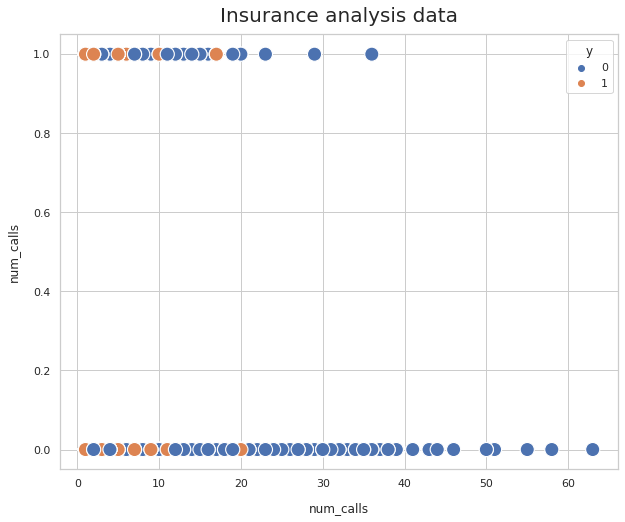

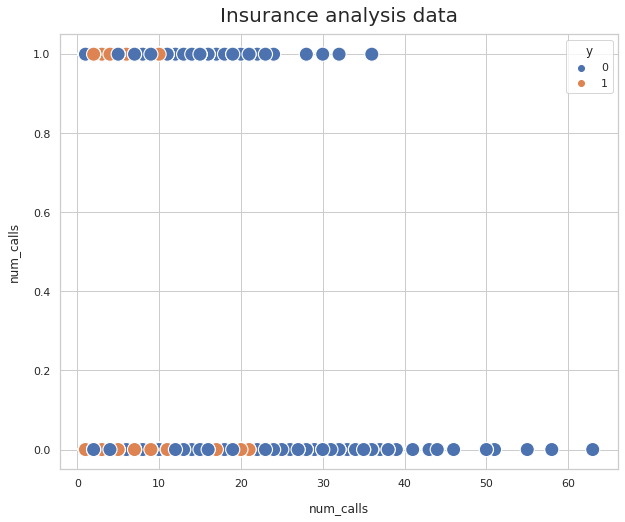

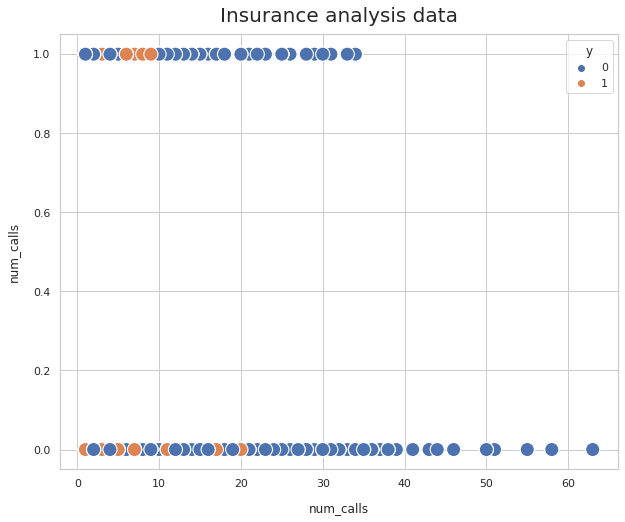

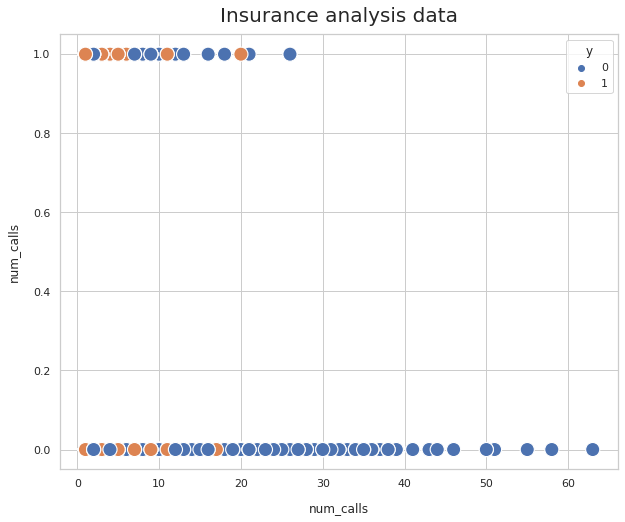

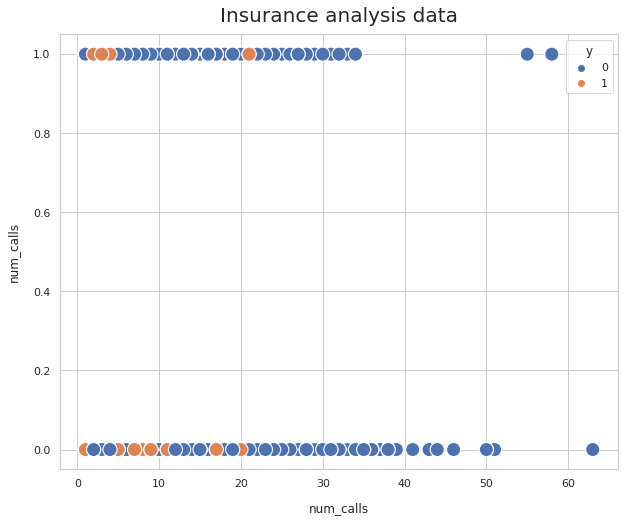

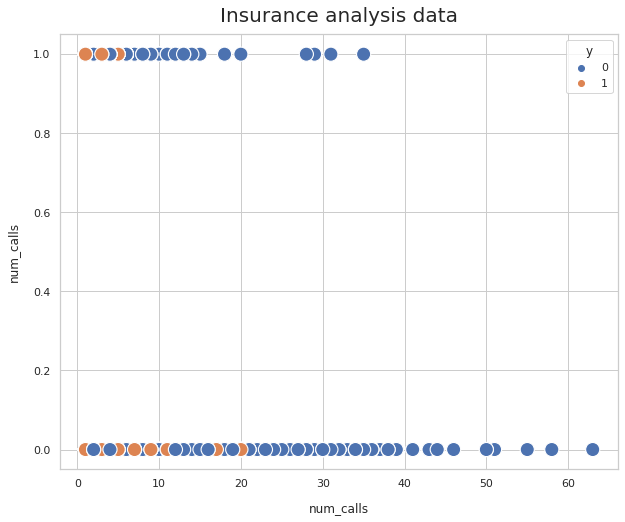

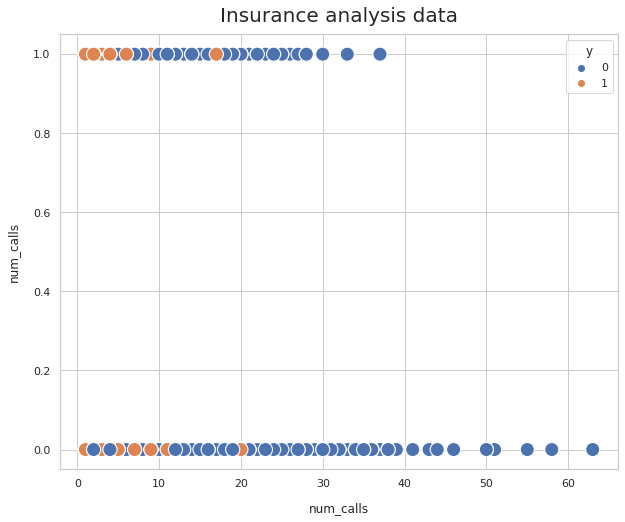

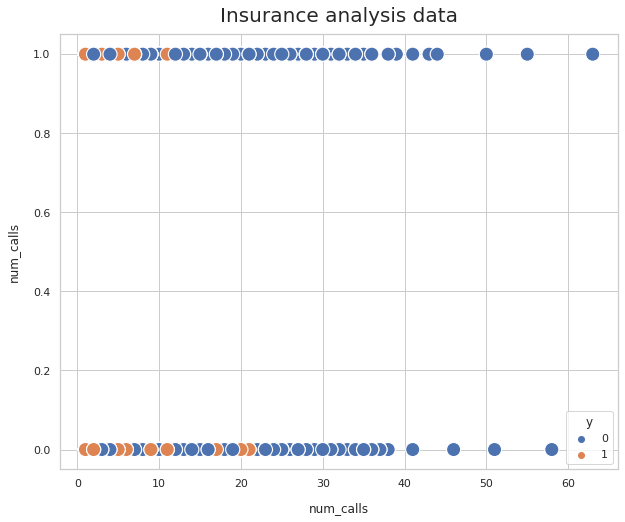

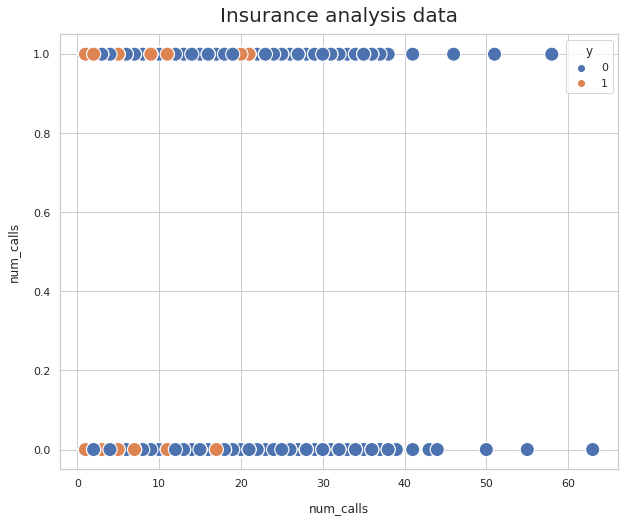

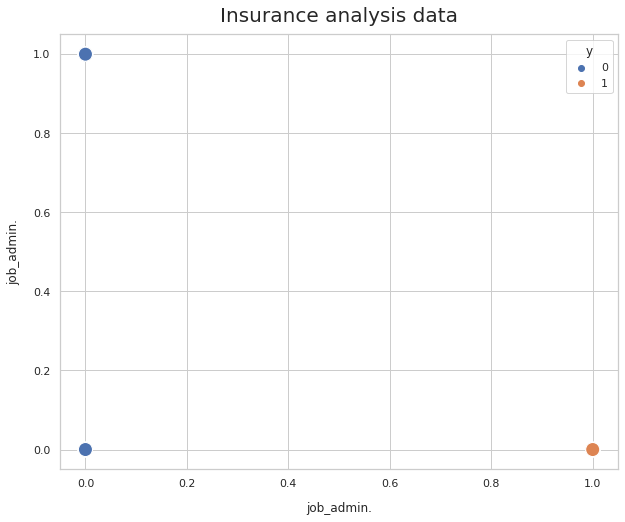

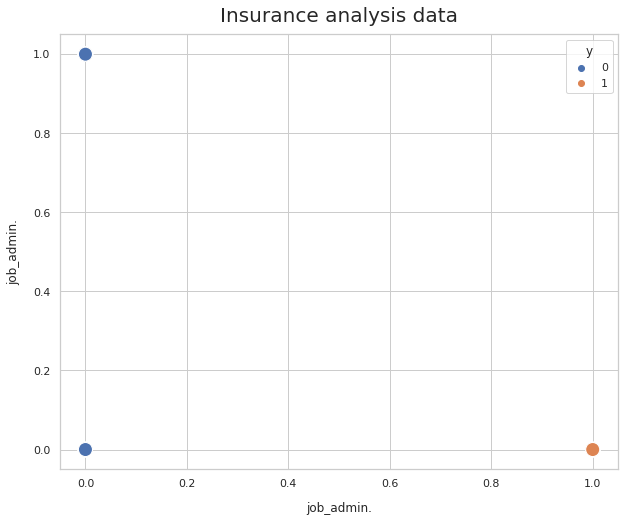

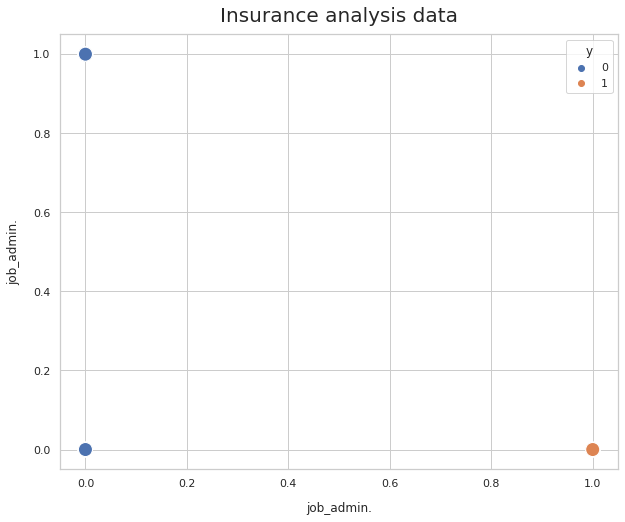

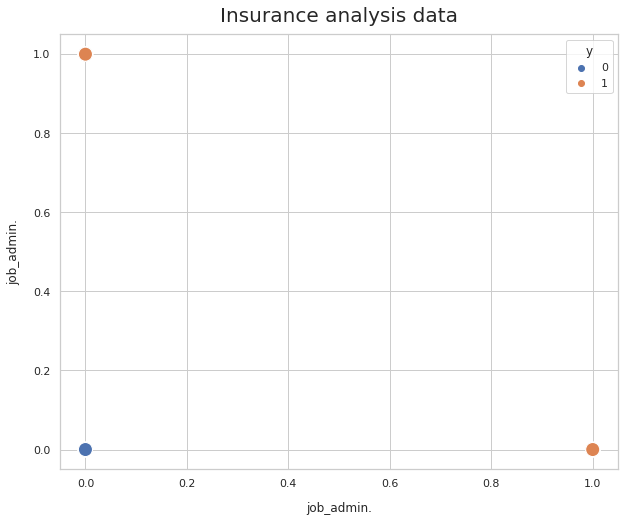

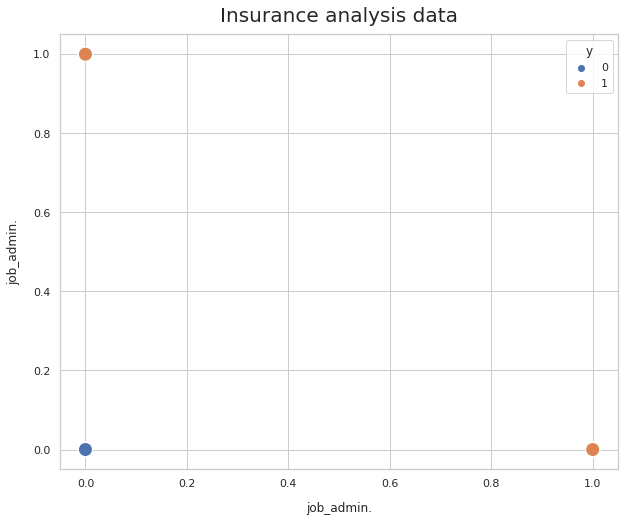

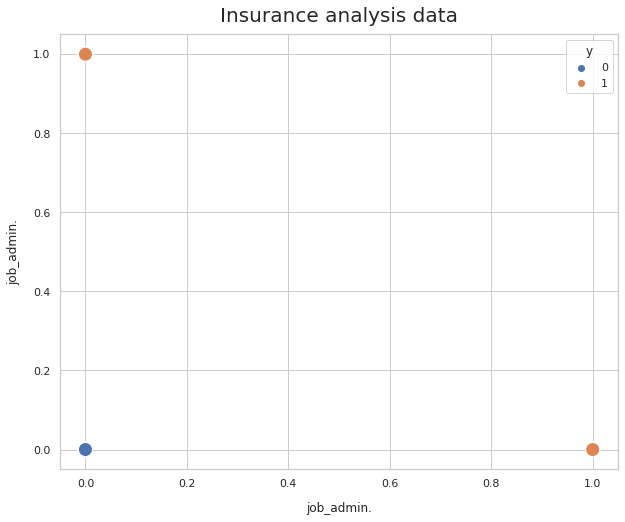

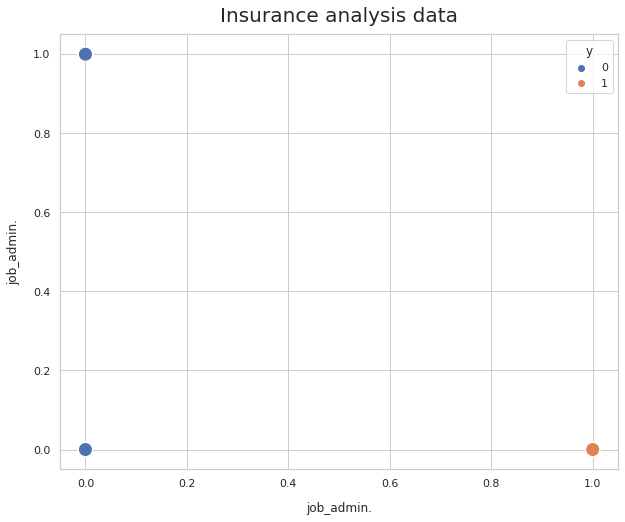

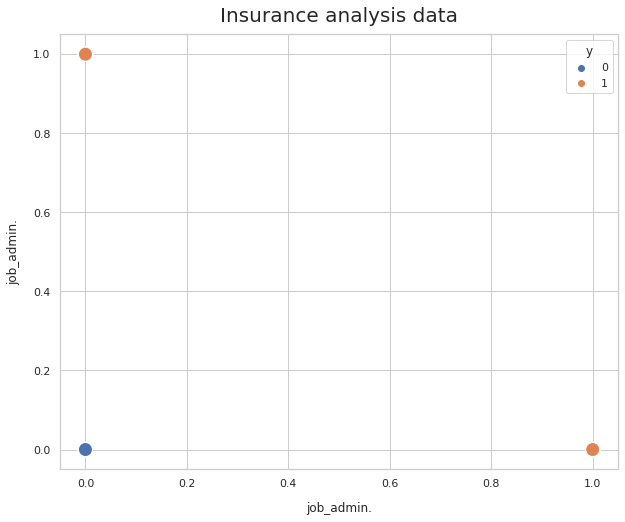

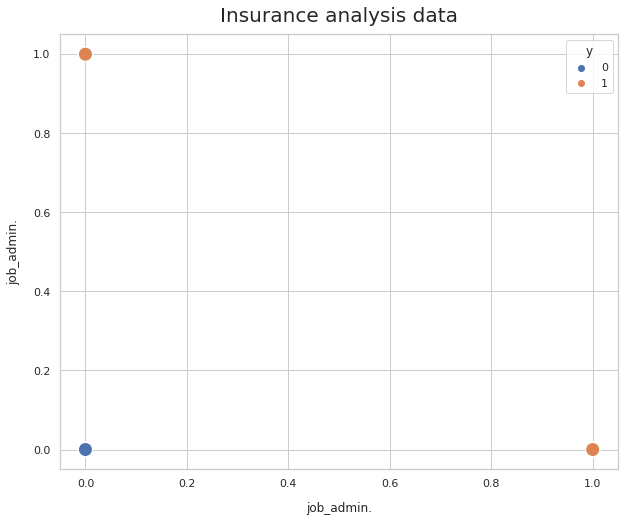

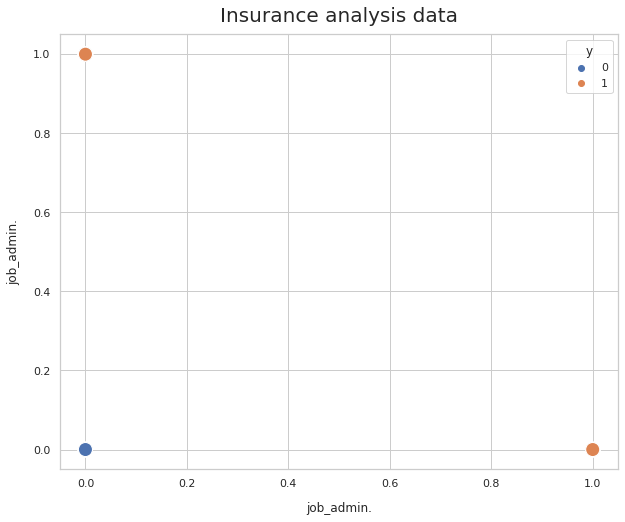

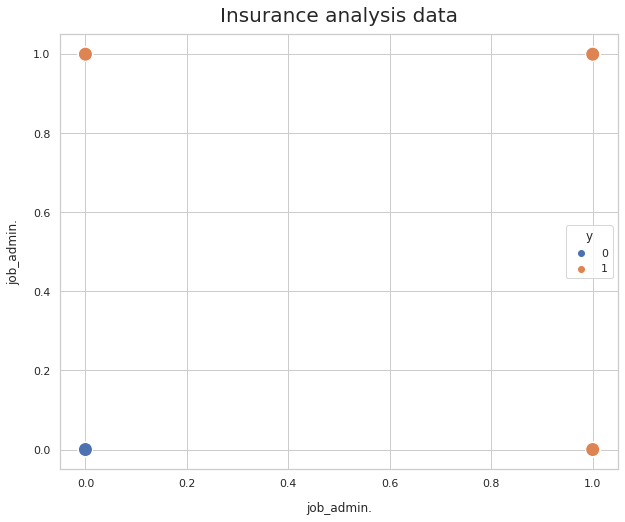

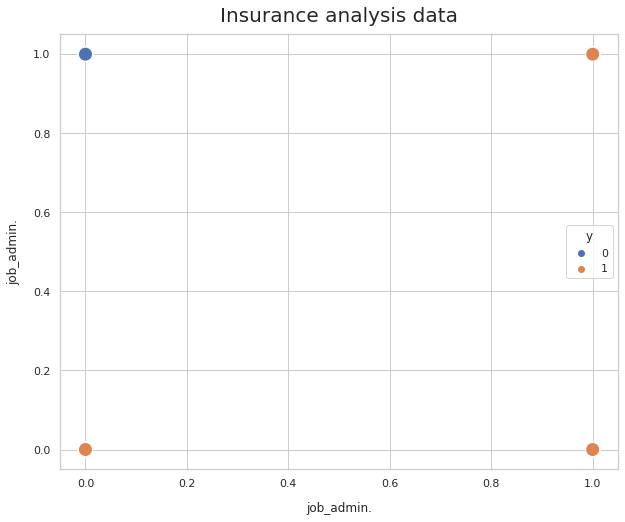

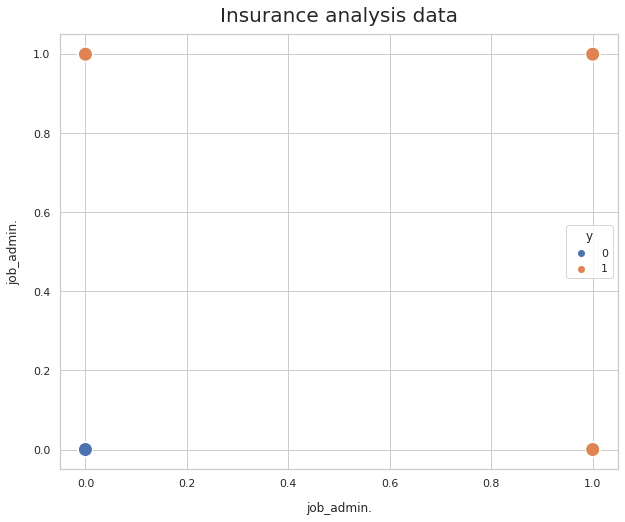

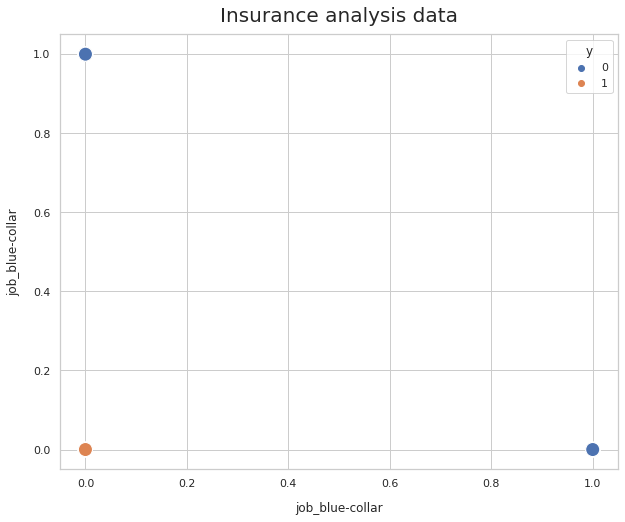

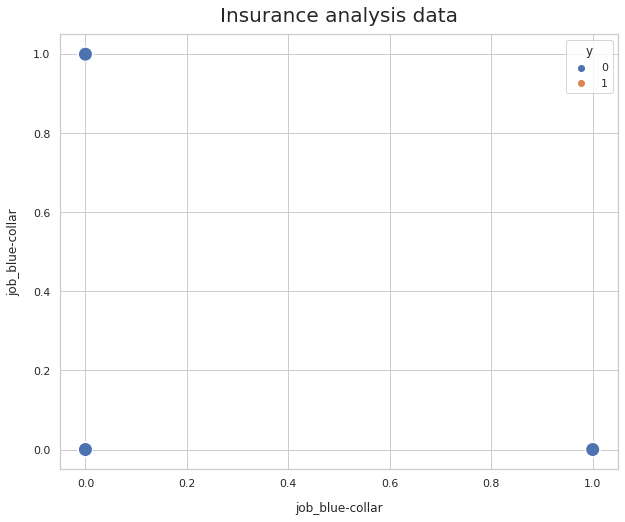

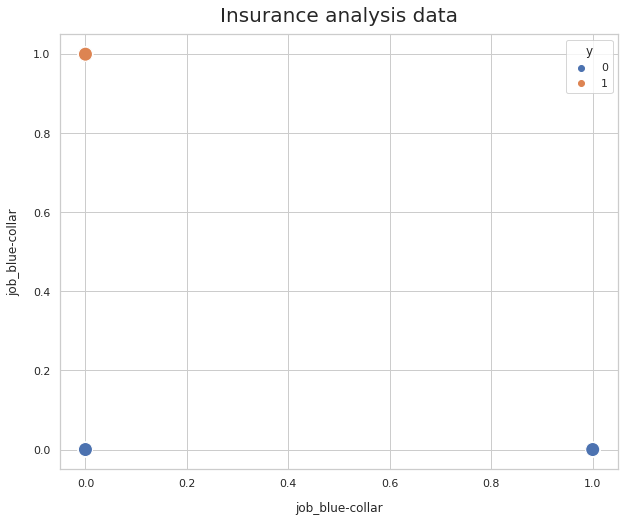

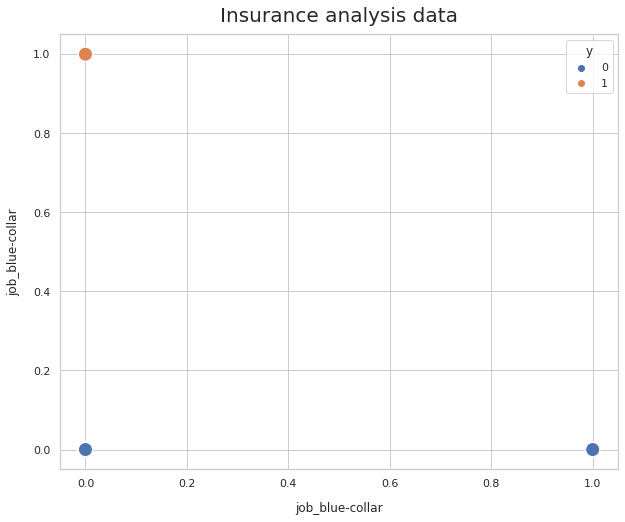

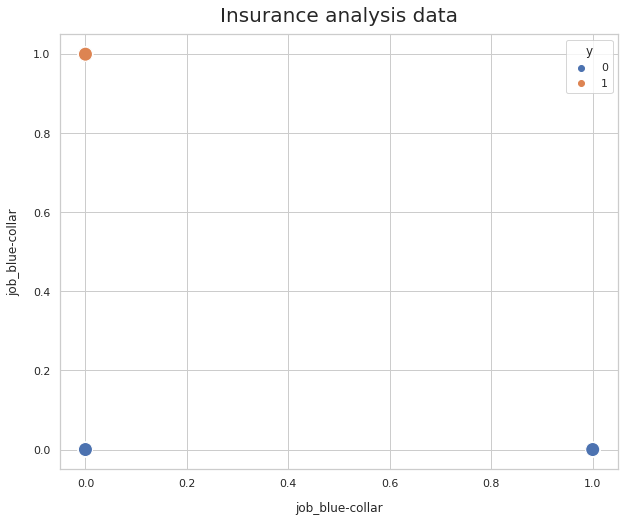

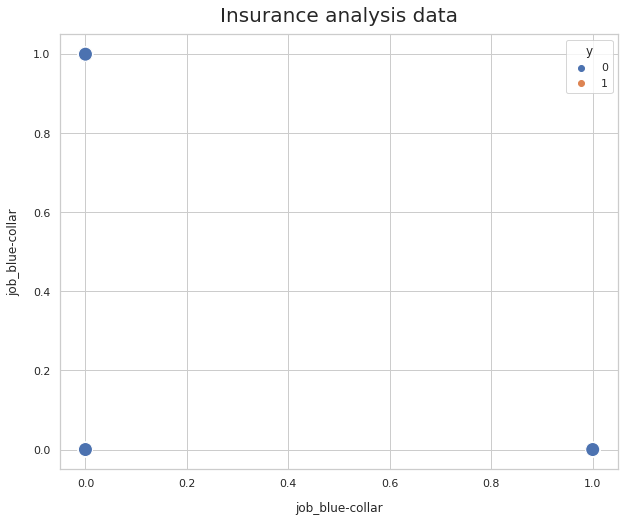

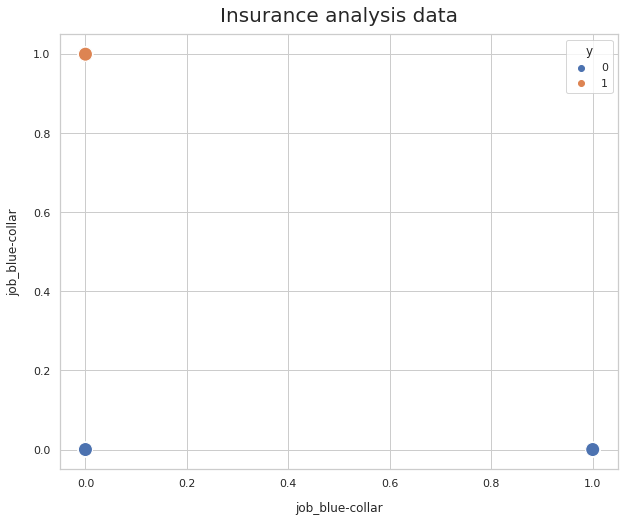

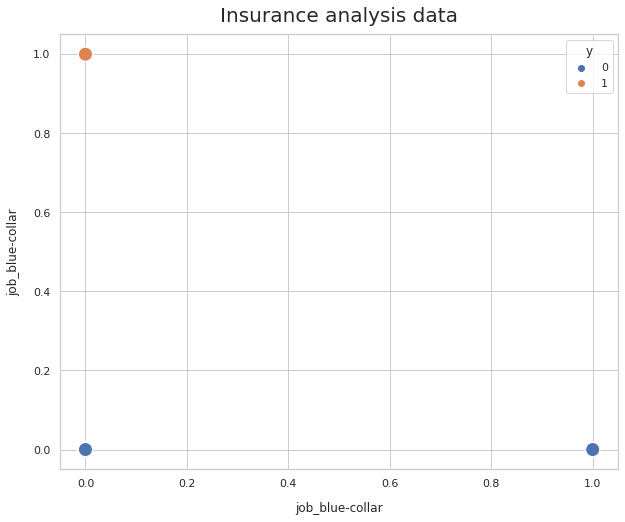

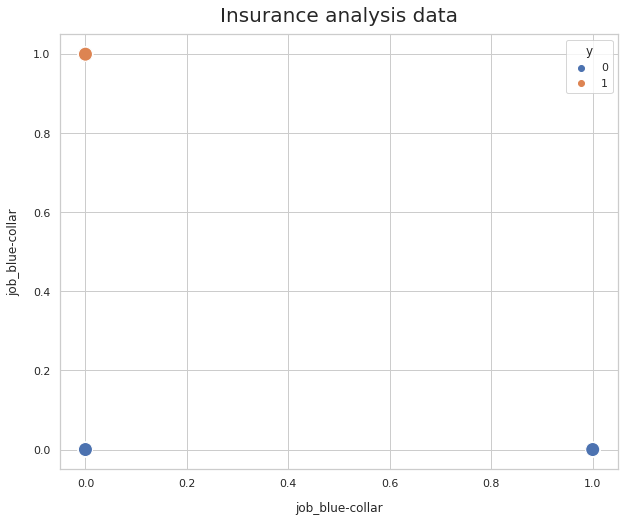

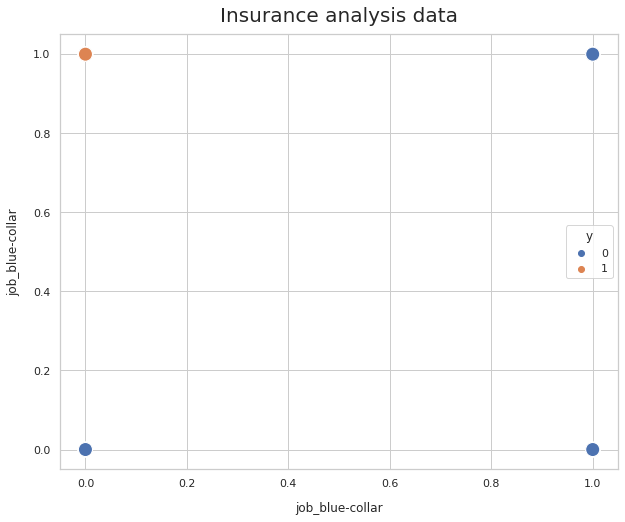

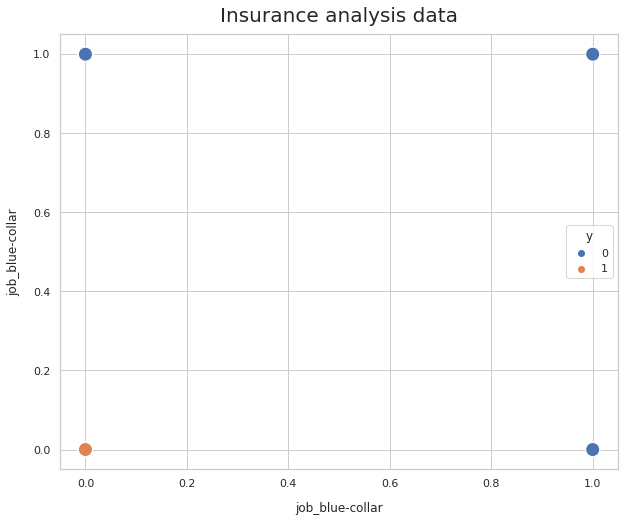

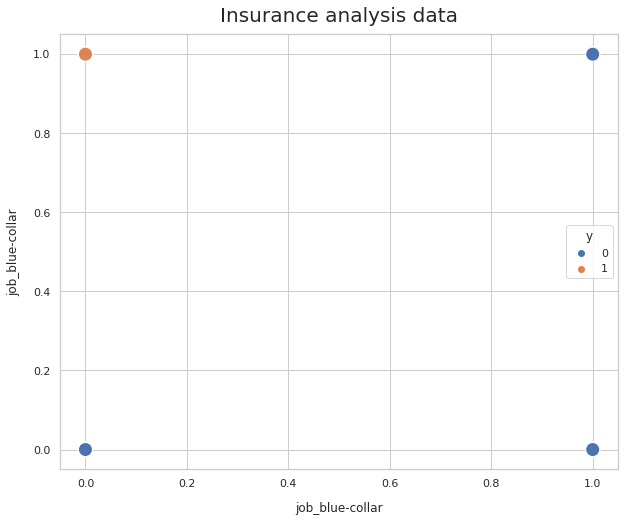

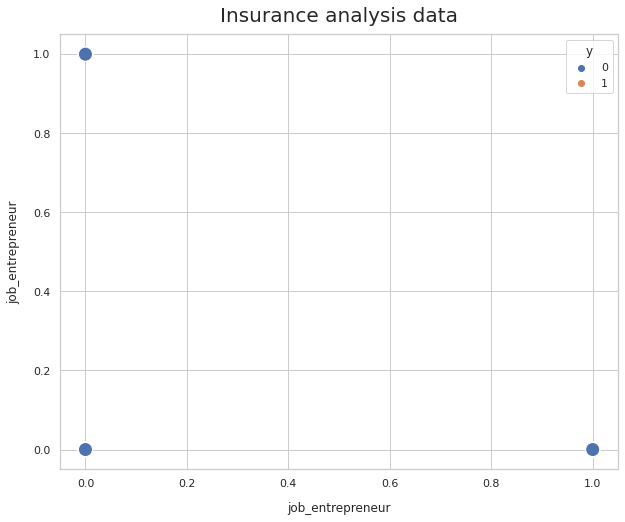

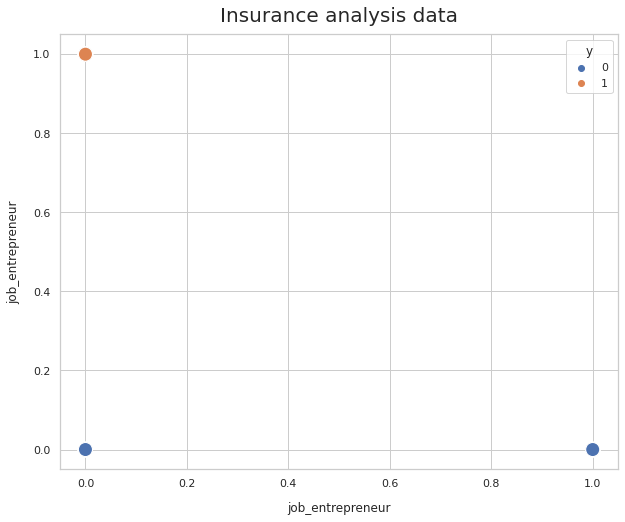

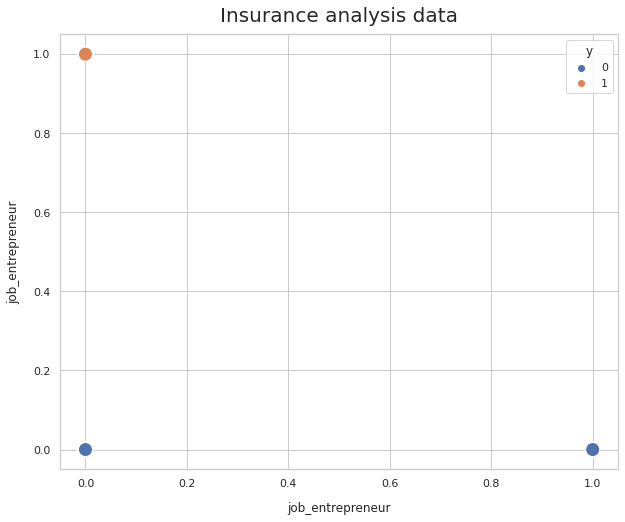

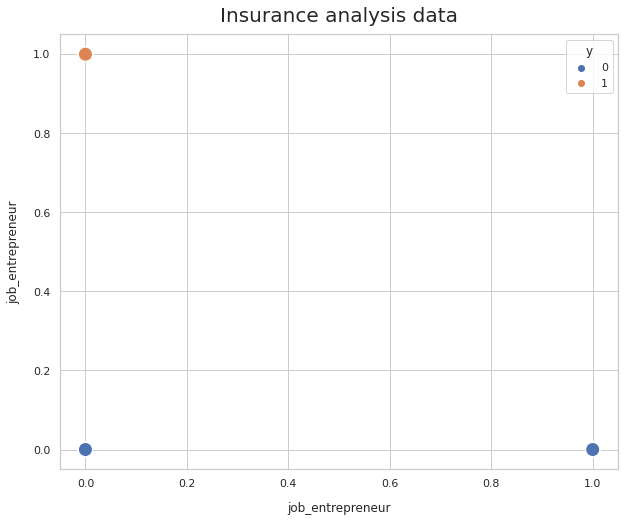

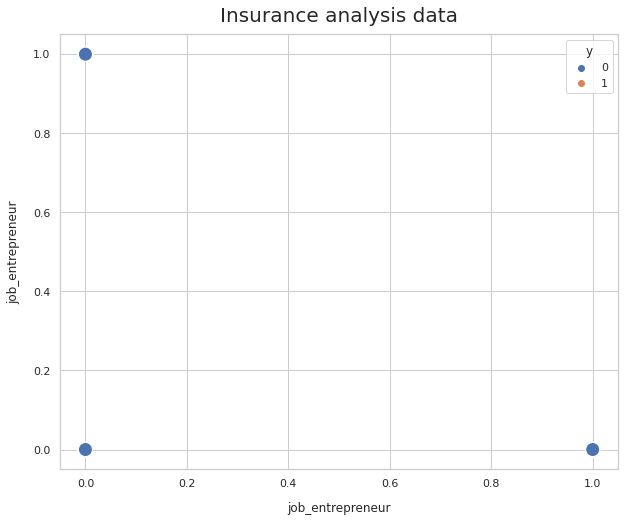

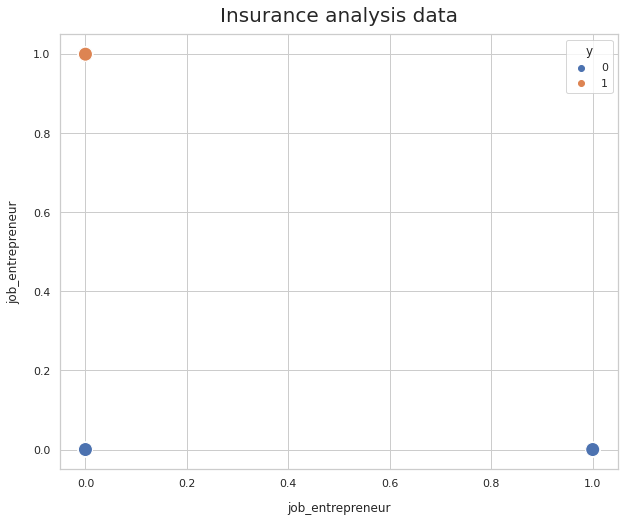

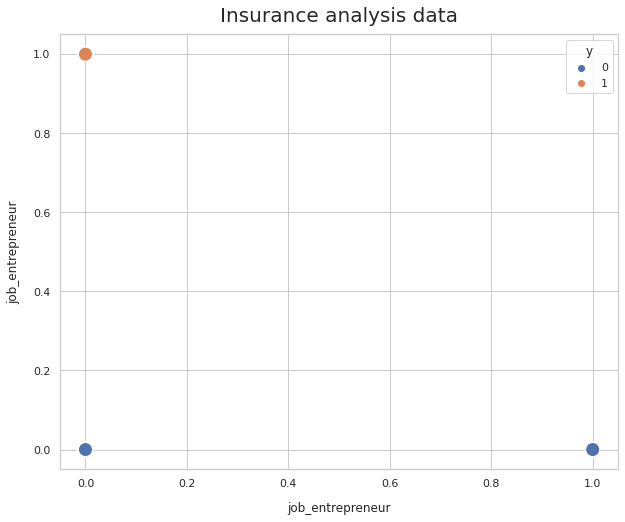

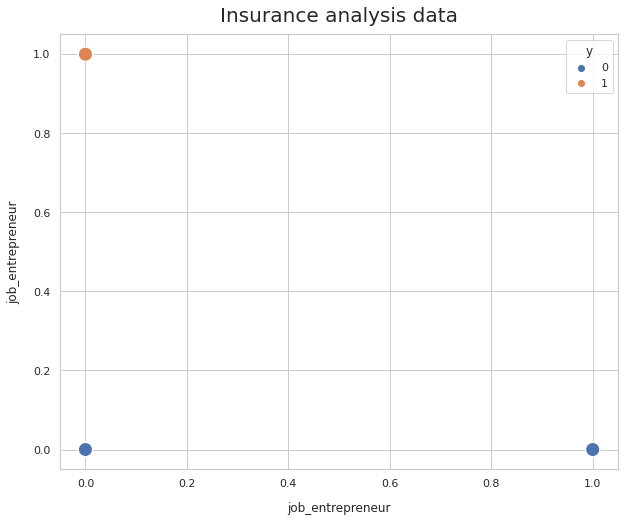

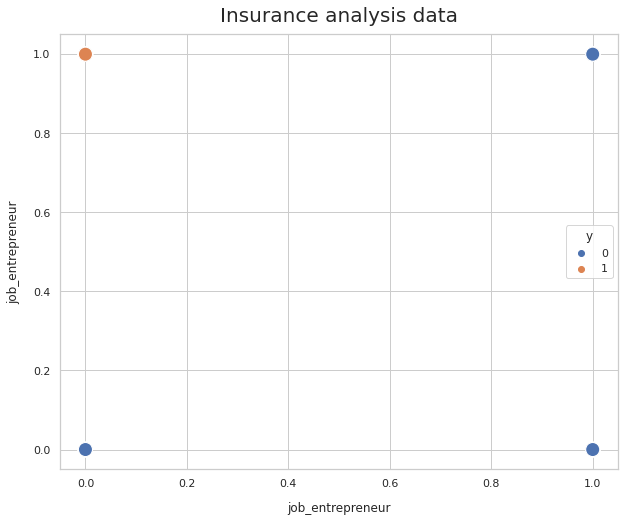

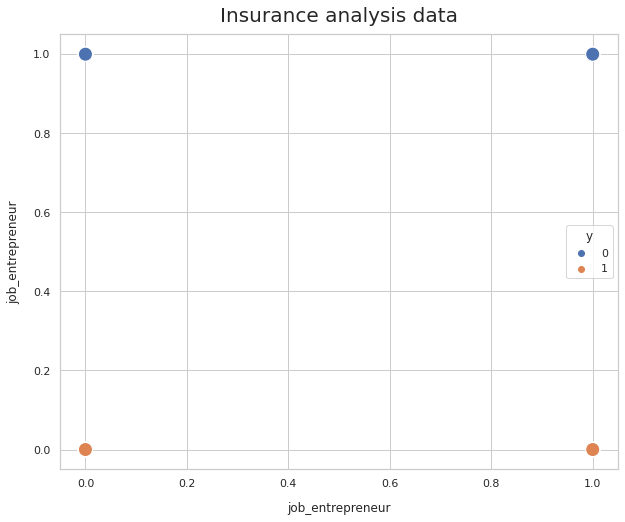

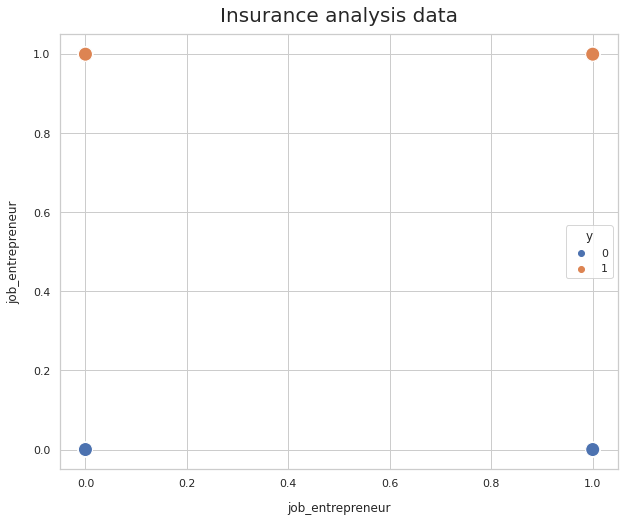

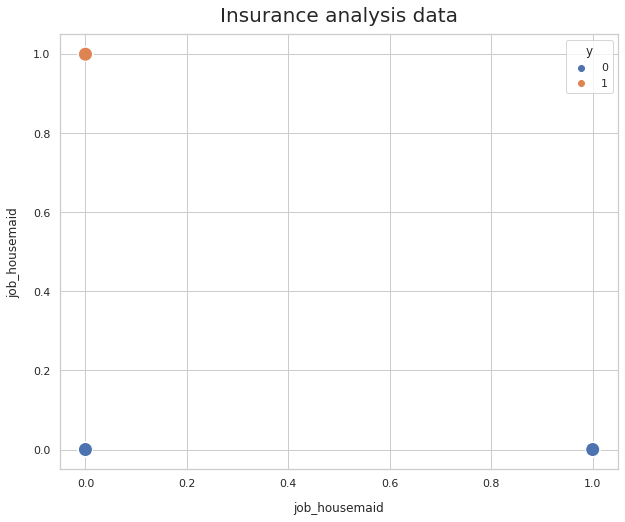

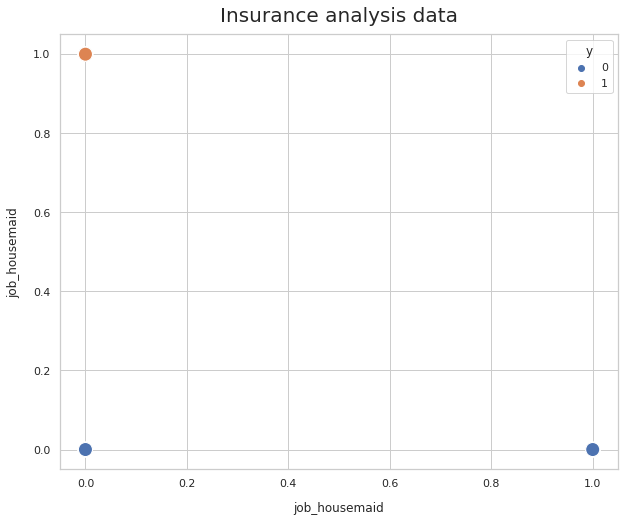

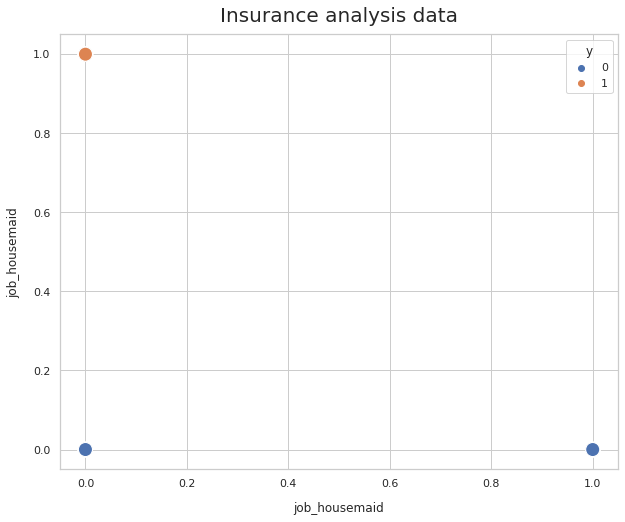

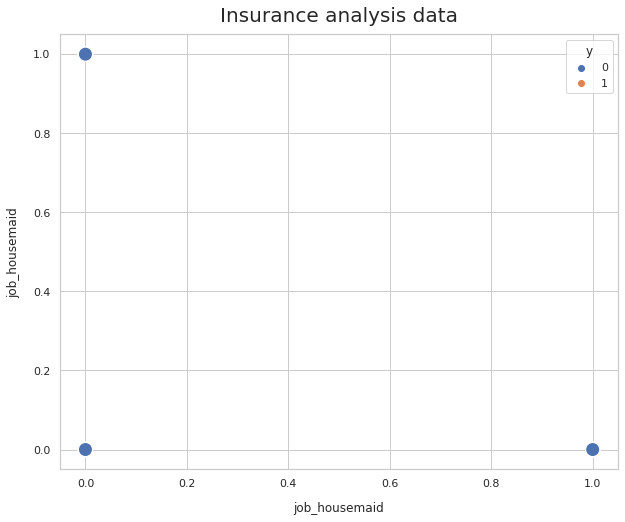

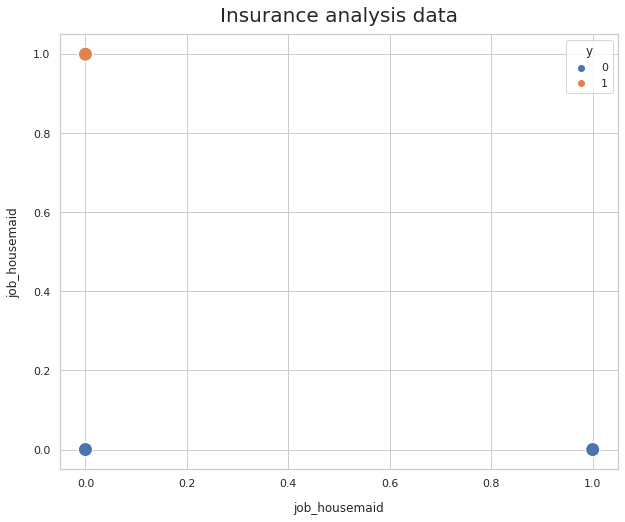

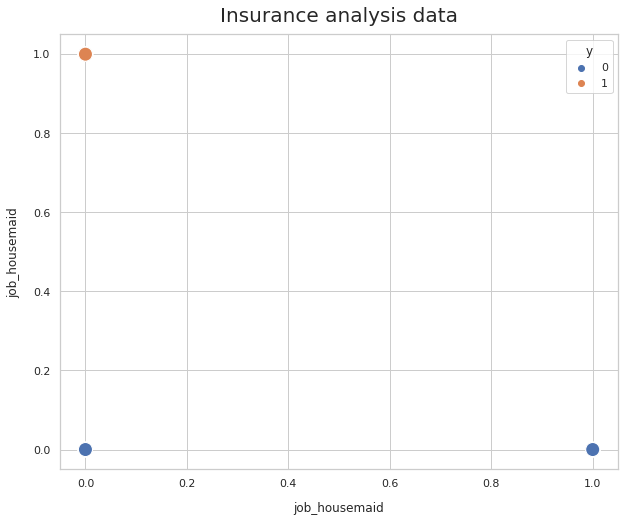

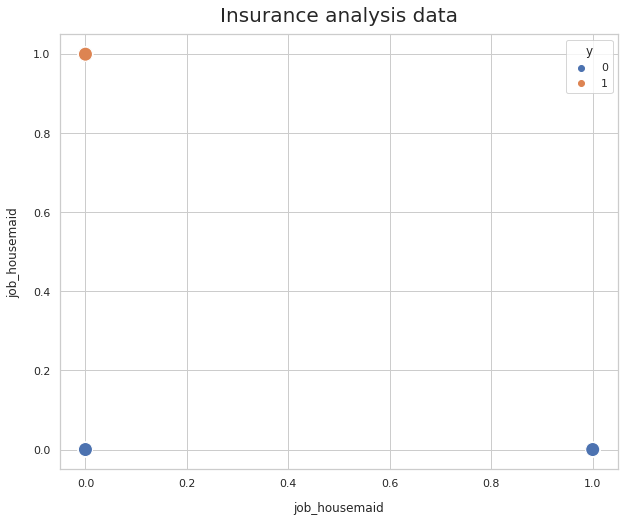

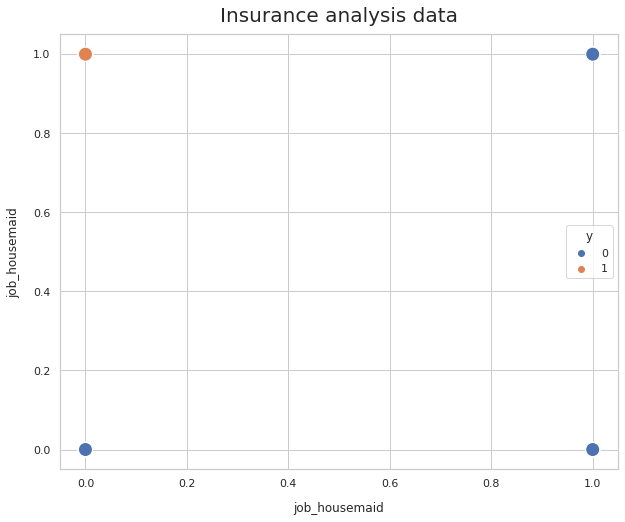

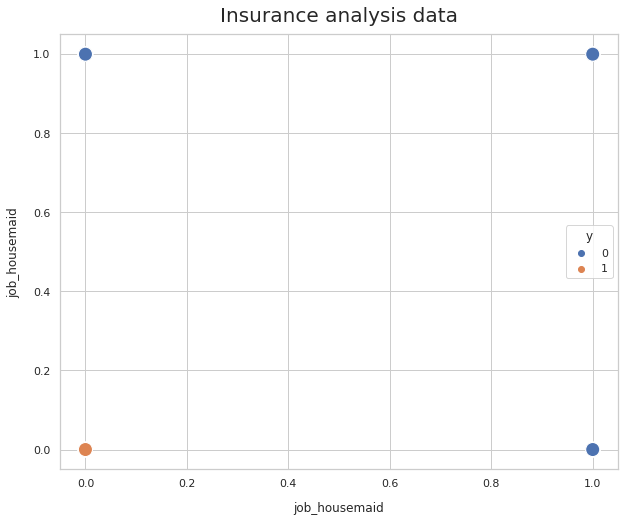

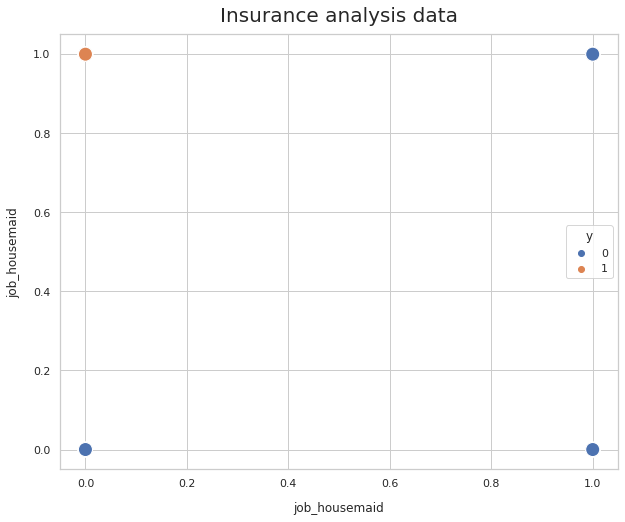

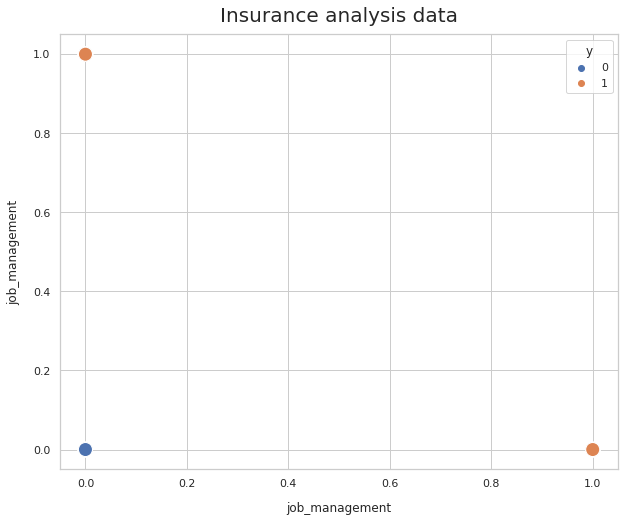

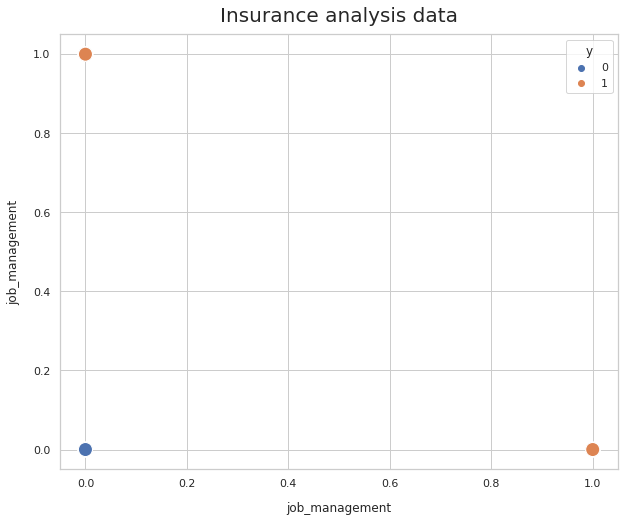

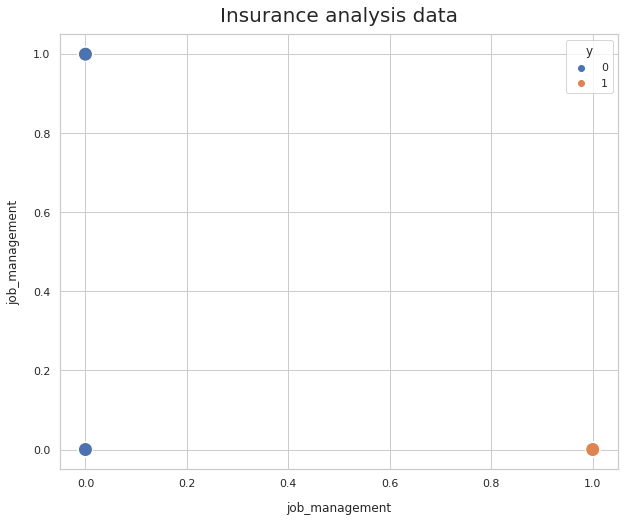

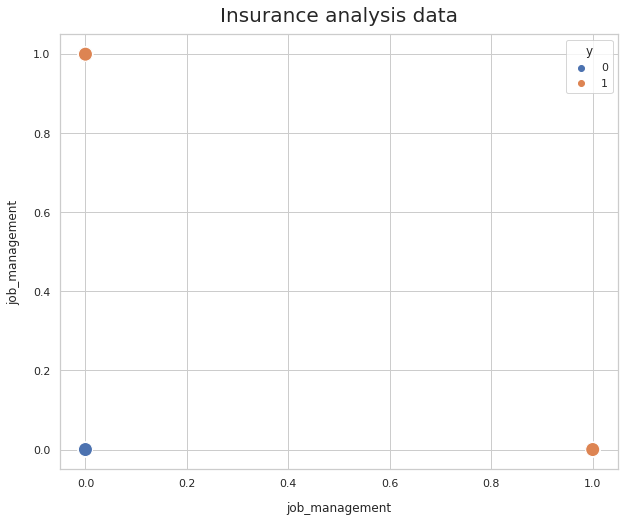

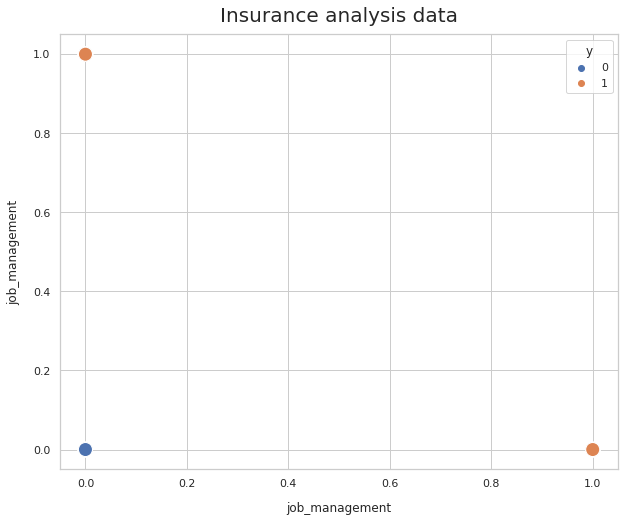

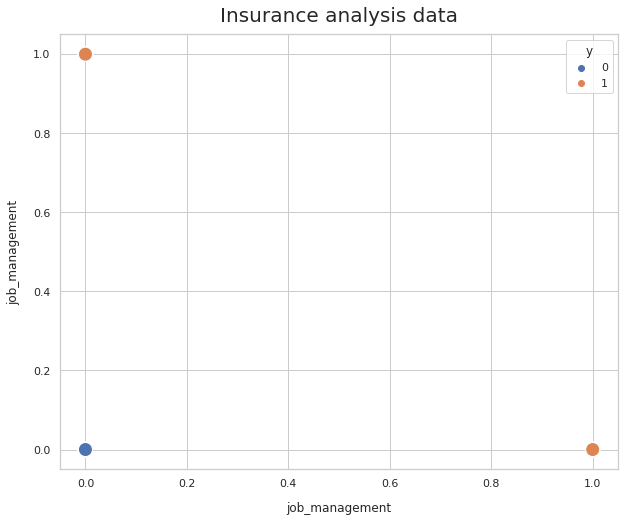

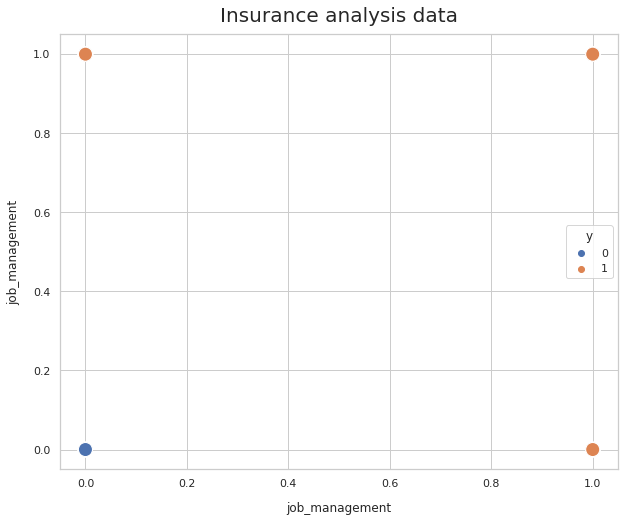

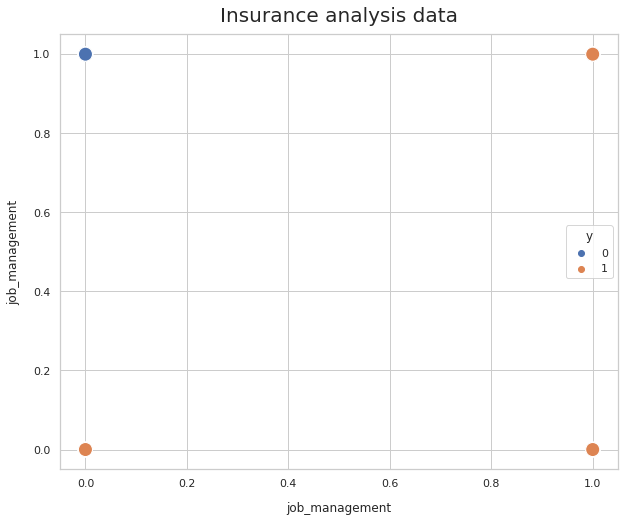

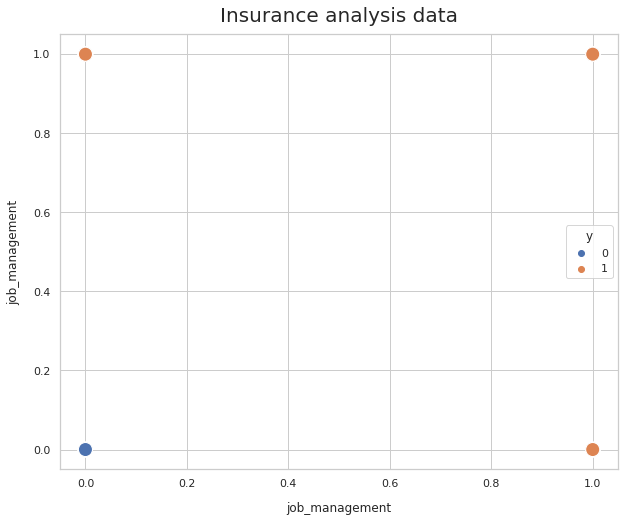

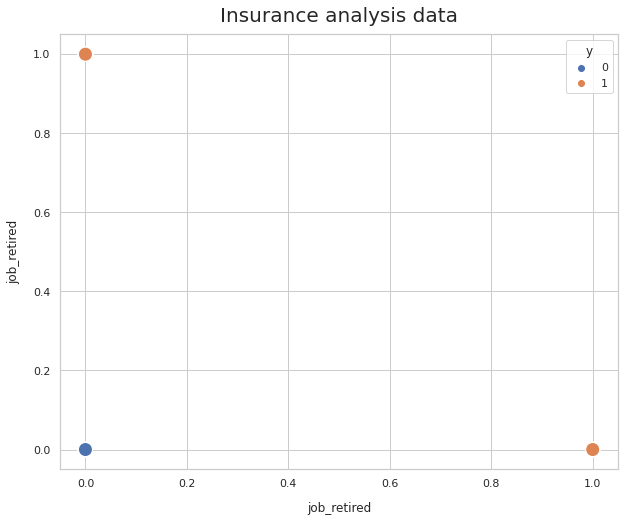

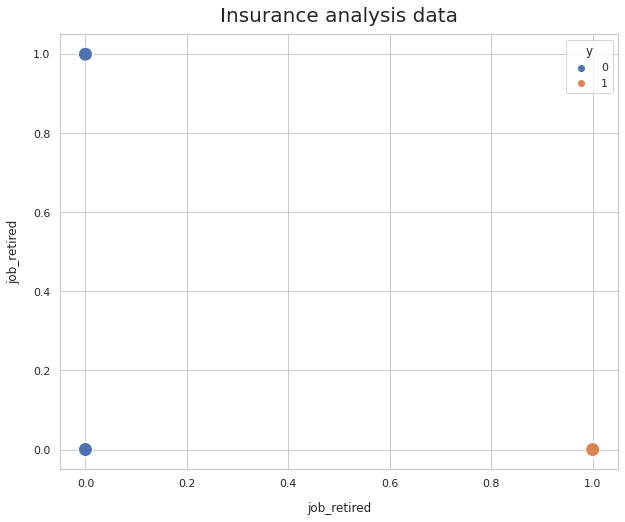

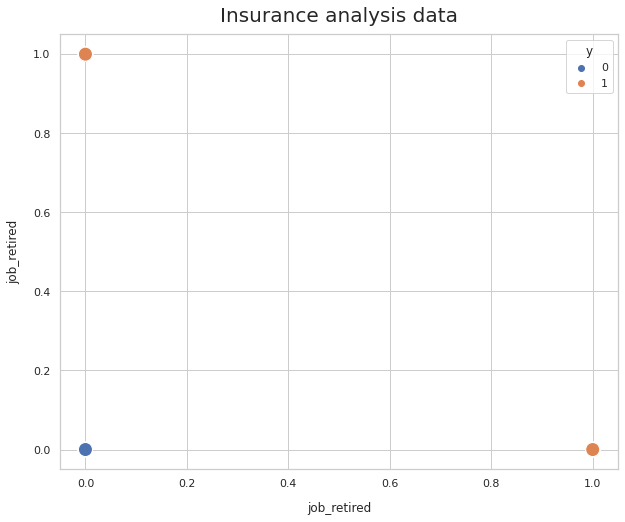

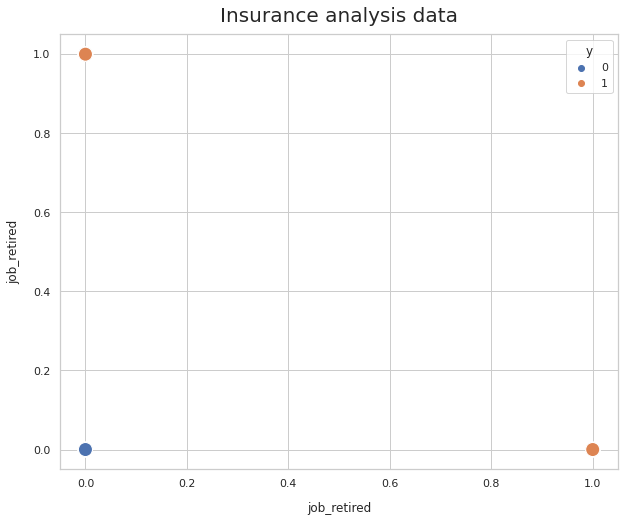

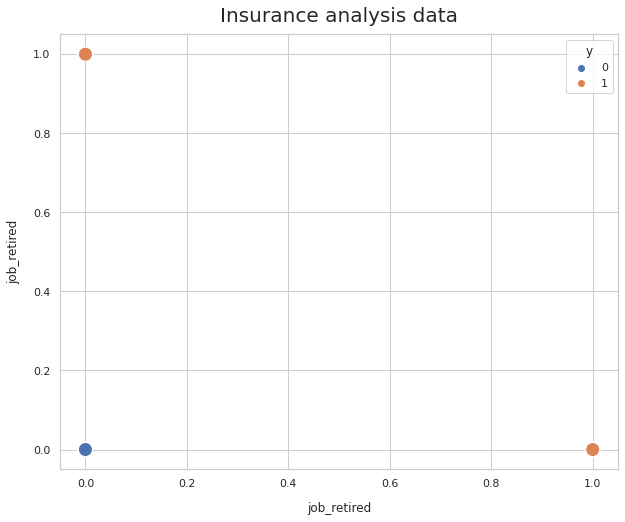

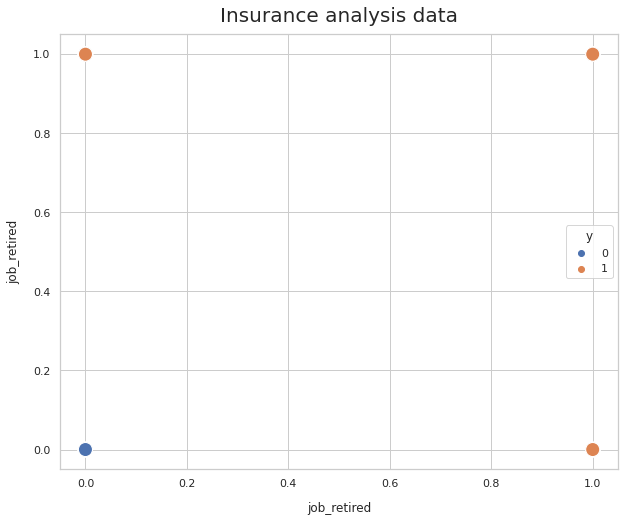

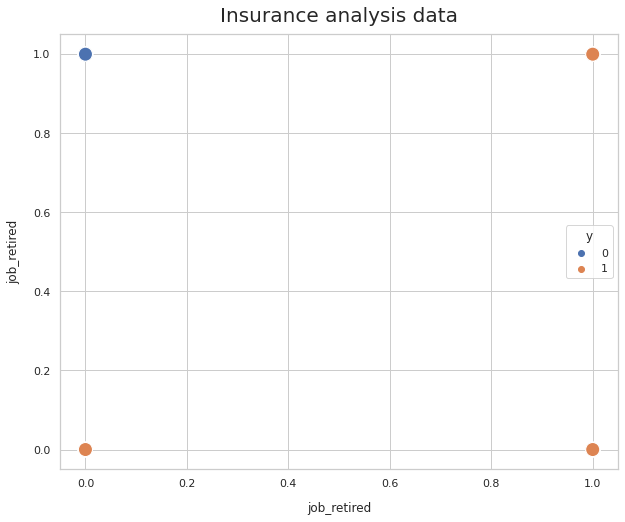

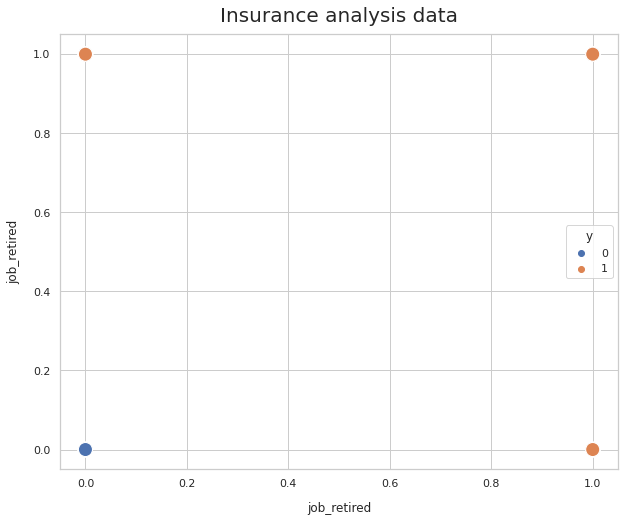

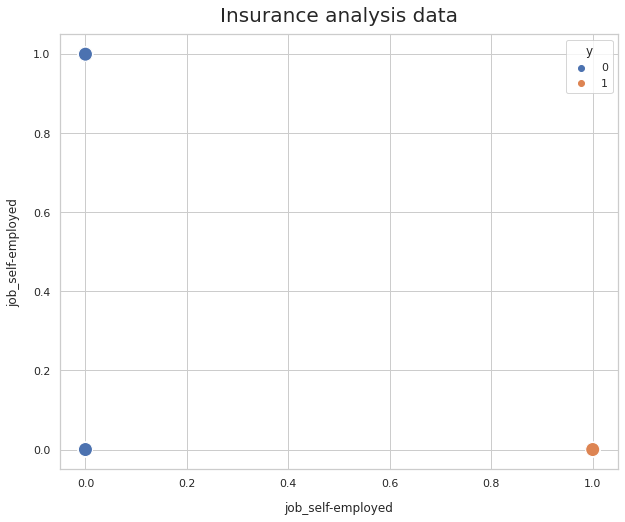

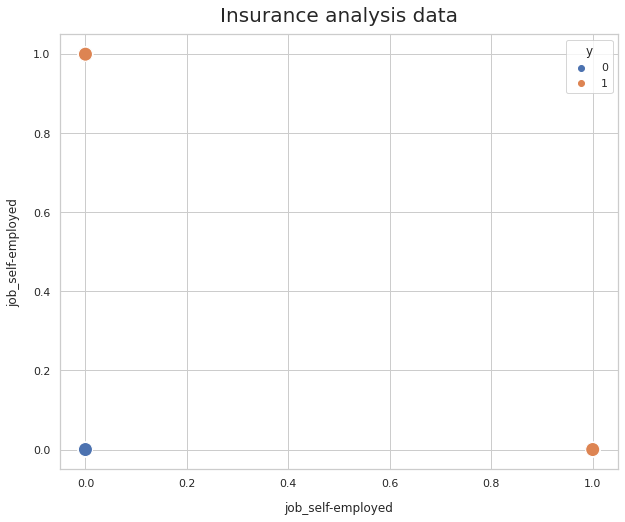

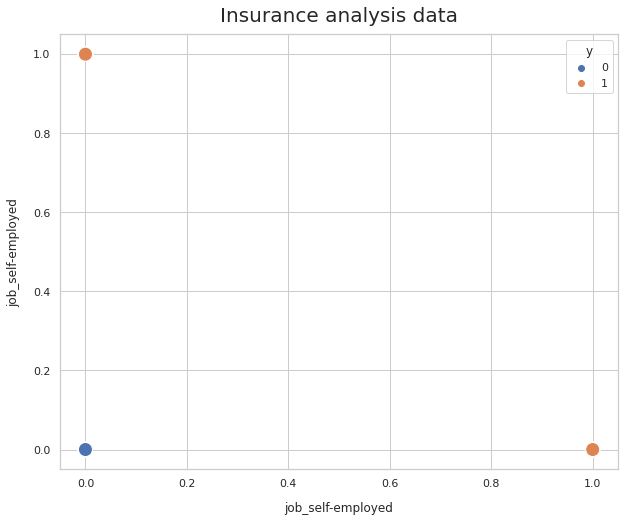

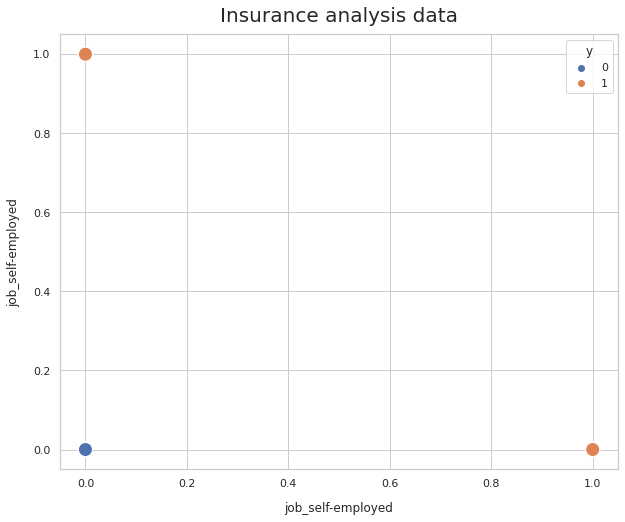

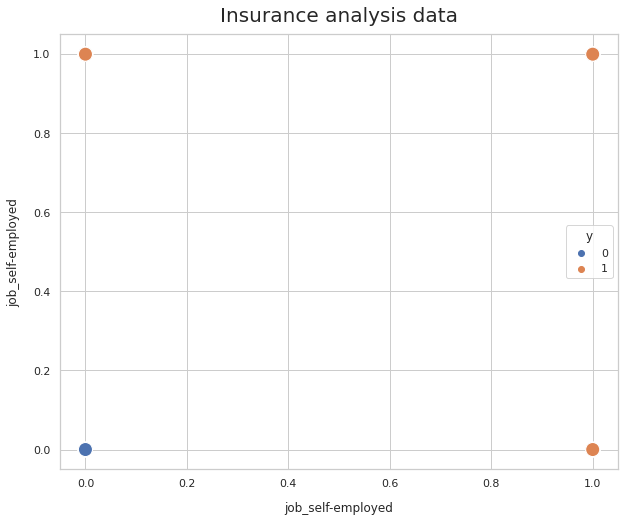

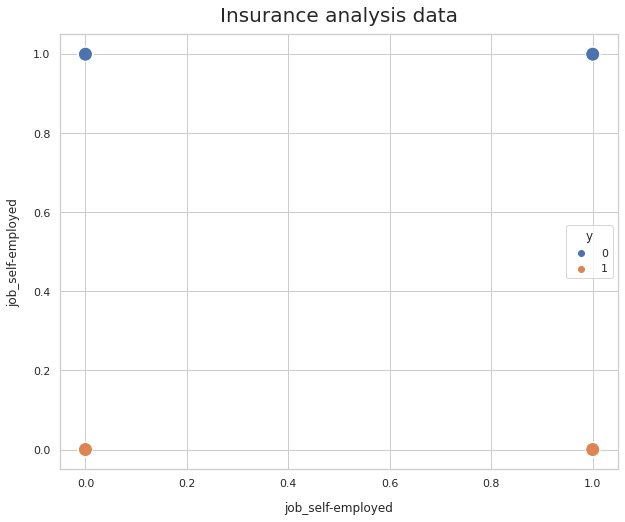

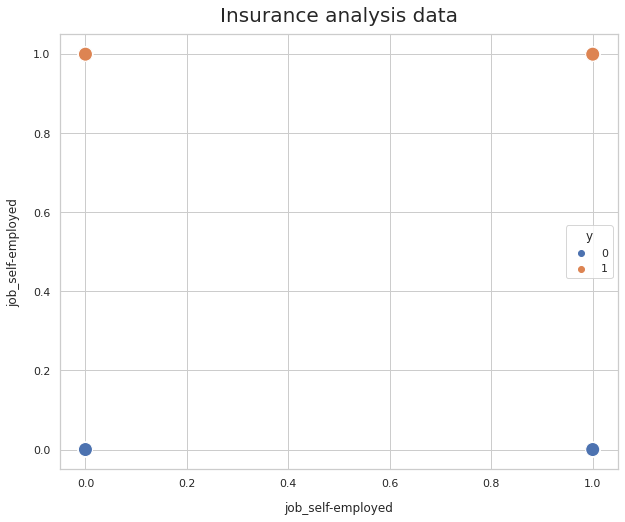

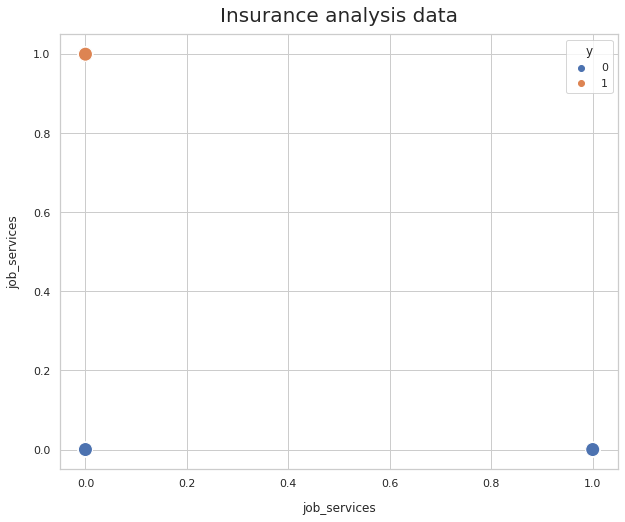

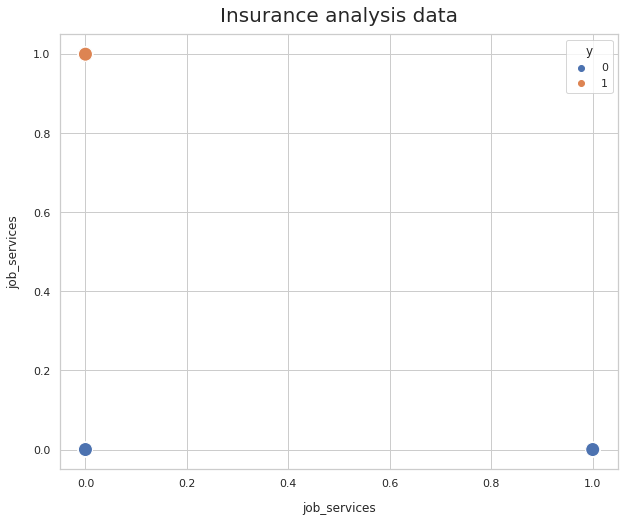

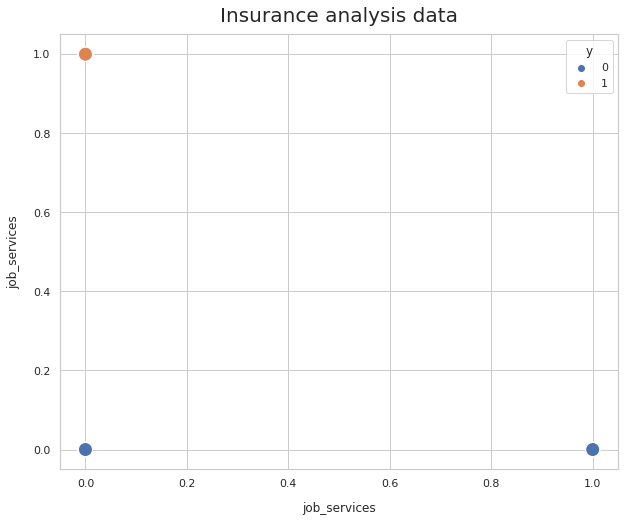

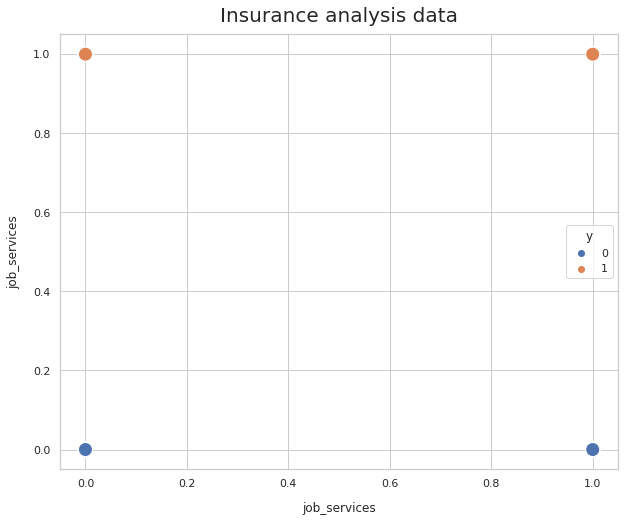

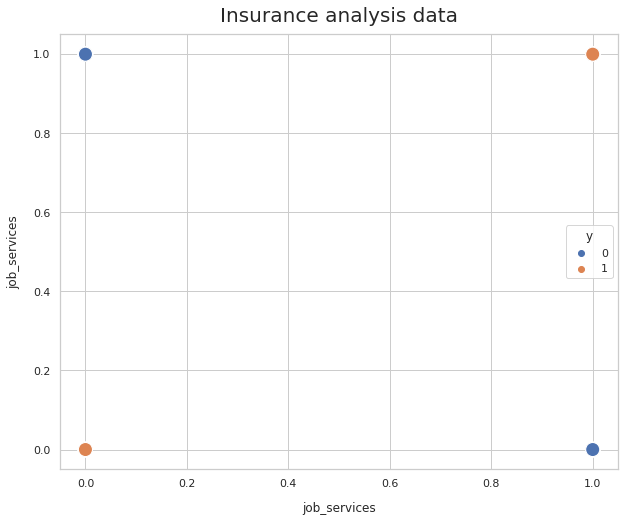

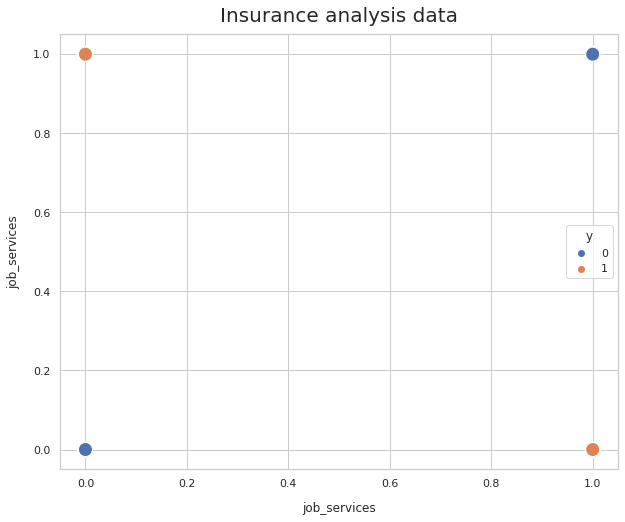

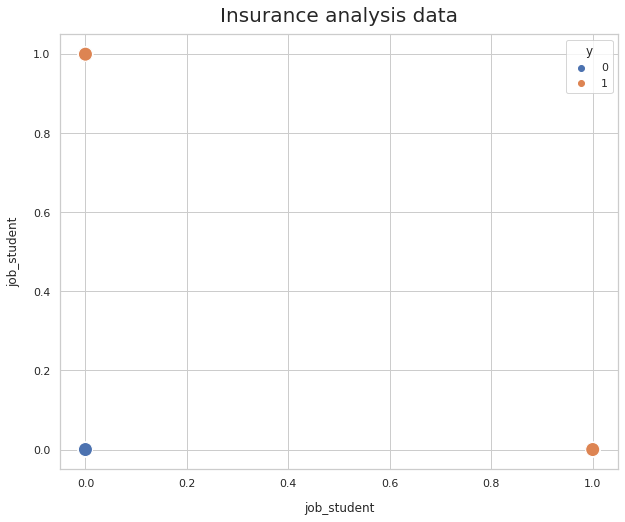

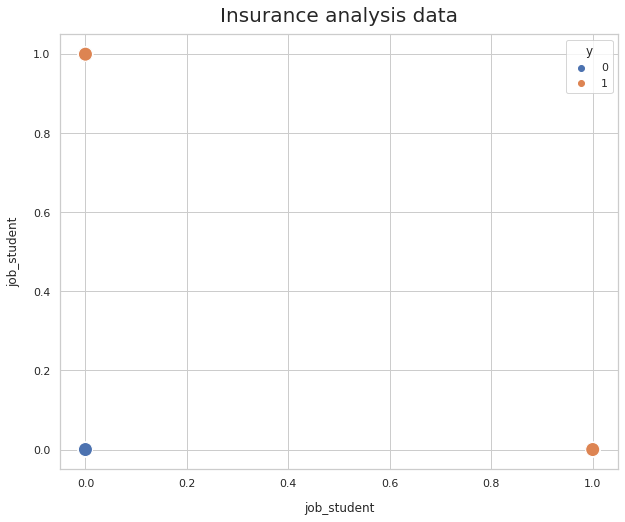

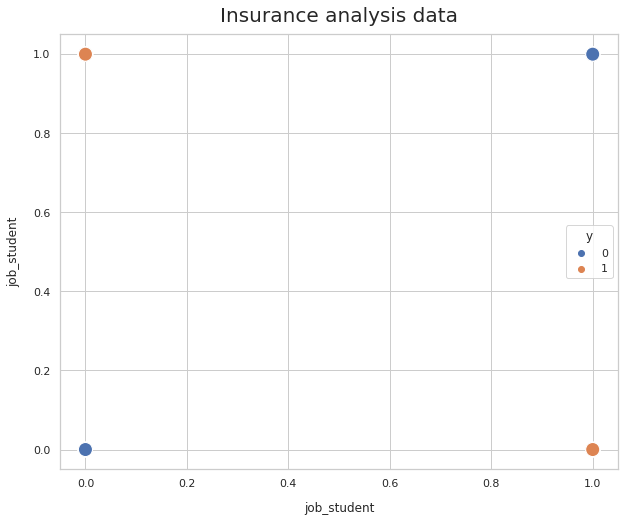

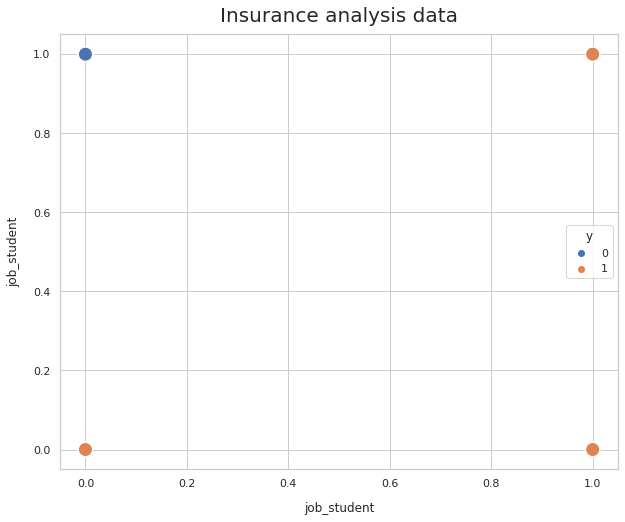

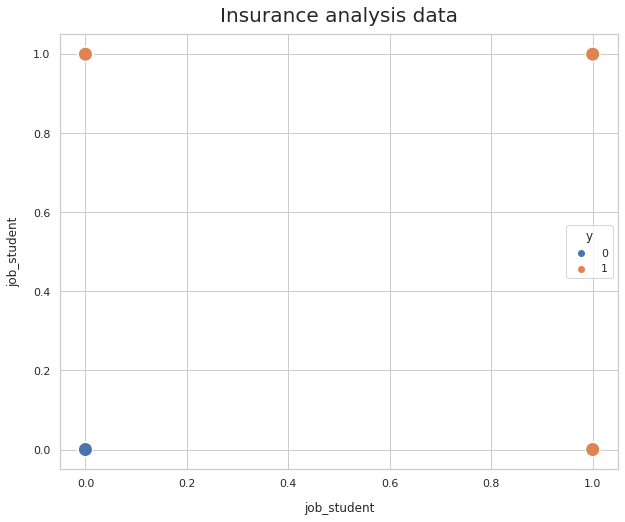

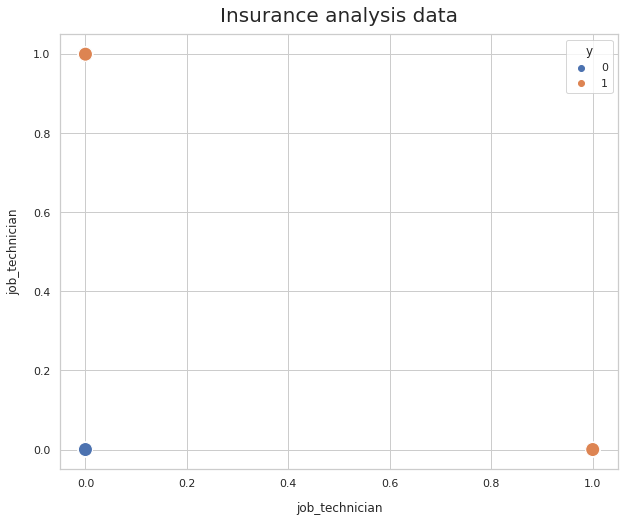

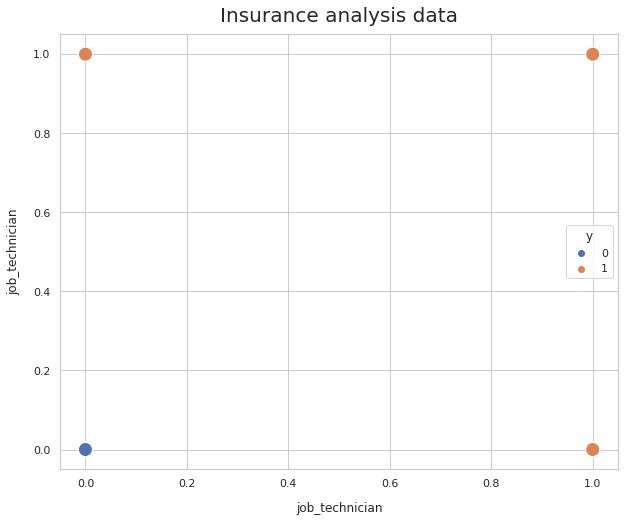

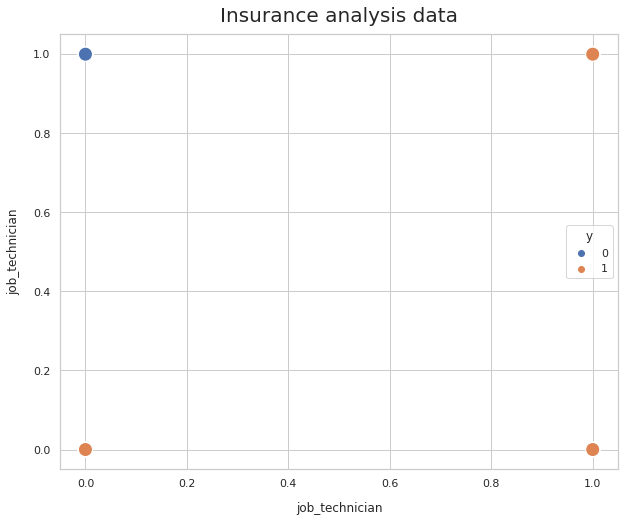

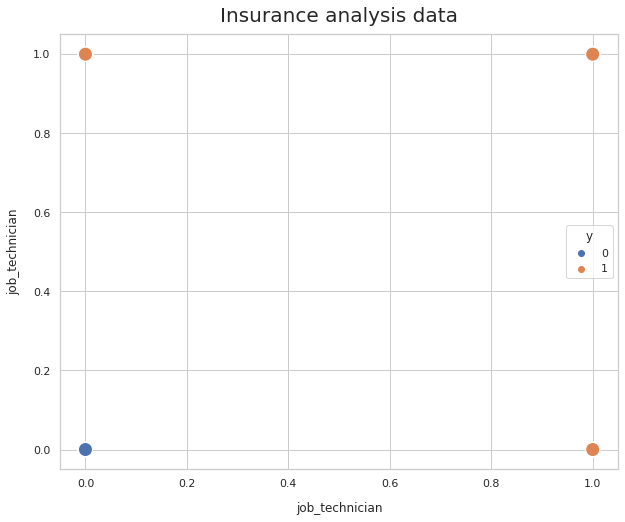

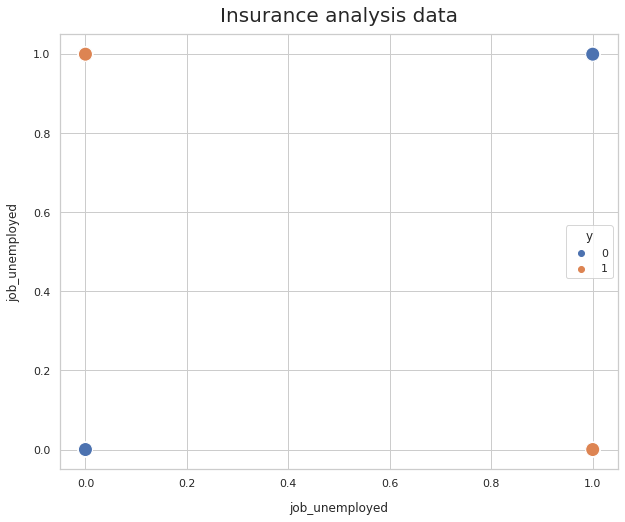

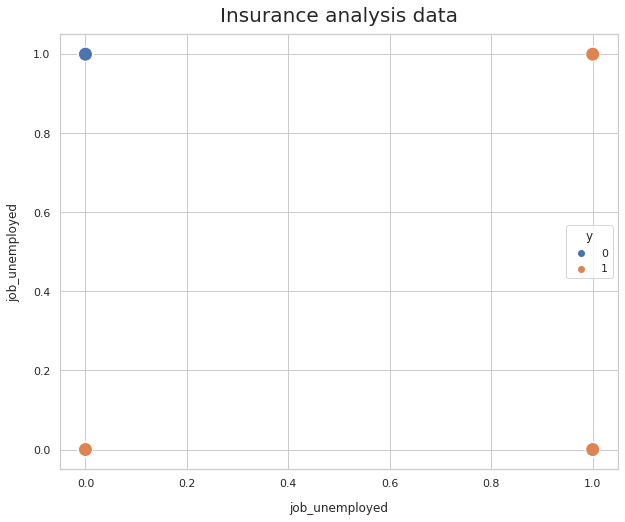

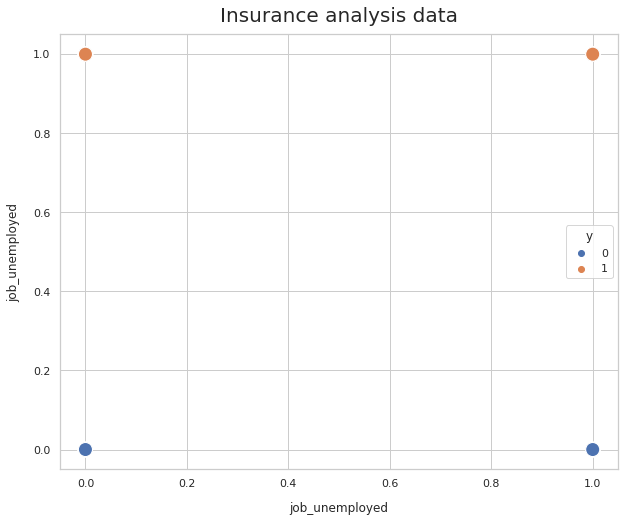

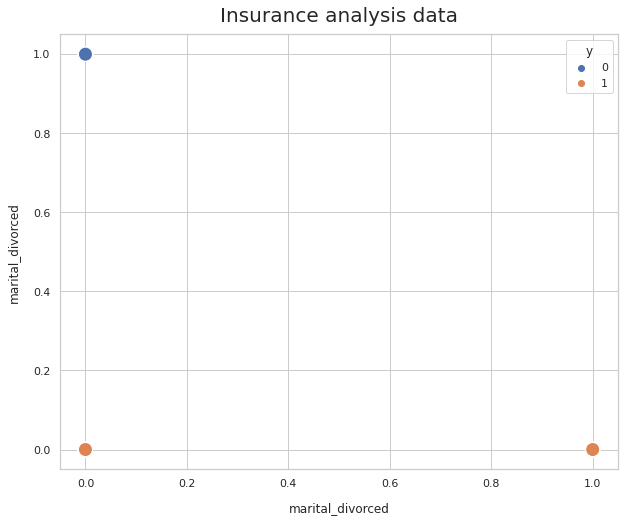

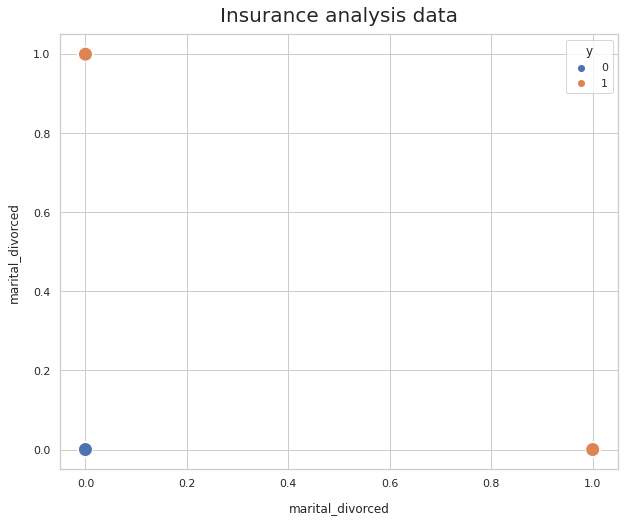

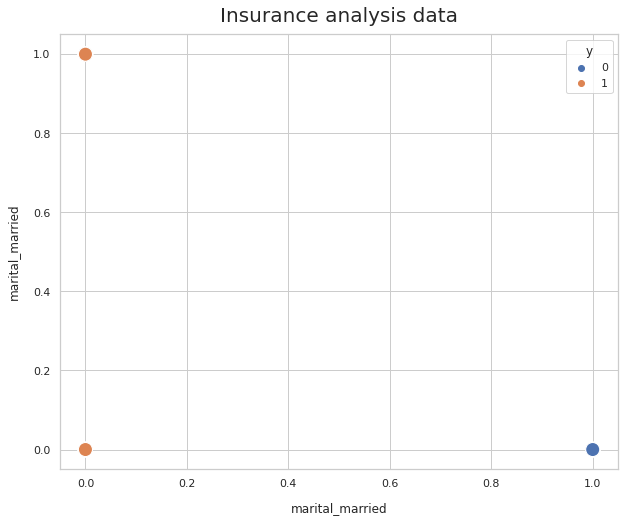

In [144]:
from itertools import combinations
dflr=dfT.drop(['y'],axis=1)
a=list(combinations(dflr.columns,2))
print(a)
for i in range(len(a)):
  plt.figure(figsize=(10, 8))
  sns.scatterplot(x=a[i][0], y=a[i][1], hue='y', data=dfT, s=200)
  plt.title("Insurance analysis data", y=1.015, fontsize=20)
  plt.xlabel(a[i][0], labelpad=13)
  plt.ylabel(a[i][0], labelpad=13)
  ax = plt.gca()

# Sampling and Splitting the dataset into the Training set and Test set

In [145]:
from sklearn.model_selection import train_test_split
X = dfT.drop(['y'], axis=1)
y = dfT['y']


In [146]:
dfT['y'].value_counts()
inactive = len(dfT[dfT['y'] == 0])
active = len(dfT[dfT['y'] == 1])
class_distribution_ratio = inactive/active
print(inactive)
print(active)
print(class_distribution_ratio)

39922
5289
7.548118737001324


In [147]:
from imblearn.under_sampling import NearMiss
from collections import Counter
undersampling = NearMiss(version=3, n_neighbors=3)
X, y= undersampling.fit_resample(X,y)
c=Counter(y)
print(c)

Counter({0: 5289, 1: 5289})


In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

# Feature Scaling

In [149]:
from sklearn.preprocessing import StandardScaler # importing the required function
scaler = StandardScaler() #initialis
scaler.fit(X_train) # find the values of mu and sigma
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

# Fitting Logistic Regression to the Training set

In [150]:
from sklearn.linear_model import LogisticRegression #main code that build the LR model 
logistic_regression= LogisticRegression() #initialise the required package
logistic_regression.fit(X_train,y_train) 

LogisticRegression()

# Prediction using Logistic Regression

In [151]:
y_pred=logistic_regression.predict(X_test)
y_pred

array([1, 0, 0, ..., 1, 1, 0])

# Evaluation of logistic regression

In [152]:
from sklearn.metrics import accuracy_score, plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score
print("The confusion matrix: \n", confusion_matrix(y_test,y_pred))
print("Accuracy : ", logistic_regression.score(X_test,y_test))
print("f1 score : ", f1_score(y_test,y_pred))
print("AUROC score : ", roc_auc_score(y_test,y_pred))
lr_auroc=roc_auc_score(y_test,y_pred)

The confusion matrix: 
 [[946 660]
 [635 933]]
Accuracy :  0.591997479521109
f1 score :  0.5903195191395129
AUROC score :  0.5920333030472463


# Fitting KNN to the Training set

In [153]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score 
for i in [1,2,3,4,5,6,7,8,9,10,15,20,21,22,23,24,25,30,40,50,80]:
  knn = KNeighborsClassifier(i) #initialising the model
  knn.fit(X_train,y_train) # training the model
  print("K value  : " , i, " train score : ", knn.score(X_train,y_train) , " cv score : ", np.mean(cross_val_score(knn, X_train, y_train, cv=10, scoring = "roc_auc"))) #predicting using the model

K value  :  1  train score :  1.0  cv score :  0.57762373984285
K value  :  2  train score :  0.7789032955159373  cv score :  0.6049312583207502
K value  :  3  train score :  0.7910588870880605  cv score :  0.6180682488086255
K value  :  4  train score :  0.7312263641274986  cv score :  0.6241164463868467
K value  :  5  train score :  0.740815775256618  cv score :  0.6301838446958181
K value  :  6  train score :  0.7116423554835224  cv score :  0.6368451344745061
K value  :  7  train score :  0.7116423554835224  cv score :  0.6398378419771082
K value  :  8  train score :  0.6980010804970286  cv score :  0.6386769170790332
K value  :  9  train score :  0.7005672609400324  cv score :  0.6411555656489245
K value  :  10  train score :  0.6871961102106969  cv score :  0.6420219689555277
K value  :  15  train score :  0.6786871961102107  cv score :  0.6491046061662892
K value  :  20  train score :  0.657752566180443  cv score :  0.652545687853587
K value  :  21  train score :  0.660723933009

Let the K value be 21. Since, it has highest cross validation score and decent train score.

# Prediction using KNN

In [154]:
knn = KNeighborsClassifier(21)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
y_pred

array([1, 1, 1, ..., 0, 1, 0])

# Evaluation of KNN

In [155]:
print("The confusion matrix: \n", confusion_matrix(y_test,y_pred))
print("Accuracy : ", knn.score(X_test,y_test))
print("f1 score : ", f1_score(y_test,y_pred))
print("AUROC score : ", roc_auc_score(y_test,y_pred))
knn_auroc=roc_auc_score(y_test,y_pred)

The confusion matrix: 
 [[1011  595]
 [ 648  920]]
Accuracy :  0.6083805923125394
f1 score :  0.5968212779759974
AUROC score :  0.6081245075863472


# Fitting SVM to the Training set

In [156]:
from sklearn.svm import SVC
# Building a Support Vector Machine on train data
svc_model = SVC(kernel='linear')
svc_model.fit(X_train, y_train)

SVC(kernel='linear')

# Prediction using SVM

In [157]:
y_pred=svc_model.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

# Evaluation of SVM

In [158]:
print("The confusion matrix: \n", confusion_matrix(y_test,y_pred))
print("Accuracy : ", svc_model.score(X_test,y_test))
print("f1 score : ", f1_score(y_test,y_pred))
print("AUROC score : ", roc_auc_score(y_test,y_pred))
svm_auroc=roc_auc_score(y_test,y_pred)

The confusion matrix: 
 [[988 618]
 [681 887]]
Accuracy :  0.5907372400756143
f1 score :  0.5772860397006183
AUROC score :  0.5904409008310673


# Fitting Decision Tree Classification to the Training set

In [159]:
from sklearn.tree import DecisionTreeClassifier
for depth in [1,2,3,4,5,6,7,8,9,10,20]:
  dt = DecisionTreeClassifier(max_depth=depth) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  dt.fit(X_train, y_train) # the model is trained
  trainAccuracy = accuracy_score(y_train, dt.predict(X_train)) # this is useless information - i am showing to prove a point
  dt = DecisionTreeClassifier(max_depth=depth) # a fresh model which is not trained yet
  valAccuracy = cross_val_score(dt, X_train, y_train, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.5595623987034035  Cross val score :  0.5537562461246673
Depth  :  2  Training Accuracy :  0.5842787682333873  Cross val score :  0.5782000218842324
Depth  :  3  Training Accuracy :  0.6044030253916802  Cross val score :  0.5881996571470255
Depth  :  4  Training Accuracy :  0.6334413830361967  Cross val score :  0.6312793157529999
Depth  :  5  Training Accuracy :  0.6514046461372232  Cross val score :  0.6351949520370573
Depth  :  6  Training Accuracy :  0.6685575364667747  Cross val score :  0.6528879892037788
Depth  :  7  Training Accuracy :  0.6936790923824959  Cross val score :  0.6539681584418426
Depth  :  8  Training Accuracy :  0.7171799027552674  Cross val score :  0.6630134588029325
Depth  :  9  Training Accuracy :  0.7390599675850892  Cross val score :  0.6588268227741911
Depth  :  10  Training Accuracy :  0.7625607779578606  Cross val score :  0.6551843746580589
Depth  :  20  Training Accuracy :  0.9740680713128039  Cross val score :  0.614

Let the max_depth value be 8. Since, it has highest cross validation score and decent train score.

# Prediction using Decision Tree classifier

In [160]:
dt = DecisionTreeClassifier(max_depth=8)

# Fit dt to the training set
dt.fit(X_train, y_train) # it will ask all possible questions, compute the information gain and choose the best split

# Predict test set labels
y_pred = dt.predict(X_test)
y_pred

array([1, 1, 0, ..., 1, 0, 0])

# Evaluation of Decision Tree classifier

In [161]:
print("The confusion matrix: \n", confusion_matrix(y_test,y_pred))
print("Accuracy : ", dt.score(X_test,y_test))
print("f1 score : ", f1_score(y_test,y_pred))
print("AUROC score : ", roc_auc_score(y_test,y_pred))
dt_auroc=roc_auc_score(y_test,y_pred)

The confusion matrix: 
 [[ 958  648]
 [ 499 1069]]
Accuracy :  0.6386263390044108
f1 score :  0.6508371385083714
AUROC score :  0.6391366400233817


# Fitting Random Forest to the Training set

In [162]:
from sklearn.ensemble import RandomForestClassifier
for depth in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20]:
  rf = RandomForestClassifier(max_depth=depth) # will tell the rf to not grow past the given threhsold
  # Fit rf to the training set
  rf.fit(X_train, y_train) # the model is trained
  trainAccuracy = accuracy_score(y_train, rf.predict(X_train)) # this is useless information - i am showing to prove a point
  rf = RandomForestClassifier(max_depth=depth) # a fresh model which is not trained yet
  valAccuracy = cross_val_score(rf, X_train, y_train, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.5923824959481362  Cross val score :  0.5868484881642776
Depth  :  2  Training Accuracy :  0.6014316585629389  Cross val score :  0.6035979501768975
Depth  :  3  Training Accuracy :  0.6256077795786061  Cross val score :  0.613991683991684
Depth  :  4  Training Accuracy :  0.655861696380335  Cross val score :  0.6326343144764197
Depth  :  5  Training Accuracy :  0.674365207995678  Cross val score :  0.6499193930772879
Depth  :  6  Training Accuracy :  0.7012425715829281  Cross val score :  0.6526199073567495
Depth  :  7  Training Accuracy :  0.7273095623987034  Cross val score :  0.6631562534194113
Depth  :  8  Training Accuracy :  0.7562128579146408  Cross val score :  0.6709849728270781
Depth  :  9  Training Accuracy :  0.7844408427876823  Cross val score :  0.6738226282963125
Depth  :  10  Training Accuracy :  0.8229335494327391  Cross val score :  0.6777391764233871
Depth  :  11  Training Accuracy :  0.8562938951917882  Cross val score :  0.676790

Let the max_depth value be 13. Since, it has highest cross validation score and decent train score.

# Prediction using Random Forest

In [163]:
rf = RandomForestClassifier(max_depth=13)
rf.fit(X_train, y_train)
# Predict test set labels
y_pred = rf.predict(X_test)
y_pred

array([1, 1, 1, ..., 0, 0, 0])

# Evaluation of Random Forest

In [164]:
print("The confusion matrix: \n", confusion_matrix(y_test,y_pred))
print("Accuracy : ", rf.score(X_test,y_test))
print("f1 score : ", f1_score(y_test,y_pred))
print("AUROC score : ", roc_auc_score(y_test,y_pred))
rf_auroc=roc_auc_score(y_test,y_pred)

The confusion matrix: 
 [[1050  556]
 [ 510 1058]]
Accuracy :  0.6641461877756774
f1 score :  0.6649905719673163
AUROC score :  0.6642715772485831


# Fitting XGBoosting to the Training set

In [165]:
from xgboost import XGBClassifier
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.15,0.2,0.3,0.4,0.5,0.7,1]:
  model = XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(X_train,y_train) #train the model
  model.score(X_test, y_test) # scoring the model - r2 squared
  print("Learning rate : ", lr, " Train score : ", model.score(X_train,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, X_train, y_train, cv=10)))

Learning rate :  0.01  Train score :  0.6709886547811994  Cross-Val score :  0.6578845242003137
Learning rate :  0.02  Train score :  0.6801728795245813  Cross-Val score :  0.6654457088667616
Learning rate :  0.03  Train score :  0.6878714208535927  Cross-Val score :  0.6717972425867162
Learning rate :  0.04  Train score :  0.6961102106969206  Cross-Val score :  0.6761175548017653
Learning rate :  0.05  Train score :  0.6958400864397623  Cross-Val score :  0.6786836634205056
Learning rate :  0.06  Train score :  0.7046191247974068  Cross-Val score :  0.6808445490024437
Learning rate :  0.07  Train score :  0.7094813614262561  Cross-Val score :  0.6794946565999198
Learning rate :  0.08  Train score :  0.708535926526202  Cross-Val score :  0.6834090163037532
Learning rate :  0.09  Train score :  0.7125877903835764  Cross-Val score :  0.6820604004814532
Learning rate :  0.1  Train score :  0.7124527282549973  Cross-Val score :  0.6855717255717255
Learning rate :  0.15  Train score :  0.71

Let the Learning rate value be 0.2. Since, it has highest cross validation score and decent train score.

# Prediction using XGBoost

In [166]:
xgb = XGBClassifier(learning_rate = 0.2, n_estimators=100)
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
y_pred

array([1, 1, 1, ..., 0, 0, 0])

# Evaluation of XGBoost

In [167]:
print("The confusion matrix: \n", confusion_matrix(y_test,y_pred))
print("Accuracy : ", xgb.score(X_test,y_test))
print("f1 score : ", f1_score(y_test,y_pred))
print("AUROC score : ", roc_auc_score(y_test,y_pred))
xgb_auroc=roc_auc_score(y_test,y_pred)

The confusion matrix: 
 [[1104  502]
 [ 531 1037]]
Accuracy :  0.6745431632010082
f1 score :  0.6675249436755712
AUROC score :  0.6743871038452741


# Best Classification Algorithm for predicting the given dataset

In [168]:
df_results = pd.DataFrame({'classifier':['LR','KNN','SVM','DT','RF','XGBC'],
                          'auc':[lr_auroc,knn_auroc,svm_auroc,dt_auroc,rf_auroc,xgb_auroc]})

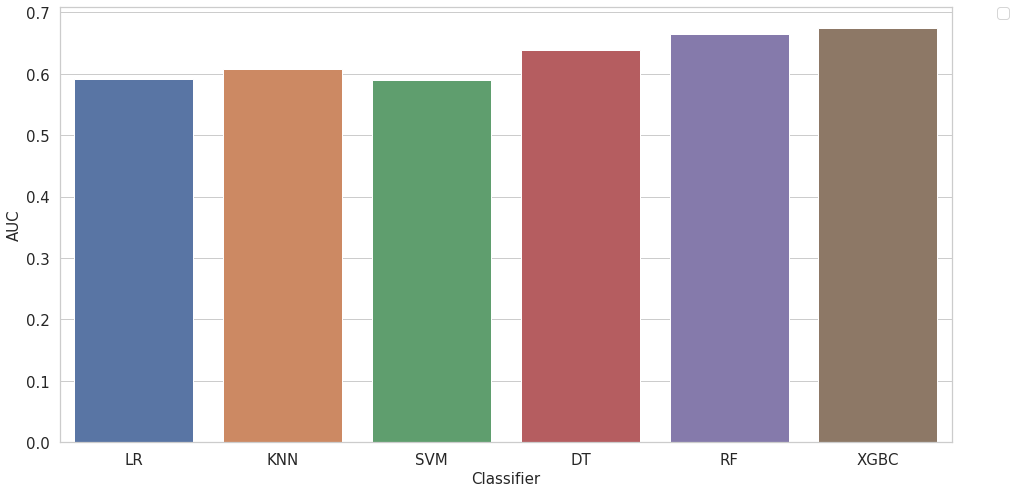

In [169]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid")
sns.set_style("whitegrid")
plt.figure(figsize=(16, 8))
ax = sns.barplot(x = 'classifier', y = 'auc', data = df_results)
ax.set_xlabel('Classifier', fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize = 15)

#Separate legend from graph
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0., fontsize = 15)

# **According to the above analysis XGBC gave the best prediction performance compared to other classifers.**